En este cuaderno de Google Colab se analizarán los datos de los estudiantes que realizaron el examen del ICFES en el semestre 2021-2, adicional a esto, se harán modelos predictivos dependiendo de las características sociales, económicas y familiares del estudiante. 
<br> 
Inicialmente se debe dar permisos para acceder a los archivos de Google Drive, luego se instalarán los paquetes necesarios, y se harán algunas importaciones.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install sweetviz

In [4]:
!pip install xgboost

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, date
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
%matplotlib inline

# Estilos de las gráfica
plt.style.use('bmh') #makes plots look pretty

# SweetVIZ
import sweetviz as sv

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Preprocesamiento Modelo predictivo Icfes

## Análisis exploratorio y Preprocesamiento: limpieza de datos

Leemos el archivo con ayuda de la librería pandas. Y analizamos los diferentes tipos de datos que tiene en cada columna. 

In [6]:
df=pd.read_csv('/content/drive/MyDrive/Tecno-Inclusion/ICFES/icfes_2021-2.txt', sep='¬', on_bad_lines='skip') 
df

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_NOMBRE_ESTABLECIMIENTO,...,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_COD_DANE_SEDE,COLE_NOMBRE_SEDE,COLE_SEDE_PRINCIPAL,COLE_AREA_UBICACION,COLE_JORNADA,COLE_COD_MCPIO_UBICACION,COLE_MCPIO_UBICACION,COLE_COD_DEPTO_UBICACION,COLE_DEPTO_UBICACION,ESTU_PRIVADO_LIBERTAD,ESTU_COD_MCPIO_PRESENTACION,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,PERCENTIL_ESPECIAL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,TI,COLOMBIA,F,09/01/2004,20214,SB11202140617020,ESTUDIANTE,COLOMBIA,No,CALDAS,17.0,LA DORADA,17380.0,Estrato 1,3 a 4,Cuatro,Secundaria (Bachillerato) completa,Primaria completa,Es dueño de un negocio pequeño (tiene pocos em...,Es dueño de un negocio pequeño (tiene pocos em...,No,No,Si,Si,No,No,Si,Si,26 A 100 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,"Si, en efectivo",30288,217380000856,INSTITUCION EDUCATIVA GUARINOCITO,...,A,N,ACADÉMICO,217380000856,INSTITUCION EDUCATIVA GUARINOCITO - SEDE PRINC...,S,RURAL,MAÑANA,17380,LA DORADA,17,CALDAS,N,17380,LA DORADA,CALDAS,17,32,2,1,32,7,1,35,8,1,27,3,1,32.0,6.0,A-,158,2.0,NaN,48.765076,2.0,2.0,PUBLICAR,GENERACION E - GRATUIDAD
1,TI,COLOMBIA,M,06/04/2005,20214,SB11202140623058,ESTUDIANTE,COLOMBIA,No,CALDAS,17.0,NEIRA,17486.0,Estrato 2,5 a 6,Tres,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Es operario de máquinas o conduce vehículos (t...,"Trabaja en el hogar, no trabaja o estudia",No,Si,No,Si,Si,No,Si,No,26 A 100 LIBROS,1 o 2 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,No leo por entretenimiento,No Navega Internet,Menos de 10 horas,"Si, en efectivo",345694,217486000618,INSTITUCION EDUCATIVA SAN LUIS,...,A,NaN,ACADÉMICO,217486000766,ESCUELA EL VATICANO,N,RURAL,MAÑANA,17486,NEIRA,17,CALDAS,N,17486,NEIRA,CALDAS,17,48,36,2,24,1,1,38,15,1,32,11,1,40.0,30.0,A-,179,8.0,NaN,47.657176,2.0,2.0,PUBLICAR,NO
2,TI,COLOMBIA,F,28/03/2004,20214,SB11202140623602,ESTUDIANTE,COLOMBIA,No,CALDAS,17.0,VILLAMARÍA,17873.0,Estrato 2,7 a 8,Cuatro,Primaria incompleta,Primaria incompleta,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia",No,No,No,No,No,No,No,No,0 A 10 LIBROS,3 a 5 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,No,54668,217873000499,INSTITUCION EDUCATIVA FORTUNATO GAVIRIA BOTERO,...,A,N,TÉCNICO,217873000499,INSTITUCION EDUCATIVA FORTUNATO GAVIRIA BOTERO...,S,RURAL,MAÑANA,17873,VILLAMARÍA,17,CALDAS,N,17174,CHINCHINÁ,CALDAS,17,47,34,2,56,71,3,52,65,2,39,29,1,40.0,29.0,A-,239,47.0,NaN,37.502857,1.0,1.0,PUBLICAR,NO
3,TI,COLOMBIA,F,28/04/2005,20214,SB11202140622167,ESTUDIANTE,COLOMBIA,No,RISARALDA,66.0,GUÁTICA,66318.0,NaN,7 a

In [7]:
print(f'El Dataset de resultados del icfes 2020-2 ICFES cuenta con un total de {df.shape[0]} registros y {df.shape[1]} variables características.')

El Dataset de resultados del icfes 2020-2 ICFES cuenta con un total de 532979 registros y 82 variables características.


Exploraremos las variables características, las variables nulas y sus tipos de dato

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532979 entries, 0 to 532978
Data columns (total 82 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ESTU_TIPODOCUMENTO             532979 non-null  object 
 1   ESTU_NACIONALIDAD              532979 non-null  object 
 2   ESTU_GENERO                    532887 non-null  object 
 3   ESTU_FECHANACIMIENTO           532979 non-null  object 
 4   PERIODO                        532979 non-null  int64  
 5   ESTU_CONSECUTIVO               532979 non-null  object 
 6   ESTU_ESTUDIANTE                532979 non-null  object 
 7   ESTU_PAIS_RESIDE               532979 non-null  object 
 8   ESTU_TIENEETNIA                532223 non-null  object 
 9   ESTU_DEPTO_RESIDE              532902 non-null  object 
 10  ESTU_COD_RESIDE_DEPTO          532902 non-null  float64
 11  ESTU_MCPIO_RESIDE              532902 non-null  object 
 12  ESTU_COD_RESIDE_MCPIO         

Analizaremos algunas variables características con respecto al puntaje global obtenido en la prueba. A continuación se evaluará el desempeño según el género. 

count    241850.000000
mean        250.125876
std          52.169410
min           0.000000
25%         210.000000
50%         247.000000
75%         287.000000
max         494.000000
Name: PUNT_GLOBAL, dtype: float64
count    291037.000000
mean        242.613791
std          49.043536
min           0.000000
25%         205.000000
50%         238.000000
75%         276.000000
max         476.000000
Name: PUNT_GLOBAL, dtype: float64


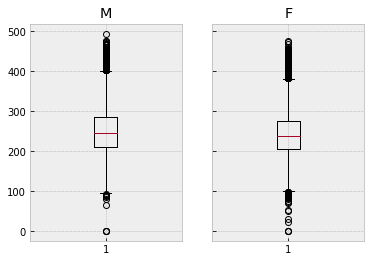

In [9]:
print(df[df['ESTU_GENERO']=='M'].PUNT_GLOBAL.describe())
print(df[df['ESTU_GENERO']=='F'].PUNT_GLOBAL.describe())
fig, (ax0,ax1) = plt.subplots(1, 2, sharey=True)
ax0.boxplot(df[df['ESTU_GENERO']=='M'].PUNT_GLOBAL)
ax1.boxplot(df[df['ESTU_GENERO']=='F'].PUNT_GLOBAL)
ax0.title.set_text('M')
ax1.title.set_text('F')
plt.show()

Podemos ver que la media masculina es ligeramente superior, y podemos ver que son más mujeres que hombres que presentan el examen. 

A continuación se evaluará el desempeño según la jornada del colegio.

count    211681.000000
mean        243.527695
std          48.695073
min           0.000000
25%         207.000000
50%         240.000000
75%         277.000000
max         494.000000
Name: PUNT_GLOBAL, dtype: float64
count    144302.000000
mean        246.327244
std          46.381183
min          52.000000
25%         212.000000
50%         244.000000
75%         278.000000
max         473.000000
Name: PUNT_GLOBAL, dtype: float64
count    80058.000000
mean       276.845012
std         54.482299
min        107.000000
25%        237.000000
50%        278.000000
75%        317.000000
max        476.000000
Name: PUNT_GLOBAL, dtype: float64
count    50047.000000
mean       240.491058
std         45.940596
min        101.000000
25%        206.000000
50%        237.000000
75%        272.000000
max        467.000000
Name: PUNT_GLOBAL, dtype: float64
count    24849.00000
mean       210.63407
std         38.12527
min          0.00000
25%        183.00000
50%        206.00000
75%        234.000

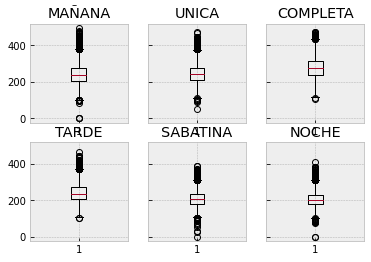

In [10]:
print(df[df['COLE_JORNADA']=='MAÑANA'].PUNT_GLOBAL.describe())
print(df[df['COLE_JORNADA']=='UNICA'].PUNT_GLOBAL.describe())
print(df[df['COLE_JORNADA']=='COMPLETA'].PUNT_GLOBAL.describe())
print(df[df['COLE_JORNADA']=='TARDE'].PUNT_GLOBAL.describe())
print(df[df['COLE_JORNADA']=='SABATINA'].PUNT_GLOBAL.describe())
print(df[df['COLE_JORNADA']=='NOCHE'].PUNT_GLOBAL.describe())
fig, axs = plt.subplots(2, 3, sharey=True)
axs[0,0].boxplot(df[df['COLE_JORNADA']=='MAÑANA'].PUNT_GLOBAL)
axs[0,0].title.set_text('MAÑANA')
axs[0,1].boxplot(df[df['COLE_JORNADA']=='UNICA'].PUNT_GLOBAL)
axs[0,1].title.set_text('UNICA')
axs[0,2].boxplot(df[df['COLE_JORNADA']=='COMPLETA'].PUNT_GLOBAL)
axs[0,2].title.set_text('COMPLETA')
axs[1,0].boxplot(df[df['COLE_JORNADA']=='TARDE'].PUNT_GLOBAL)
axs[1,0].title.set_text('TARDE')
axs[1,1].boxplot(df[df['COLE_JORNADA']=='SABATINA'].PUNT_GLOBAL)
axs[1,1].title.set_text('SABATINA')
axs[1,2].boxplot(df[df['COLE_JORNADA']=='NOCHE'].PUNT_GLOBAL)
axs[1,2].title.set_text('NOCHE')

plt.show()

Podemos ver que los estudiantes de jornada completa tienden a tener mejor rendimiento, mientras los estudiantes de jornada sabatina o nocturna, tienden a tener uno peor. En la jornada de la mañana y la tarde los rendimientos son muy parecidos. 

A continuación se evaluará según el tipo de documento, esto para diferenciar los estudiantes mayores de edad con los menores de edad.

count    451558.000000
mean        250.873812
std          50.272468
min          80.000000
25%         213.000000
50%         248.000000
75%         285.000000
max         494.000000
Name: PUNT_GLOBAL, dtype: float64
count    75994.000000
mean       217.949114
std         43.174338
min          0.000000
25%        185.000000
50%        213.000000
75%        245.000000
max        452.000000
Name: PUNT_GLOBAL, dtype: float64


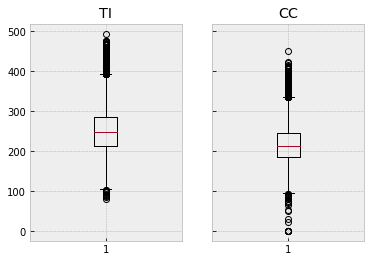

In [11]:
print(df[df['ESTU_TIPODOCUMENTO']=='TI'].PUNT_GLOBAL.describe())
print(df[df['ESTU_TIPODOCUMENTO']=='CC'].PUNT_GLOBAL.describe())
fig, (ax0,ax1) = plt.subplots(1, 2, sharey=True)
ax0.boxplot(df[df['ESTU_TIPODOCUMENTO']=='TI'].PUNT_GLOBAL)
ax1.boxplot(df[df['ESTU_TIPODOCUMENTO']=='CC'].PUNT_GLOBAL)
ax0.title.set_text('TI')
ax1.title.set_text('CC')
plt.show()

Se puede ver que aunque muy poca parte de la población es mayor de edad, su rendimiento es inferior. A continuación se evaluará según la nacionalidad.

count    527707.000000
mean        246.101285
std          50.654638
min           0.000000
25%         208.000000
50%         242.000000
75%         281.000000
max         494.000000
Name: PUNT_GLOBAL, dtype: float64
count    5272.000000
mean      238.288885
std        46.719820
min        88.000000
25%       202.000000
50%       234.000000
75%       269.000000
max       434.000000
Name: PUNT_GLOBAL, dtype: float64


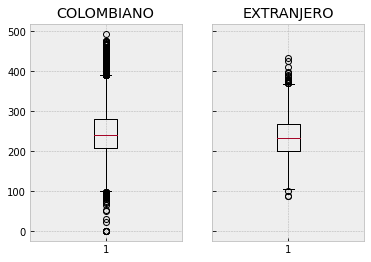

In [12]:
print(df[df['ESTU_NACIONALIDAD']=='COLOMBIA'].PUNT_GLOBAL.describe())
print(df[df['ESTU_NACIONALIDAD']!='COLOMBIA'].PUNT_GLOBAL.describe())
fig, (ax0,ax1) = plt.subplots(1, 2, sharey=True)
ax0.boxplot(df[df['ESTU_NACIONALIDAD']=='COLOMBIA'].PUNT_GLOBAL)
ax1.boxplot(df[df['ESTU_NACIONALIDAD']!='COLOMBIA'].PUNT_GLOBAL)
ax0.title.set_text('COLOMBIANO')
ax1.title.set_text('EXTRANJERO')
plt.show()

Podemos ver que ligeramente el estudiante colombiano (que representa casi toda la población) obtiene un mejor puntaje. A continuación se evaluará el desempeño del estudiante si tiene etnia o no. 

count    34655.000000
mean       212.360641
std         43.691080
min          0.000000
25%        180.000000
50%        205.000000
75%        238.000000
max        467.000000
Name: PUNT_GLOBAL, dtype: float64
count    497568.000000
mean        248.394147
std          50.234247
min           0.000000
25%         210.000000
50%         245.000000
75%         283.000000
max         494.000000
Name: PUNT_GLOBAL, dtype: float64


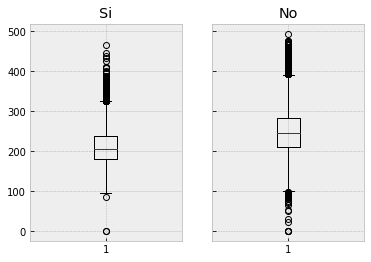

In [13]:
print(df[df['ESTU_TIENEETNIA']=='Si'].PUNT_GLOBAL.describe())
print(df[df['ESTU_TIENEETNIA']=='No'].PUNT_GLOBAL.describe())
fig, (ax0,ax1) = plt.subplots(1, 2, sharey=True)
ax0.boxplot(df[df['ESTU_TIENEETNIA']=='Si'].PUNT_GLOBAL)
ax1.boxplot(df[df['ESTU_TIENEETNIA']=='No'].PUNT_GLOBAL)
ax0.title.set_text('Si')
ax1.title.set_text('No')
plt.show()

Podemos ver que aunque representando casi toda la población el estudiante que no tiene etnia obtiene un mejor resultado. A continuación evaluaremos el puntaje global de los estudiantes que tienen internet y los que no. 

count    373130.000000
mean        255.739654
std          50.437847
min          31.000000
25%         218.000000
50%         253.000000
75%         291.000000
max         494.000000
Name: PUNT_GLOBAL, dtype: float64
count    133237.000000
mean        222.859664
std          41.882436
min          85.000000
25%         192.000000
50%         218.000000
75%         250.000000
max         456.000000
Name: PUNT_GLOBAL, dtype: float64


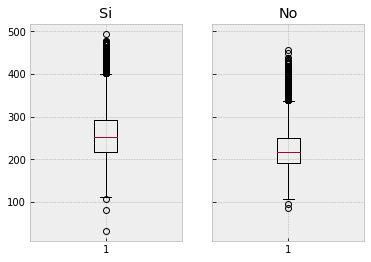

In [14]:
print(df[df['FAMI_TIENEINTERNET']=='Si'].PUNT_GLOBAL.describe())
print(df[df['FAMI_TIENEINTERNET']=='No'].PUNT_GLOBAL.describe())
fig, (ax0,ax1) = plt.subplots(1, 2, sharey=True)
ax0.boxplot(df[df['FAMI_TIENEINTERNET']=='Si'].PUNT_GLOBAL)
ax1.boxplot(df[df['FAMI_TIENEINTERNET']=='No'].PUNT_GLOBAL)
ax0.title.set_text('Si')
ax1.title.set_text('No')
plt.show()

Como podemos ver es mejor el resultado de los estudiantes con acceso a internet. A continuación haremos lo mismo pero con el computador.

count    299969.000000
mean        260.192450
std          51.238202
min           0.000000
25%         222.000000
50%         259.000000
75%         296.000000
max         477.000000
Name: PUNT_GLOBAL, dtype: float64
count    217059.000000
mean        227.390967
std          42.621731
min           0.000000
25%         195.000000
50%         223.000000
75%         255.000000
max         494.000000
Name: PUNT_GLOBAL, dtype: float64


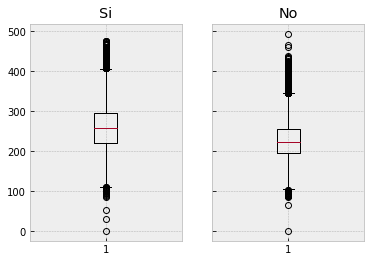

In [15]:
print(df[df['FAMI_TIENECOMPUTADOR']=='Si'].PUNT_GLOBAL.describe())
print(df[df['FAMI_TIENECOMPUTADOR']=='No'].PUNT_GLOBAL.describe())
fig, (ax0,ax1) = plt.subplots(1, 2, sharey=True)
ax0.boxplot(df[df['FAMI_TIENECOMPUTADOR']=='Si'].PUNT_GLOBAL)
ax1.boxplot(df[df['FAMI_TIENECOMPUTADOR']=='No'].PUNT_GLOBAL)
ax0.title.set_text('Si')
ax1.title.set_text('No')
plt.show()

Como se puede ver en la gráfica los estudiantes con computador tienden a tener mejor rendimiento. A continuación evaluaremos el rendimiento del estudiante que estudia en colegios ubicados en zona rural vs estudiantes que estudian en colegios ubicados en zona urbana.

count    88843.000000
mean       224.454735
std         45.813611
min          0.000000
25%        190.000000
50%        218.000000
75%        253.000000
max        469.000000
Name: PUNT_GLOBAL, dtype: float64
count    444136.000000
mean        250.338631
std          50.436096
min           0.000000
25%         212.000000
50%         247.000000
75%         285.000000
max         494.000000
Name: PUNT_GLOBAL, dtype: float64


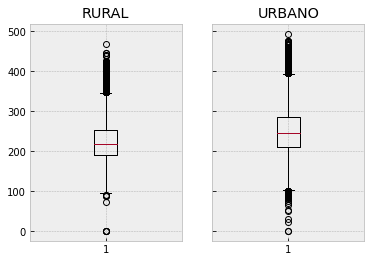

In [16]:
print(df[df['COLE_AREA_UBICACION']=='RURAL'].PUNT_GLOBAL.describe())
print(df[df['COLE_AREA_UBICACION']=='URBANO'].PUNT_GLOBAL.describe())
fig, (ax0,ax1) = plt.subplots(1, 2, sharey=True)
ax0.boxplot(df[df['COLE_AREA_UBICACION']=='RURAL'].PUNT_GLOBAL)
ax1.boxplot(df[df['COLE_AREA_UBICACION']=='URBANO'].PUNT_GLOBAL)
ax0.title.set_text('RURAL')
ax1.title.set_text('URBANO')
plt.show()

El estudiante que estudia en zona urbana tiene tendencia a tener mejor rendimiento en el examen. A continuación se evaluará el puntaje global según la naturaleza del colegio. 

count    414093.000000
mean        239.025680
std          46.698793
min           0.000000
25%         204.000000
50%         236.000000
75%         271.000000
max         494.000000
Name: PUNT_GLOBAL, dtype: float64
count    118886.000000
mean        270.399955
std          55.930372
min           0.000000
25%         228.000000
50%         271.000000
75%         312.000000
max         477.000000
Name: PUNT_GLOBAL, dtype: float64


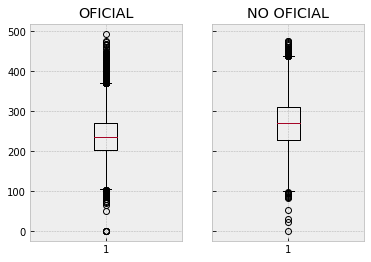

In [17]:
print(df[df['COLE_NATURALEZA']=='OFICIAL'].PUNT_GLOBAL.describe())
print(df[df['COLE_NATURALEZA']=='NO OFICIAL'].PUNT_GLOBAL.describe())
fig, (ax0,ax1) = plt.subplots(1, 2, sharey=True)
ax0.boxplot(df[df['COLE_NATURALEZA']=='OFICIAL'].PUNT_GLOBAL)
ax1.boxplot(df[df['COLE_NATURALEZA']=='NO OFICIAL'].PUNT_GLOBAL)
ax0.title.set_text('OFICIAL')
ax1.title.set_text('NO OFICIAL')
plt.show()

Los estudiantes de colegios no oficiales tienden a tener mejor rendimiento. Se analizará el puntaje global según el carácter del colegio.

count    271407.000000
mean        250.015272
std          52.624258
min           0.000000
25%         210.000000
50%         246.000000
75%         286.000000
max         477.000000
Name: PUNT_GLOBAL, dtype: float64
count    176856.000000
mean        244.049922
std          47.695109
min           0.000000
25%         208.000000
50%         241.000000
75%         277.000000
max         494.000000
Name: PUNT_GLOBAL, dtype: float64
count    58988.000000
mean       239.278311
std         48.121334
min          0.000000
25%        202.000000
50%        235.000000
75%        272.000000
max        475.000000
Name: PUNT_GLOBAL, dtype: float64


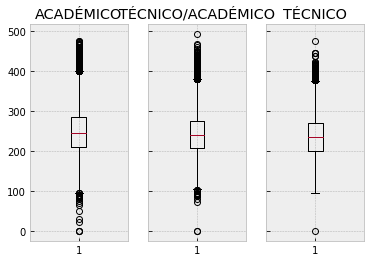

In [18]:
print(df[df['COLE_CARACTER']=='ACADÉMICO'].PUNT_GLOBAL.describe())
print(df[df['COLE_CARACTER']=='TÉCNICO/ACADÉMICO'].PUNT_GLOBAL.describe())
print(df[df['COLE_CARACTER']=='TÉCNICO'].PUNT_GLOBAL.describe())
fig, (ax0,ax1,ax2) = plt.subplots(1, 3, sharey=True)
ax0.boxplot(df[df['COLE_CARACTER']=='ACADÉMICO'].PUNT_GLOBAL)
ax1.boxplot(df[df['COLE_CARACTER']=='TÉCNICO/ACADÉMICO'].PUNT_GLOBAL)
ax2.boxplot(df[df['COLE_CARACTER']=='TÉCNICO'].PUNT_GLOBAL)
ax0.title.set_text('ACADÉMICO')
ax1.title.set_text('TÉCNICO/ACADÉMICO')
ax2.title.set_text('TÉCNICO')
plt.show()

Aunque no es una diferencia muy marcada, el estudiante de colegio académmico tiene una leve tendencia a un puntaje mejor. Se analizará el puntaje según la frecuencia que el estudiante como carne, pescado, huevo.

count    193003.000000
mean        257.672850
std          52.814046
min          80.000000
25%         217.000000
50%         255.000000
75%         295.000000
max         477.000000
Name: PUNT_GLOBAL, dtype: float64
count    154908.000000
mean        248.361111
std          48.069861
min          31.000000
25%         212.000000
50%         245.000000
75%         282.000000
max         452.000000
Name: PUNT_GLOBAL, dtype: float64
count    130020.000000
mean        234.710406
std          46.042889
min          96.000000
25%         200.000000
50%         231.000000
75%         265.000000
max         494.000000
Name: PUNT_GLOBAL, dtype: float64
count    27657.000000
mean       223.461041
std         46.438568
min        112.000000
25%        188.000000
50%        217.000000
75%        253.000000
max        467.000000
Name: PUNT_GLOBAL, dtype: float64


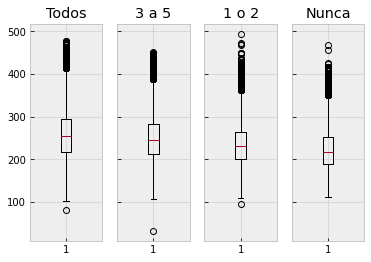

In [19]:
print(df[df['FAMI_COMECARNEPESCADOHUEVO']=='Todos o casi todos los días'].PUNT_GLOBAL.describe())
print(df[df['FAMI_COMECARNEPESCADOHUEVO']=='3 a 5 veces por semana'].PUNT_GLOBAL.describe())
print(df[df['FAMI_COMECARNEPESCADOHUEVO']=='1 o 2 veces por semana'].PUNT_GLOBAL.describe())
print(df[df['FAMI_COMECARNEPESCADOHUEVO']=='Nunca o rara vez comemos eso'].PUNT_GLOBAL.describe())
fig, (ax0,ax1,ax2, ax3) = plt.subplots(1, 4, sharey=True)
ax0.boxplot(df[df['FAMI_COMECARNEPESCADOHUEVO']=='Todos o casi todos los días'].PUNT_GLOBAL)
ax1.boxplot(df[df['FAMI_COMECARNEPESCADOHUEVO']=='3 a 5 veces por semana'].PUNT_GLOBAL)
ax2.boxplot(df[df['FAMI_COMECARNEPESCADOHUEVO']=='1 o 2 veces por semana'].PUNT_GLOBAL)
ax3.boxplot(df[df['FAMI_COMECARNEPESCADOHUEVO']=='Nunca o rara vez comemos eso'].PUNT_GLOBAL)
ax0.title.set_text('Todos')
ax1.title.set_text('3 a 5')
ax2.title.set_text('1 o 2')
ax3.title.set_text('Nunca')
plt.show()

Como se puede ver en la gráfica, los estudiantes que pueden comer carne, huevo o pescado todos los días tienden a tener mejor puntaje que los que comen de 3 a 5 días, 1 o 2 días y nunca, en orden descendente. Analizaremos el puntaje de los estudiantes que trabajan y los que no trabajan.

count    315540.000000
mean        254.921018
std          51.134615
min          54.000000
25%         216.000000
50%         252.000000
75%         291.000000
max         477.000000
Name: PUNT_GLOBAL, dtype: float64
count    217439.000000
mean        233.112974
std          46.963866
min           0.000000
25%         197.000000
50%         229.000000
75%         265.000000
max         494.000000
Name: PUNT_GLOBAL, dtype: float64


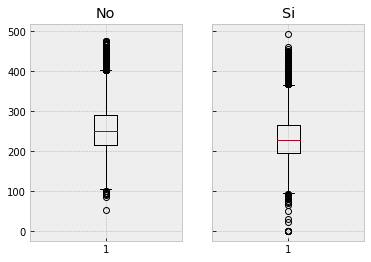

In [20]:
print(df[df['ESTU_HORASSEMANATRABAJA']=='0'].PUNT_GLOBAL.describe())
print(df[df['ESTU_HORASSEMANATRABAJA']!='0'].PUNT_GLOBAL.describe())
fig, (ax0,ax1) = plt.subplots(1, 2, sharey=True)
ax0.boxplot(df[df['ESTU_HORASSEMANATRABAJA']=='0'].PUNT_GLOBAL)
ax1.boxplot(df[df['ESTU_HORASSEMANATRABAJA']!='0'].PUNT_GLOBAL)
ax0.title.set_text('No')
ax1.title.set_text('Si')
plt.show()

Los estudiantes que trabajan tienden a tener menor rendimiento en el examen. Analizaremos el resultado según el nivel socioeconómico, siendo 1 el menor y 4 el mayor.

count    79693.000000
mean       219.286035
std         39.805201
min         67.000000
25%        189.000000
50%        215.000000
75%        245.000000
max        467.000000
Name: PUNT_GLOBAL, dtype: float64
count    196628.000000
mean        233.268075
std          44.294787
min           0.000000
25%         200.000000
50%         230.000000
75%         263.000000
max         494.000000
Name: PUNT_GLOBAL, dtype: float64
count    199600.000000
mean        258.995446
std          48.220854
min          54.000000
25%         224.000000
50%         258.000000
75%         293.000000
max         473.000000
Name: PUNT_GLOBAL, dtype: float64
count    41895.000000
mean       298.981645
std         49.815238
min        122.000000
25%        266.000000
50%        302.000000
75%        335.000000
max        477.000000
Name: PUNT_GLOBAL, dtype: float64


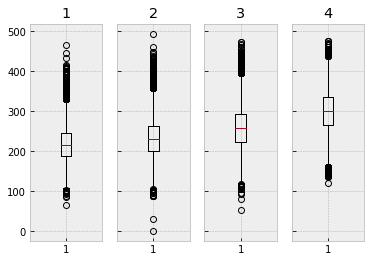

In [21]:
print(df[df['ESTU_NSE_INDIVIDUAL']==1.0].PUNT_GLOBAL.describe())
print(df[df['ESTU_NSE_INDIVIDUAL']==2.0].PUNT_GLOBAL.describe())
print(df[df['ESTU_NSE_INDIVIDUAL']==3.0].PUNT_GLOBAL.describe())
print(df[df['ESTU_NSE_INDIVIDUAL']==4.0].PUNT_GLOBAL.describe())
fig, (ax0,ax1,ax2, ax3) = plt.subplots(1, 4, sharey=True)
ax0.boxplot(df[df['ESTU_NSE_INDIVIDUAL']==1.0].PUNT_GLOBAL)
ax1.boxplot(df[df['ESTU_NSE_INDIVIDUAL']==2.0].PUNT_GLOBAL)
ax2.boxplot(df[df['ESTU_NSE_INDIVIDUAL']==3.0].PUNT_GLOBAL)
ax3.boxplot(df[df['ESTU_NSE_INDIVIDUAL']==4.0].PUNT_GLOBAL)
ax0.title.set_text('1')
ax1.title.set_text('2')
ax2.title.set_text('3')
ax3.title.set_text('4')
plt.show()

Como se puede ver en la gráfica mientras mejor el nivel socioeconómico, el rendimiento del estudiante será probablemente mejor.

Ahora analizaremos las variables nulas para manipularlas. Todas las columnas que no tengan 532979 no nulos, es porque tienen algún valor nulo y habrá que tomar alguna decisión al respecto.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532979 entries, 0 to 532978
Data columns (total 82 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ESTU_TIPODOCUMENTO             532979 non-null  object 
 1   ESTU_NACIONALIDAD              532979 non-null  object 
 2   ESTU_GENERO                    532887 non-null  object 
 3   ESTU_FECHANACIMIENTO           532979 non-null  object 
 4   PERIODO                        532979 non-null  int64  
 5   ESTU_CONSECUTIVO               532979 non-null  object 
 6   ESTU_ESTUDIANTE                532979 non-null  object 
 7   ESTU_PAIS_RESIDE               532979 non-null  object 
 8   ESTU_TIENEETNIA                532223 non-null  object 
 9   ESTU_DEPTO_RESIDE              532902 non-null  object 
 10  ESTU_COD_RESIDE_DEPTO          532902 non-null  float64
 11  ESTU_MCPIO_RESIDE              532902 non-null  object 
 12  ESTU_COD_RESIDE_MCPIO         

In [23]:
df.ESTU_NSE_INDIVIDUAL.value_counts()

3.0    199600
2.0    196628
1.0     79693
4.0     41895
Name: ESTU_NSE_INDIVIDUAL, dtype: int64

Como vemos que la variable PERCENTIL_ESPECIAL_GLOBAL tiene apenas 15437 valores no nulos, decidimos eliminarla.

In [24]:
df= df.drop(['PERCENTIL_ESPECIAL_GLOBAL'], axis=1)

In [25]:
df.columns.values

array(['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_CONSECUTIVO',
       'ESTU_ESTUDIANTE', 'ESTU_PAIS_RESIDE', 'ESTU_TIENEETNIA',
       'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE',
       'ESTU_COD_RESIDE_MCPIO', 'FAMI_ESTRATOVIVIENDA',
       'FAMI_PERSONASHOGAR', 'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'FAMI_TRABAJOLABORPADRE',
       'FAMI_TRABAJOLABORMADRE', 'FAMI_TIENEINTERNET',
       'FAMI_TIENESERVICIOTV', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS',
       'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENEMOTOCICLETA',
       'FAMI_TIENECONSOLAVIDEOJUEGOS', 'FAMI_NUMLIBROS',
       'FAMI_COMELECHEDERIVADOS', 'FAMI_COMECARNEPESCADOHUEVO',
       'FAMI_COMECEREALFRUTOSLEGUMBRE', 'FAMI_SITUACIONECONOMICA',
       'ESTU_DEDICACIONLECTURADIARIA', 'ESTU_DEDICACIONINTERNET',
       'ESTU_HORASSEMANATRABAJA', 'ESTU_TIPOREMUNERACION',
       'COLE_C

Se deciden eliminar las siguientes variables porque vemos que no aportan mucho al modelo.

In [26]:
df= df.drop(['PERIODO', 'ESTU_ESTUDIANTE', 'ESTU_COD_RESIDE_DEPTO', 
             'ESTU_COD_RESIDE_MCPIO', 'COLE_CODIGO_ICFES', 'COLE_COD_DANE_ESTABLECIMIENTO', 
             'COLE_COD_DANE_SEDE','COLE_COD_MCPIO_UBICACION', 'COLE_COD_DEPTO_UBICACION', 'ESTU_PRIVADO_LIBERTAD',
             'ESTU_COD_MCPIO_PRESENTACION', 'ESTU_COD_DEPTO_PRESENTACION', 'ESTU_ESTADOINVESTIGACION', 
             'COLE_MCPIO_UBICACION','ESTU_MCPIO_PRESENTACION','COLE_DEPTO_UBICACION', 'ESTU_DEPTO_PRESENTACION',
             'ESTU_CONSECUTIVO', 'COLE_SEDE_PRINCIPAL','ESTU_GENERACION-E','ESTU_PAIS_RESIDE'], axis=1)
df

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,ESTU_MCPIO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_NOMBRE_ESTABLECIMIENTO,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_NOMBRE_SEDE,COLE_AREA_UBICACION,COLE_JORNADA,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO
0,TI,COLOMBIA,F,09/01/2004,No,CALDAS,LA DORADA,Estrato 1,3 a 4,Cuatro,Secundaria (Bachillerato) completa,Primaria completa,Es dueño de un negocio pequeño (tiene pocos em...,Es dueño de un negocio pequeño (tiene pocos em...,No,No,Si,Si,No,No,Si,Si,26 A 100 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,"Si, en efectivo",INSTITUCION EDUCATIVA GUARINOCITO,MIXTO,OFICIAL,A,N,ACADÉMICO,INSTITUCION EDUCATIVA GUARINOCITO - SEDE PRINC...,RURAL,MAÑANA,32,2,1,32,7,1,35,8,1,27,3,1,32.0,6.0,A-,158,2.0,48.765076,2.0,2.0
1,TI,COLOMBIA,M,06/04/2005,No,CALDAS,NEIRA,Estrato 2,5 a 6,Tres,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Es operario de máquinas o conduce vehículos (t...,"Trabaja en el hogar, no trabaja o estudia",No,Si,No,Si,Si,No,Si,No,26 A 100 LIBROS,1 o 2 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,No leo por entretenimiento,No Navega Internet,Menos de 10 horas,"Si, en efectivo",INSTITUCION EDUCATIVA SAN LUIS,MIXTO,OFICIAL,A,NaN,ACADÉMICO,ESCUELA EL VATICANO,RURAL,MAÑANA,48,36,2,24,1,1,38,15,1,32,11,1,40.0,30.0,A-,179,8.0,47.657176,2.0,2.0
2,TI,COLOMBIA,F,28/03/2004,No,CALDAS,VILLAMARÍA,Estrato 2,7 a 8,Cuatro,Primaria incompleta,Primaria incompleta,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia",No,No,No,No,No,No,No,No,0 A 10 LIBROS,3 a 5 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,No,INSTITUCION EDUCATIVA FORTUNATO GAVIRIA BOTERO,MIXTO,OFICIAL,A,N,TÉCNICO,INSTITUCION EDUCATIVA FORTUNATO GAVIRIA BOTERO...,RURAL,MAÑANA,47,34,2,56,71,3,52,65,2,39,29,1,40.0,29.0,A-,239,47.0,37.502857,1.0,1.0
3,TI,COLOMBIA,F,28/04/2005,No,RISARALDA,GUÁTICA,NaN,7 a 8,Cuatro,Primaria incompleta,Primaria completa,"Es agricultor, pesquero o jornalero","Trabaja en el hogar, no trabaja o estudia",No,No,No,Si,Si,Si,No,No,11 A 25 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Más de 2 horas,Entre 1 y 3 horas,Menos de 10 horas,"Si, en efectivo",CE BACHILLERATO EN BIENESTAR RURAL -GUATICA-,MIXTO,OFICIAL,A,NaN,TÉCNICO,SE BACHILLERATO EN BIENESTAR RURAL -GUATICA- S...,RURAL,MAÑANA,56,64,3,46,38,2,44,36,2,41,35,2,43.0,38.0,A-,232,42.0,44.092403,2.0,1.0
4,TI,COLOMBIA,F,16/11/2004,No,CALDAS,VICTORIA,Estrato 2,7 a 8,Cuatro,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Trabaja por cuenta propia (por ejemplo plomero...,Trabaja por cuenta propia (por ejemplo plomero...,Si,Si,Si,Si,No,No,Si,No,0 A 10 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,30 minutos o menos,Entre 1 y 3 horas,0,No,INSTITUCION EDUCATIVA CAÑAVERAL,MIXTO,OFICIAL,A,N

In [27]:
a=df.isnull().sum()>0
type(a)

pandas.core.series.Series

In [28]:
a= a.to_frame()
a

,0
ESTU_TIPODOCUMENTO,False
ESTU_NACIONALIDAD,False
ESTU_GENERO,True
ESTU_FECHANACIMIENTO,False
ESTU_TIENEETNIA,True
ESTU_DEPTO_RESIDE,True
ESTU_MCPIO_RESIDE,True
FAMI_ESTRATOVIVIENDA,True
FAMI_PERSONASHOGAR,True
FAMI_CUARTOSHOGAR,True


In [29]:
a=a[a[0]==True]
a

,0
ESTU_GENERO,True
ESTU_TIENEETNIA,True
ESTU_DEPTO_RESIDE,True
ESTU_MCPIO_RESIDE,True
FAMI_ESTRATOVIVIENDA,True
FAMI_PERSONASHOGAR,True
FAMI_CUARTOSHOGAR,True
FAMI_EDUCACIONPADRE,True
FAMI_EDUCACIONMADRE,True
FAMI_TRABAJOLABORPADRE,True


Luego de tener en un dataframe  las variables con valores nulos, tomaremos decisiones una a una, primeramente analizaremos si podemos rellenar los valores nulos de alguna forma.

In [30]:
print(df['ESTU_GENERO'].unique()) # No se pueden reemplazar valores nulos porque es difícil suponer el género de un estudiante
print(df['ESTU_TIENEETNIA'].unique()) # Se reemplazarán los valores Nan por No, que es el caso más común
print(df['ESTU_DEPTO_RESIDE'].unique()) # No se puede suponer el departamento de un estudiante
print(df['ESTU_MCPIO_RESIDE'].unique()) # No se puede suponer el municipio de un estudiante
print(df['FAMI_ESTRATOVIVIENDA'].unique()) # Se reemplazarán los valores Nan por la opción "Sin Estrato"
print(df['FAMI_PERSONASHOGAR'].unique()) # No se puede suponer la cantidad de personas en el hogar
print(df['FAMI_CUARTOSHOGAR'].unique()) #No se puede suponer la cantidad de cuartos en el hogar

['F' 'M' nan]
['No' 'Si' nan]
['CALDAS' 'RISARALDA' 'CUNDINAMARCA' 'BOGOTÁ' 'ANTIOQUIA' 'CASANARE'
 'SANTANDER' 'TOLIMA' 'VICHADA' 'NORTE SANTANDER' 'VALLE' 'QUINDIO'
 'MAGDALENA' 'PUTUMAYO' 'ATLANTICO' 'SUCRE' 'CAUCA' nan 'CAQUETA' 'META'
 'NARIÑO' 'ARAUCA' 'HUILA' 'GUAVIARE' 'VAUPES' 'CESAR' 'CORDOBA' 'BOLIVAR'
 'BOYACA' 'AMAZONAS' 'CHOCO' 'LA GUAJIRA' 'SAN ANDRES' 'EXTRANJERO'
 'GUAINIA']
['LA DORADA' 'NEIRA' 'VILLAMARÍA' ... 'VIRACACHÁ' 'TUTAZÁ' 'SATIVASUR']
['Estrato 1' 'Estrato 2' nan 'Estrato 3' 'Estrato 4' 'Estrato 6'
 'Sin Estrato' 'Estrato 5']
['3 a 4' '5 a 6' '7 a 8' '9 o más' nan '1 a 2']
['Cuatro' 'Tres' 'Dos' 'Seis o mas' 'Cinco' nan 'Uno']


In [31]:
print(df['FAMI_EDUCACIONPADRE'].unique()) #No se puede suponer la educación del padre
print(df['FAMI_EDUCACIONMADRE'].unique()) # No se puede supiner la educación de la madre
print(df['FAMI_TRABAJOLABORPADRE'].unique()) # No se puede suponer el trabajo del padre 
print(df['FAMI_TRABAJOLABORMADRE'].unique()) # Es impreciso suponer el trabajo de la madre, pero se tiene la tendencia a esta variable = 'Trabaja en el hogar, no trabaja o estudia'
print(df['FAMI_TIENEINTERNET'].unique()) # No se puede suponer si el estudiante tiene internet o no 
print(df['FAMI_TIENESERVICIOTV'].unique()) # No se puede suponer si el estudiante tiene TV o no
print(df['FAMI_TIENECOMPUTADOR'].unique()) # No se puede suponer si el estudiante tiene computador 

['Secundaria (Bachillerato) completa' 'Primaria incompleta'
 'Secundaria (Bachillerato) incompleta' 'Primaria completa'
 'Educación profesional completa' 'Técnica o tecnológica completa'
 'Ninguno' nan 'No sabe' 'Técnica o tecnológica incompleta'
 'Educación profesional incompleta' 'Postgrado' 'No Aplica']
['Primaria completa' 'Secundaria (Bachillerato) completa'
 'Primaria incompleta' 'Secundaria (Bachillerato) incompleta' 'Ninguno'
 nan 'Educación profesional completa' 'Técnica o tecnológica completa'
 'Postgrado' 'Técnica o tecnológica incompleta'
 'Educación profesional incompleta' 'No sabe' 'No Aplica']
['Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc'
 'Es operario de máquinas o conduce vehículos (taxita, chofer)'
 'Trabaja en el hogar, no trabaja o estudia'
 'Es agricultor, pesquero o jornalero'
 'Trabaja por cuenta propia (por ejemplo plomero, electricista)'
 'No aplica'
 'Trabaja como profesional (por ejemplo médico, abogad

In [32]:
print(df['FAMI_TIENELAVADORA'].unique()) #No se puede suponer si el estudiante tiene lavadora, microondas, auto, moto, videojuegos
print(df['FAMI_TIENEHORNOMICROOGAS'].unique())
print(df['FAMI_TIENEAUTOMOVIL'].unique())
print(df['FAMI_TIENEMOTOCICLETA'].unique())
print(df['FAMI_TIENECONSOLAVIDEOJUEGOS'].unique())
print(df['FAMI_NUMLIBROS'].unique()) # No se puede suponer el número de libros de la familia
print(df['FAMI_COMELECHEDERIVADOS'].unique()) # No se puede suponer qué come el estudiante 

['Si' 'No' nan]
['No' 'Si' nan]
['No' 'Si' nan]
['Si' 'No' nan]
['Si' 'No' nan]
['26 A 100 LIBROS' '0 A 10 LIBROS' '11 A 25 LIBROS' 'MÁS DE 100 LIBROS'
 nan]
['1 o 2 veces por semana' '3 a 5 veces por semana'
 'Todos o casi todos los días' 'Nunca o rara vez comemos eso' nan]


In [33]:
print(df['FAMI_COMECARNEPESCADOHUEVO'].unique()) # No se puede suponer qué come el estudiante
print(df['FAMI_COMECEREALFRUTOSLEGUMBRE'].unique())
print(df['FAMI_SITUACIONECONOMICA'].unique()) # No se puede suponer la situación económica del estudiante 
print(df['ESTU_DEDICACIONLECTURADIARIA'].unique()) # No se pueden suponer los hábitos de lectura, internet del estudiante
print(df['ESTU_DEDICACIONINTERNET'].unique())
print(df['ESTU_HORASSEMANATRABAJA'].unique()) # Es impreciso  suponer horas de trabajo y la remuneración del estudiante, pero se podría aproximar a las variables '0' y 'No'
print(df['ESTU_TIPOREMUNERACION'].unique())
print(df['COLE_BILINGUE'].unique()) # Respecto al colegio bilingue podríamos asumir los nan como 'N' que representan No

['1 o 2 veces por semana' 'Todos o casi todos los días'
 '3 a 5 veces por semana' nan 'Nunca o rara vez comemos eso']
['1 o 2 veces por semana' '3 a 5 veces por semana'
 'Todos o casi todos los días' 'Nunca o rara vez comemos eso' nan]
['Igual' 'Mejor' 'Peor' nan]
['Entre 30 y 60 minutos' 'No leo por entretenimiento' 'Más de 2 horas'
 '30 minutos o menos' 'Entre 1 y 2 horas' nan]
['Entre 1 y 3 horas' 'No Navega Internet' 'Entre 30 y 60 minutos'
 'Más de 3 horas' '30 minutos o menos' nan]
['0' 'Menos de 10 horas' 'Más de 30 horas' 'Entre 11 y 20 horas' nan
 'Entre 21 y 30 horas']
['Si, en efectivo' 'No' 'Si, en especie' nan 'Si, en efectivo y especie']
['N' nan 'S']


In [34]:
print(df['COLE_CARACTER'].unique()) # No podemos suponer el caracter del colegio 
print(df['PUNT_INGLES'].unique()) #No podemos suponer el puntaje, percentil y desempeño en  inglés
print(df['PERCENTIL_INGLES'].unique()) 
print(df['DESEMP_INGLES'].unique())
print(df['PERCENTIL_GLOBAL'].unique()) # No podemos suponer el percentil global
print(df['ESTU_INSE_INDIVIDUAL'].unique()) # No podemos suponer el índice socioeconómico del evaluado
print(df['ESTU_NSE_INDIVIDUAL'].unique()) # No podemos suponer el nivel socioeconómico del evaluado
print(df['ESTU_NSE_ESTABLECIMIENTO'].unique()) # No podemos suponer el nivel socioeconómico del establecimiento

['ACADÉMICO' 'TÉCNICO' 'NO APLICA' 'TÉCNICO/ACADÉMICO' nan]
[ 32.  40.  43.  49.  29.  42.  48.  45.  34.  60.  64.  50.  31.  44.
  36.  58.  55.  54.  38.  41.  28.  56.  47.  52.  69.  59.  62.  35.
  46.  57.  79.  71.  37.  51.  30.  39.  61.  70. 100.  33.  65.  53.
  80.  68.  67.  66.  78.  74.  63.  73.  77.  75.  nan  76.  83.  81.
  82.  72.  84.   0.  27.  85.  86.]
[  6.  30.  29.  38.  55.   1.  36.  52.  42.  12.  82.  34.  88.  57.
   3.  41.  18.  78.   5.  71.  35.  68.  23.  32.  40.  39.  33.  74.
  48.  70.  63.  92.  81.  37.  84.  51.  16.  15.  47.  76.  99.  13.
  14.  94.  19.  61.   2.  73.  24.  75.  58.  49.  45.  83.  80.  54.
  93.  17. 100.   8.  85.  28.  56.  53.  89.  62.  67.   7.  69.  64.
  59.  65.  98.  21.  91.  90.  22.  77.  79.  96.  86.  31.   9.  72.
  27.  95.  10.   4.  44.  43.  97.  25.  11.  nan  20.  50.  60.  46.
  87.  26.  66.]
['A-' 'A1' 'A2' 'B1' 'B+' nan]
[  2.   8.  47.  42.  69.  46.  28.  60.  27.   3.  21.  55.  13.  94.
  7

In [35]:
df.ESTU_TIPOREMUNERACION.value_counts()

No                           354919
Si, en efectivo              142794
Si, en especie                10128
Si, en efectivo y especie      8307
Name: ESTU_TIPOREMUNERACION, dtype: int64

In [36]:
print(df['ESTU_TIENEETNIA'].unique()) # Se reemplazarán los valores Nan por No, que es el caso más común
print(df['FAMI_ESTRATOVIVIENDA'].unique()) # Se reemplazarán los valores Nan por la opción "Sin Estrato"
print(df['FAMI_TRABAJOLABORMADRE'].unique()) # Es impreciso suponer el trabajo de la madre, pero se tiene la tendencia a esta variable = 'Trabaja en el hogar, no trabaja o estudia'
print(df['ESTU_HORASSEMANATRABAJA'].unique()) # Es impreciso  suponer horas de trabajo y la remuneración del estudiante, pero se podría aproximar a las variables '0' y 'No'
print(df['ESTU_TIPOREMUNERACION'].unique())
print(df['COLE_BILINGUE'].unique()) # Respecto al colegio bilingue podríamos asumir los nan como 'N' que representan No

['No' 'Si' nan]
['Estrato 1' 'Estrato 2' nan 'Estrato 3' 'Estrato 4' 'Estrato 6'
 'Sin Estrato' 'Estrato 5']
['Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc'
 'Trabaja en el hogar, no trabaja o estudia'
 'Trabaja por cuenta propia (por ejemplo plomero, electricista)'
 'Es agricultor, pesquero o jornalero'
 'Es vendedor o trabaja en atención al público'
 'Trabaja como personal de limpieza, mantenimiento, seguridad o construcción'
 'No aplica'
 'Tiene un trabajo de tipo auxiliar administrativo (por ejemplo, secretario o asistente)'
 'Trabaja como profesional (por ejemplo médico, abogado, ingeniero)' nan
 'Es operario de máquinas o conduce vehículos (taxita, chofer)' 'No sabe'
 'Pensionado'
 'Es dueño de un negocio grande, tiene un cargo de nivel directivo o gerencial']
['0' 'Menos de 10 horas' 'Más de 30 horas' 'Entre 11 y 20 horas' nan
 'Entre 21 y 30 horas']
['Si, en efectivo' 'No' 'Si, en especie' nan 'Si, en efectivo y especie']


Se reemplazan los valores nulos de las columnas donde se consideró pertinente.

In [37]:
df['ESTU_TIENEETNIA'] = df['ESTU_TIENEETNIA'].replace({np.nan: 'No'})
df['FAMI_ESTRATOVIVIENDA'] = df['FAMI_ESTRATOVIVIENDA'].replace({np.nan: 'Sin Estrato'})
df['FAMI_TRABAJOLABORMADRE'] = df['FAMI_TRABAJOLABORMADRE'].replace({np.nan: 'Trabaja en el hogar, no trabaja o estudia'})
df['ESTU_HORASSEMANATRABAJA'] = df['ESTU_HORASSEMANATRABAJA'].replace({np.nan: '0' })
df['ESTU_TIPOREMUNERACION'] = df['ESTU_TIPOREMUNERACION'].replace({np.nan: 'No'})
df['COLE_BILINGUE'] = df['COLE_BILINGUE'].replace({np.nan: 'N'})


El resto de valores nulos se decide eliminar las filas que contengan alguno

In [38]:
df = df.dropna()

df

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,ESTU_MCPIO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_NOMBRE_ESTABLECIMIENTO,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_NOMBRE_SEDE,COLE_AREA_UBICACION,COLE_JORNADA,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO
0,TI,COLOMBIA,F,09/01/2004,No,CALDAS,LA DORADA,Estrato 1,3 a 4,Cuatro,Secundaria (Bachillerato) completa,Primaria completa,Es dueño de un negocio pequeño (tiene pocos em...,Es dueño de un negocio pequeño (tiene pocos em...,No,No,Si,Si,No,No,Si,Si,26 A 100 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,"Si, en efectivo",INSTITUCION EDUCATIVA GUARINOCITO,MIXTO,OFICIAL,A,N,ACADÉMICO,INSTITUCION EDUCATIVA GUARINOCITO - SEDE PRINC...,RURAL,MAÑANA,32,2,1,32,7,1,35,8,1,27,3,1,32.0,6.0,A-,158,2.0,48.765076,2.0,2.0
1,TI,COLOMBIA,M,06/04/2005,No,CALDAS,NEIRA,Estrato 2,5 a 6,Tres,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Es operario de máquinas o conduce vehículos (t...,"Trabaja en el hogar, no trabaja o estudia",No,Si,No,Si,Si,No,Si,No,26 A 100 LIBROS,1 o 2 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,No leo por entretenimiento,No Navega Internet,Menos de 10 horas,"Si, en efectivo",INSTITUCION EDUCATIVA SAN LUIS,MIXTO,OFICIAL,A,N,ACADÉMICO,ESCUELA EL VATICANO,RURAL,MAÑANA,48,36,2,24,1,1,38,15,1,32,11,1,40.0,30.0,A-,179,8.0,47.657176,2.0,2.0
2,TI,COLOMBIA,F,28/03/2004,No,CALDAS,VILLAMARÍA,Estrato 2,7 a 8,Cuatro,Primaria incompleta,Primaria incompleta,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia",No,No,No,No,No,No,No,No,0 A 10 LIBROS,3 a 5 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,No,INSTITUCION EDUCATIVA FORTUNATO GAVIRIA BOTERO,MIXTO,OFICIAL,A,N,TÉCNICO,INSTITUCION EDUCATIVA FORTUNATO GAVIRIA BOTERO...,RURAL,MAÑANA,47,34,2,56,71,3,52,65,2,39,29,1,40.0,29.0,A-,239,47.0,37.502857,1.0,1.0
3,TI,COLOMBIA,F,28/04/2005,No,RISARALDA,GUÁTICA,Sin Estrato,7 a 8,Cuatro,Primaria incompleta,Primaria completa,"Es agricultor, pesquero o jornalero","Trabaja en el hogar, no trabaja o estudia",No,No,No,Si,Si,Si,No,No,11 A 25 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Más de 2 horas,Entre 1 y 3 horas,Menos de 10 horas,"Si, en efectivo",CE BACHILLERATO EN BIENESTAR RURAL -GUATICA-,MIXTO,OFICIAL,A,N,TÉCNICO,SE BACHILLERATO EN BIENESTAR RURAL -GUATICA- S...,RURAL,MAÑANA,56,64,3,46,38,2,44,36,2,41,35,2,43.0,38.0,A-,232,42.0,44.092403,2.0,1.0
4,TI,COLOMBIA,F,16/11/2004,No,CALDAS,VICTORIA,Estrato 2,7 a 8,Cuatro,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Trabaja por cuenta propia (por ejemplo plomero...,Trabaja por cuenta propia (por ejemplo plomero...,Si,Si,Si,Si,No,No,Si,No,0 A 10 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,30 minutos o menos,Entre 1 y 3 horas,0,No,INSTITUCION EDUCATIVA CAÑAVERAL,MIXTO,OFICIAL

Ahora nuestro conjunto de datos tiene 441184 filas pero con ningún valor nulo, un conjunto de datos suficiente para realizar el análisis y probar modelos predictivos.

In [39]:
df.isnull().sum()

ESTU_TIPODOCUMENTO               0
ESTU_NACIONALIDAD                0
ESTU_GENERO                      0
ESTU_FECHANACIMIENTO             0
ESTU_TIENEETNIA                  0
ESTU_DEPTO_RESIDE                0
ESTU_MCPIO_RESIDE                0
FAMI_ESTRATOVIVIENDA             0
FAMI_PERSONASHOGAR               0
FAMI_CUARTOSHOGAR                0
FAMI_EDUCACIONPADRE              0
FAMI_EDUCACIONMADRE              0
FAMI_TRABAJOLABORPADRE           0
FAMI_TRABAJOLABORMADRE           0
FAMI_TIENEINTERNET               0
FAMI_TIENESERVICIOTV             0
FAMI_TIENECOMPUTADOR             0
FAMI_TIENELAVADORA               0
FAMI_TIENEHORNOMICROOGAS         0
FAMI_TIENEAUTOMOVIL              0
FAMI_TIENEMOTOCICLETA            0
FAMI_TIENECONSOLAVIDEOJUEGOS     0
FAMI_NUMLIBROS                   0
FAMI_COMELECHEDERIVADOS          0
FAMI_COMECARNEPESCADOHUEVO       0
FAMI_COMECEREALFRUTOSLEGUMBRE    0
FAMI_SITUACIONECONOMICA          0
ESTU_DEDICACIONLECTURADIARIA     0
ESTU_DEDICACIONINTER

Analizamos la distribución de las posibles variablees objetivo, puntaje, percentil y desempeño, en este caso en Lectura crítica.

count    441184.000000
mean         52.954783
std          10.501649
min           0.000000
25%          45.000000
50%          53.000000
75%          61.000000
max         100.000000
Name: PUNT_LECTURA_CRITICA, dtype: float64

count    441184.000000
mean         51.575612
std          28.772246
min           1.000000
25%          27.000000
50%          52.000000
75%          77.000000
max         100.000000
Name: PERCENTIL_LECTURA_CRITICA, dtype: float64

count    441184.000000
mean          2.664154
std           0.753826
min           1.000000
25%           2.000000
50%           3.000000
75%           3.000000
max           4.000000
Name: DESEMP_LECTURA_CRITICA, dtype: float64



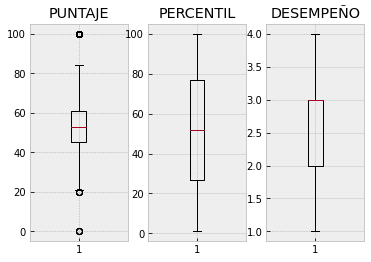

In [40]:
print(df.PUNT_LECTURA_CRITICA.describe()); print("")
print(df.PERCENTIL_LECTURA_CRITICA.describe()); print("")
print(df.DESEMP_LECTURA_CRITICA.describe()); print("")

fig, (ax0,ax1, ax2) = plt.subplots(1, 3, sharey=False)
ax0.boxplot(df.PUNT_LECTURA_CRITICA)
ax1.boxplot(df.PERCENTIL_LECTURA_CRITICA)
ax2.boxplot(df.DESEMP_LECTURA_CRITICA)
ax0.title.set_text('PUNTAJE')
ax1.title.set_text('PERCENTIL')
ax2.title.set_text('DESEMPEÑO')
plt.show()

Vemos que el percentil tiene una distribución muy limpia. De la misma manera que el desempeño.

In [41]:
df.head()

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,ESTU_MCPIO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_NOMBRE_ESTABLECIMIENTO,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_NOMBRE_SEDE,COLE_AREA_UBICACION,COLE_JORNADA,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO
0,TI,COLOMBIA,F,09/01/2004,No,CALDAS,LA DORADA,Estrato 1,3 a 4,Cuatro,Secundaria (Bachillerato) completa,Primaria completa,Es dueño de un negocio pequeño (tiene pocos em...,Es dueño de un negocio pequeño (tiene pocos em...,No,No,Si,Si,No,No,Si,Si,26 A 100 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,"Si, en efectivo",INSTITUCION EDUCATIVA GUARINOCITO,MIXTO,OFICIAL,A,N,ACADÉMICO,INSTITUCION EDUCATIVA GUARINOCITO - SEDE PRINC...,RURAL,MAÑANA,32,2,1,32,7,1,35,8,1,27,3,1,32.0,6.0,A-,158,2.0,48.765076,2.0,2.0
1,TI,COLOMBIA,M,06/04/2005,No,CALDAS,NEIRA,Estrato 2,5 a 6,Tres,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Es operario de máquinas o conduce vehículos (t...,"Trabaja en el hogar, no trabaja o estudia",No,Si,No,Si,Si,No,Si,No,26 A 100 LIBROS,1 o 2 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,No leo por entretenimiento,No Navega Internet,Menos de 10 horas,"Si, en efectivo",INSTITUCION EDUCATIVA SAN LUIS,MIXTO,OFICIAL,A,N,ACADÉMICO,ESCUELA EL VATICANO,RURAL,MAÑANA,48,36,2,24,1,1,38,15,1,32,11,1,40.0,30.0,A-,179,8.0,47.657176,2.0,2.0
2,TI,COLOMBIA,F,28/03/2004,No,CALDAS,VILLAMARÍA,Estrato 2,7 a 8,Cuatro,Primaria incompleta,Primaria incompleta,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia",No,No,No,No,No,No,No,No,0 A 10 LIBROS,3 a 5 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,No,INSTITUCION EDUCATIVA FORTUNATO GAVIRIA BOTERO,MIXTO,OFICIAL,A,N,TÉCNICO,INSTITUCION EDUCATIVA FORTUNATO GAVIRIA BOTERO...,RURAL,MAÑANA,47,34,2,56,71,3,52,65,2,39,29,1,40.0,29.0,A-,239,47.0,37.502857,1.0,1.0
3,TI,COLOMBIA,F,28/04/2005,No,RISARALDA,GUÁTICA,Sin Estrato,7 a 8,Cuatro,Primaria incompleta,Primaria completa,"Es agricultor, pesquero o jornalero","Trabaja en el hogar, no trabaja o estudia",No,No,No,Si,Si,Si,No,No,11 A 25 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Más de 2 horas,Entre 1 y 3 horas,Menos de 10 horas,"Si, en efectivo",CE BACHILLERATO EN BIENESTAR RURAL -GUATICA-,MIXTO,OFICIAL,A,N,TÉCNICO,SE BACHILLERATO EN BIENESTAR RURAL -GUATICA- S...,RURAL,MAÑANA,56,64,3,46,38,2,44,36,2,41,35,2,43.0,38.0,A-,232,42.0,44.092403,2.0,1.0
4,TI,COLOMBIA,F,16/11/2004,No,CALDAS,VICTORIA,Estrato 2,7 a 8,Cuatro,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Trabaja por cuenta propia (por ejemplo plomero...,Trabaja por cuenta propia (por ejemplo plomero...,Si,Si,Si,Si,No,No,Si,No,0 A 10 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,30 minutos o menos,Entre 1 y 3 horas,0,No,INSTITUCION EDUCATIVA CAÑAVERAL,MIXTO,OFICIAL

Creamos un dataframe con las posibles variables objetivo

In [42]:
df_objetivo=df[[
              'PUNT_LECTURA_CRITICA','PERCENTIL_LECTURA_CRITICA', 'DESEMP_LECTURA_CRITICA', 
              'PUNT_MATEMATICAS', 'PERCENTIL_MATEMATICAS', 'DESEMP_MATEMATICAS',
              'PUNT_C_NATURALES', 'PERCENTIL_C_NATURALES', 'DESEMP_C_NATURALES', 
              'PUNT_SOCIALES_CIUDADANAS','PERCENTIL_SOCIALES_CIUDADANAS','DESEMP_SOCIALES_CIUDADANAS',
              'PUNT_INGLES','PERCENTIL_INGLES','DESEMP_INGLES','PUNT_GLOBAL','PERCENTIL_GLOBAL'
              ]]


In [43]:
df_objetivo

,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL
0,32,2,1,32,7,1,35,8,1,27,3,1,32.0,6.0,A-,158,2.0
1,48,36,2,24,1,1,38,15,1,32,11,1,40.0,30.0,A-,179,8.0
2,47,34,2,56,71,3,52,65,2,39,29,1,40.0,29.0,A-,239,47.0
3,56,64,3,46,38,2,44,36,2,41,35,2,43.0,38.0,A-,232,42.0
4,58,68,3,54,65,3,55,76,2,51,64,2,49.0,55.0,A1,270,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532972,53,53,3,46,37,2,43,35,2,49,59,2,46.0,45.0,A-,238,47.0
532973,35,5,1,28,3,1,34,7,1,27,4,1,35.0,15.0,A-,157,2.0
532974,31,2,1,30,5,1,41,25,2,26,2,1,55.0,72.0,A1,169,5.0
532975,37,7,2,35,10,1,33,6,1,30,7,1,36.0,17.0,A-,170,5.0


Y eliminamos las variables objetivo del dataframe de características, de donde se tratará de predecir el desempeño del estudiante.

In [44]:
df= df.drop(['PUNT_LECTURA_CRITICA','PERCENTIL_LECTURA_CRITICA', 'DESEMP_LECTURA_CRITICA', 
              'PUNT_MATEMATICAS', 'PERCENTIL_MATEMATICAS', 'DESEMP_MATEMATICAS',
              'PUNT_C_NATURALES', 'PERCENTIL_C_NATURALES', 'DESEMP_C_NATURALES', 
              'PUNT_SOCIALES_CIUDADANAS','PERCENTIL_SOCIALES_CIUDADANAS','DESEMP_SOCIALES_CIUDADANAS',
              'PUNT_INGLES','PERCENTIL_INGLES','DESEMP_INGLES','PUNT_GLOBAL','PERCENTIL_GLOBAL', 'ESTU_TIPODOCUMENTO',
              'COLE_NOMBRE_ESTABLECIMIENTO', 'COLE_NOMBRE_SEDE', 'ESTU_MCPIO_RESIDE'
              ], axis=1)
df


,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_AREA_UBICACION,COLE_JORNADA,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO
0,COLOMBIA,F,09/01/2004,No,CALDAS,Estrato 1,3 a 4,Cuatro,Secundaria (Bachillerato) completa,Primaria completa,Es dueño de un negocio pequeño (tiene pocos em...,Es dueño de un negocio pequeño (tiene pocos em...,No,No,Si,Si,No,No,Si,Si,26 A 100 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,48.765076,2.0,2.0
1,COLOMBIA,M,06/04/2005,No,CALDAS,Estrato 2,5 a 6,Tres,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Es operario de máquinas o conduce vehículos (t...,"Trabaja en el hogar, no trabaja o estudia",No,Si,No,Si,Si,No,Si,No,26 A 100 LIBROS,1 o 2 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,No leo por entretenimiento,No Navega Internet,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,47.657176,2.0,2.0
2,COLOMBIA,F,28/03/2004,No,CALDAS,Estrato 2,7 a 8,Cuatro,Primaria incompleta,Primaria incompleta,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia",No,No,No,No,No,No,No,No,0 A 10 LIBROS,3 a 5 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,37.502857,1.0,1.0
3,COLOMBIA,F,28/04/2005,No,RISARALDA,Sin Estrato,7 a 8,Cuatro,Primaria incompleta,Primaria completa,"Es agricultor, pesquero o jornalero","Trabaja en el hogar, no trabaja o estudia",No,No,No,Si,Si,Si,No,No,11 A 25 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Más de 2 horas,Entre 1 y 3 horas,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,44.092403,2.0,1.0
4,COLOMBIA,F,16/11/2004,No,CALDAS,Estrato 2,7 a 8,Cuatro,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Trabaja por cuenta propia (por ejemplo plomero...,Trabaja por cuenta propia (por ejemplo plomero...,Si,Si,Si,Si,No,No,Si,No,0 A 10 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,30 minutos o menos,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,UNICA,51.597759,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532972,COLOMBIA,F,22/03/2005,No,CORDOBA,Estrato 1,1 a 2,Uno,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No aplica,"Trabaja en el hogar, no trabaja o estudia",No,No,No,Si,No,No,No,No,0 A 10 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Peor,Entre 1 y 2 horas,Entre 1 y 3 horas,Entre 11 y 20 horas,No,MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,41.155781,2.0,2.0
532973,COLOMBIA,M,23/08/2005,No,CHOCO,Sin Estrato,5 a 6,Cinco,Secundaria (Bachillerato) completa,Educación profesional completa,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia",No,Si,Si,No,Si,Si,No,Si,11 A 25 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,No leo por entretenimiento,Más de 3 horas,Menos de 10 horas,"Si, en efectivo y especie",MIXTO,NO OF

Ahora con la ayuda de la herramienta SweetVIZ podemos ver la distribución de los datos de nuestro dataframe de características.

In [45]:
# my_report = sv.analyze(df.iloc[:,1:])
# my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

In [46]:
# my_report.show_notebook(  w=None, 
#                 h=None, 
#                 scale=None,
#                 layout='vertical')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441184 entries, 0 to 532976
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ESTU_NACIONALIDAD              441184 non-null  object 
 1   ESTU_GENERO                    441184 non-null  object 
 2   ESTU_FECHANACIMIENTO           441184 non-null  object 
 3   ESTU_TIENEETNIA                441184 non-null  object 
 4   ESTU_DEPTO_RESIDE              441184 non-null  object 
 5   FAMI_ESTRATOVIVIENDA           441184 non-null  object 
 6   FAMI_PERSONASHOGAR             441184 non-null  object 
 7   FAMI_CUARTOSHOGAR              441184 non-null  object 
 8   FAMI_EDUCACIONPADRE            441184 non-null  object 
 9   FAMI_EDUCACIONMADRE            441184 non-null  object 
 10  FAMI_TRABAJOLABORPADRE         441184 non-null  object 
 11  FAMI_TRABAJOLABORMADRE         441184 non-null  object 
 12  FAMI_TIENEINTERNET            

## Preprocesamiento Tipo variables

In [48]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441184 entries, 0 to 532976
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ESTU_NACIONALIDAD              441184 non-null  object 
 1   ESTU_GENERO                    441184 non-null  object 
 2   ESTU_FECHANACIMIENTO           441184 non-null  object 
 3   ESTU_TIENEETNIA                441184 non-null  object 
 4   ESTU_DEPTO_RESIDE              441184 non-null  object 
 5   FAMI_ESTRATOVIVIENDA           441184 non-null  object 
 6   FAMI_PERSONASHOGAR             441184 non-null  object 
 7   FAMI_CUARTOSHOGAR              441184 non-null  object 
 8   FAMI_EDUCACIONPADRE            441184 non-null  object 
 9   FAMI_EDUCACIONMADRE            441184 non-null  object 
 10  FAMI_TRABAJOLABORPADRE         441184 non-null  object 
 11  FAMI_TRABAJOLABORMADRE         441184 non-null  object 
 12  FAMI_TIENEINTERNET            

La única variable que debe ser manipulada es la de la fecha de nacimiento. Con la ayuda de librerías de python, restaremos la fecha de nacimiento a la posible fecha de presentación del examen y así obtendremos la edad

In [50]:
from datetime import datetime, date 
from dateutil.relativedelta import relativedelta
df.ESTU_FECHANACIMIENTO           

0         09/01/2004
1         06/04/2005
2         28/03/2004
3         28/04/2005
4         16/11/2004
             ...    
532972    22/03/2005
532973    23/08/2005
532974    06/09/2000
532975    19/04/2000
532976    20/11/2003
Name: ESTU_FECHANACIMIENTO, Length: 441184, dtype: object

In [51]:
def age(born): 
    born = datetime.strptime(born, "%d/%m/%Y").date() 
    test_day = datetime.strptime('15/06/2021', "%d/%m/%Y").date() 
    return test_day.year - born.year - ((test_day.month,  
                                      test_day.day) <(born.month,  
                                                    born.day)) 
  


In [52]:
df['ESTU_FECHANACIMIENTO'] = df['ESTU_FECHANACIMIENTO'].apply(age) 

In [53]:
df=df.rename({'ESTU_FECHANACIMIENTO': 'EDAD'}, axis=1)
df

,ESTU_NACIONALIDAD,ESTU_GENERO,EDAD,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_AREA_UBICACION,COLE_JORNADA,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO
0,COLOMBIA,F,17,No,CALDAS,Estrato 1,3 a 4,Cuatro,Secundaria (Bachillerato) completa,Primaria completa,Es dueño de un negocio pequeño (tiene pocos em...,Es dueño de un negocio pequeño (tiene pocos em...,No,No,Si,Si,No,No,Si,Si,26 A 100 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,48.765076,2.0,2.0
1,COLOMBIA,M,16,No,CALDAS,Estrato 2,5 a 6,Tres,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Es operario de máquinas o conduce vehículos (t...,"Trabaja en el hogar, no trabaja o estudia",No,Si,No,Si,Si,No,Si,No,26 A 100 LIBROS,1 o 2 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,No leo por entretenimiento,No Navega Internet,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,47.657176,2.0,2.0
2,COLOMBIA,F,17,No,CALDAS,Estrato 2,7 a 8,Cuatro,Primaria incompleta,Primaria incompleta,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia",No,No,No,No,No,No,No,No,0 A 10 LIBROS,3 a 5 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,37.502857,1.0,1.0
3,COLOMBIA,F,16,No,RISARALDA,Sin Estrato,7 a 8,Cuatro,Primaria incompleta,Primaria completa,"Es agricultor, pesquero o jornalero","Trabaja en el hogar, no trabaja o estudia",No,No,No,Si,Si,Si,No,No,11 A 25 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Más de 2 horas,Entre 1 y 3 horas,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,44.092403,2.0,1.0
4,COLOMBIA,F,16,No,CALDAS,Estrato 2,7 a 8,Cuatro,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Trabaja por cuenta propia (por ejemplo plomero...,Trabaja por cuenta propia (por ejemplo plomero...,Si,Si,Si,Si,No,No,Si,No,0 A 10 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,30 minutos o menos,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,UNICA,51.597759,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532972,COLOMBIA,F,16,No,CORDOBA,Estrato 1,1 a 2,Uno,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No aplica,"Trabaja en el hogar, no trabaja o estudia",No,No,No,Si,No,No,No,No,0 A 10 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Peor,Entre 1 y 2 horas,Entre 1 y 3 horas,Entre 11 y 20 horas,No,MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,41.155781,2.0,2.0
532973,COLOMBIA,M,15,No,CHOCO,Sin Estrato,5 a 6,Cinco,Secundaria (Bachillerato) completa,Educación profesional completa,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia",No,Si,Si,No,Si,Si,No,Si,11 A 25 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,No leo por entretenimiento,Más de 3 horas,Menos de 10 horas,"Si, en efectivo y especie",MIXTO,NO OFICIAL,A,N,ACADÉMICO,URBANO,MAÑANA,51.462136,3.0,3.0
532974,COLOMBIA,M,20

Haremos una selección automática de variables y una selección manual según lo que podamos observar de los datos. Para esto guardaremos un dataframe para la selección manual de variables.

In [54]:
df_total= pd.concat([df, df_objetivo], axis=1)
df_total.to_csv('df_total.csv', index=False)  

# Selección automática de variables

## Selección

Con la ayuda del ordinalEncoder de la librería sklearn todas las variables tipo object, se convertirán en variables numéricas y discretas.

In [55]:
ordinalEncoder = OrdinalEncoder(
    categories="auto",
    dtype=np.float64   
)

In [56]:
for c in df.columns:
    if df[c].dtype == 'object':
        #print(c)
        ord = OrdinalEncoder()
        ord.fit(list(df[c].values.reshape(-1, 1))) 
        df[c] = ord.transform(list(df[c].values.reshape(-1, 1)))

In [57]:
# for c in df.columns:
#     if df[c].dtype == 'object':
#         #print(c)
#         lbl = LabelEncoder()
#         lbl.fit(list(df[c].values)) 
#         df[c] = lbl.transform(list(df[c].values))

In [58]:
df

,ESTU_NACIONALIDAD,ESTU_GENERO,EDAD,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_AREA_UBICACION,COLE_JORNADA,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO
0,7.0,0.0,17,0.0,7.0,0.0,1.0,1.0,8.0,6.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,48.765076,2.0,2.0
1,7.0,1.0,16,0.0,7.0,1.0,2.0,4.0,8.0,8.0,3.0,11.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,3.0,0.0,0.0,4.0,4.0,3.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,47.657176,2.0,2.0
2,7.0,0.0,17,0.0,7.0,1.0,3.0,1.0,7.0,7.0,11.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0,0.0,1.0,37.502857,1.0,1.0
3,7.0,0.0,16,0.0,26.0,6.0,3.0,1.0,7.0,6.0,0.0,11.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,1.0,0.0,3.0,1.0,3.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0,1.0,44.092403,2.0,1.0
4,7.0,0.0,16,0.0,7.0,1.0,3.0,1.0,8.0,8.0,12.0,12.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,5.0,51.597759,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532972,7.0,0.0,16,0.0,13.0,0.0,0.0,5.0,8.0,8.0,5.0,11.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,41.155781,2.0,2.0
532973,7.0,1.0,15,0.0,12.0,6.0,2.0,0.0,8.0,0.0,11.0,11.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,4.0,3.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,51.462136,3.0,3.0
532974,7.0,1.0,20,0.0,6.0,1.0,2.0,1.0,6.0,0.0,4.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,1.0,4.0,3.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,3.0,49.592397,2.0,2.0
532975,7.0,1.0,21,1.0,12.0,3.0,2.0,0.0,2.0,7.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,3.0,2.0,0.0,1.0,4.0,0.0,3.0,0.0,2.0,1.0,0.0,0.0,3.0,0.0,5.0,43.509429,2.0,1.0


In [59]:
# ESTU_INSE_INDIVIDUAL           441184 non-null  float64
# ESTU_NSE_INDIVIDUAL            441184 non-null  float64
# ESTU_NSE_ESTABLECIMIENTO       441184 non-null  float64
df.ESTU_INSE_INDIVIDUAL.describe()

count    441184.000000
mean         50.993828
std           9.415166
min          12.717100
25%          44.543849
50%          50.787210
75%          56.945455
max          84.836366
Name: ESTU_INSE_INDIVIDUAL, dtype: float64

La variable Indice del nivel socioeconómico al ser continua y flotante, la encasillaremos en rangos según su distribución.

In [60]:
indice= df['ESTU_INSE_INDIVIDUAL']

df.loc[indice <= 44.5, 'indice']=0
df.loc[(indice > 44.5) & (indice <= 50.7), 'indice']=1
df.loc[(indice > 50.7) & (indice <= 56.9), 'indice']=2
df.loc[indice > 56.9, 'indice']=3

del df['ESTU_INSE_INDIVIDUAL']
df = pd.concat([df['indice'],df.drop('indice',axis=1)], axis=1)
df

,indice,ESTU_NACIONALIDAD,ESTU_GENERO,EDAD,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_AREA_UBICACION,COLE_JORNADA,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO
0,1.0,7.0,0.0,17,0.0,7.0,0.0,1.0,1.0,8.0,6.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
1,1.0,7.0,1.0,16,0.0,7.0,1.0,2.0,4.0,8.0,8.0,3.0,11.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,3.0,0.0,0.0,4.0,4.0,3.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
2,0.0,7.0,0.0,17,0.0,7.0,1.0,3.0,1.0,7.0,7.0,11.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0
3,0.0,7.0,0.0,16,0.0,26.0,6.0,3.0,1.0,7.0,6.0,0.0,11.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,1.0,0.0,3.0,1.0,3.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0,1.0,2.0,1.0
4,2.0,7.0,0.0,16,0.0,7.0,1.0,3.0,1.0,8.0,8.0,12.0,12.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,5.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532972,0.0,7.0,0.0,16,0.0,13.0,0.0,0.0,5.0,8.0,8.0,5.0,11.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
532973,2.0,7.0,1.0,15,0.0,12.0,6.0,2.0,0.0,8.0,0.0,11.0,11.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,4.0,3.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,3.0
532974,1.0,7.0,1.0,20,0.0,6.0,1.0,2.0,1.0,6.0,0.0,4.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,1.0,4.0,3.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,2.0
532975,0.0,7.0,1.0,21,1.0,12.0,3.0,2.0,0.0,2.0,7.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,3.0,2.0,0.0,1.0,4.0,0.0,3.0,0.0,2.0,1.0,0.0,0.0,3.0,0.0,5.0,2.0,1.0


Se realizarán dos tipos de modelos: Modelos de regresión y modelos de clasificación. Los modelos de regresión tomarán como variable objetivo una característica con datos continuos, en este caso el puntaje que varía entre 0 y 500, y los modelos de clasificación tendrán una variable objetivo con datos discretos con clases que representen el desempeño del estudiante como bueno o malo. 

## Modelos Regresión

Se importan las librerías necesarias, y se realiza una matriz de correlación  donde se vea la relación que tienen los datos entre sí

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from sklearn.metrics import f1_score
import io
df_aux= df

In [62]:
X=df

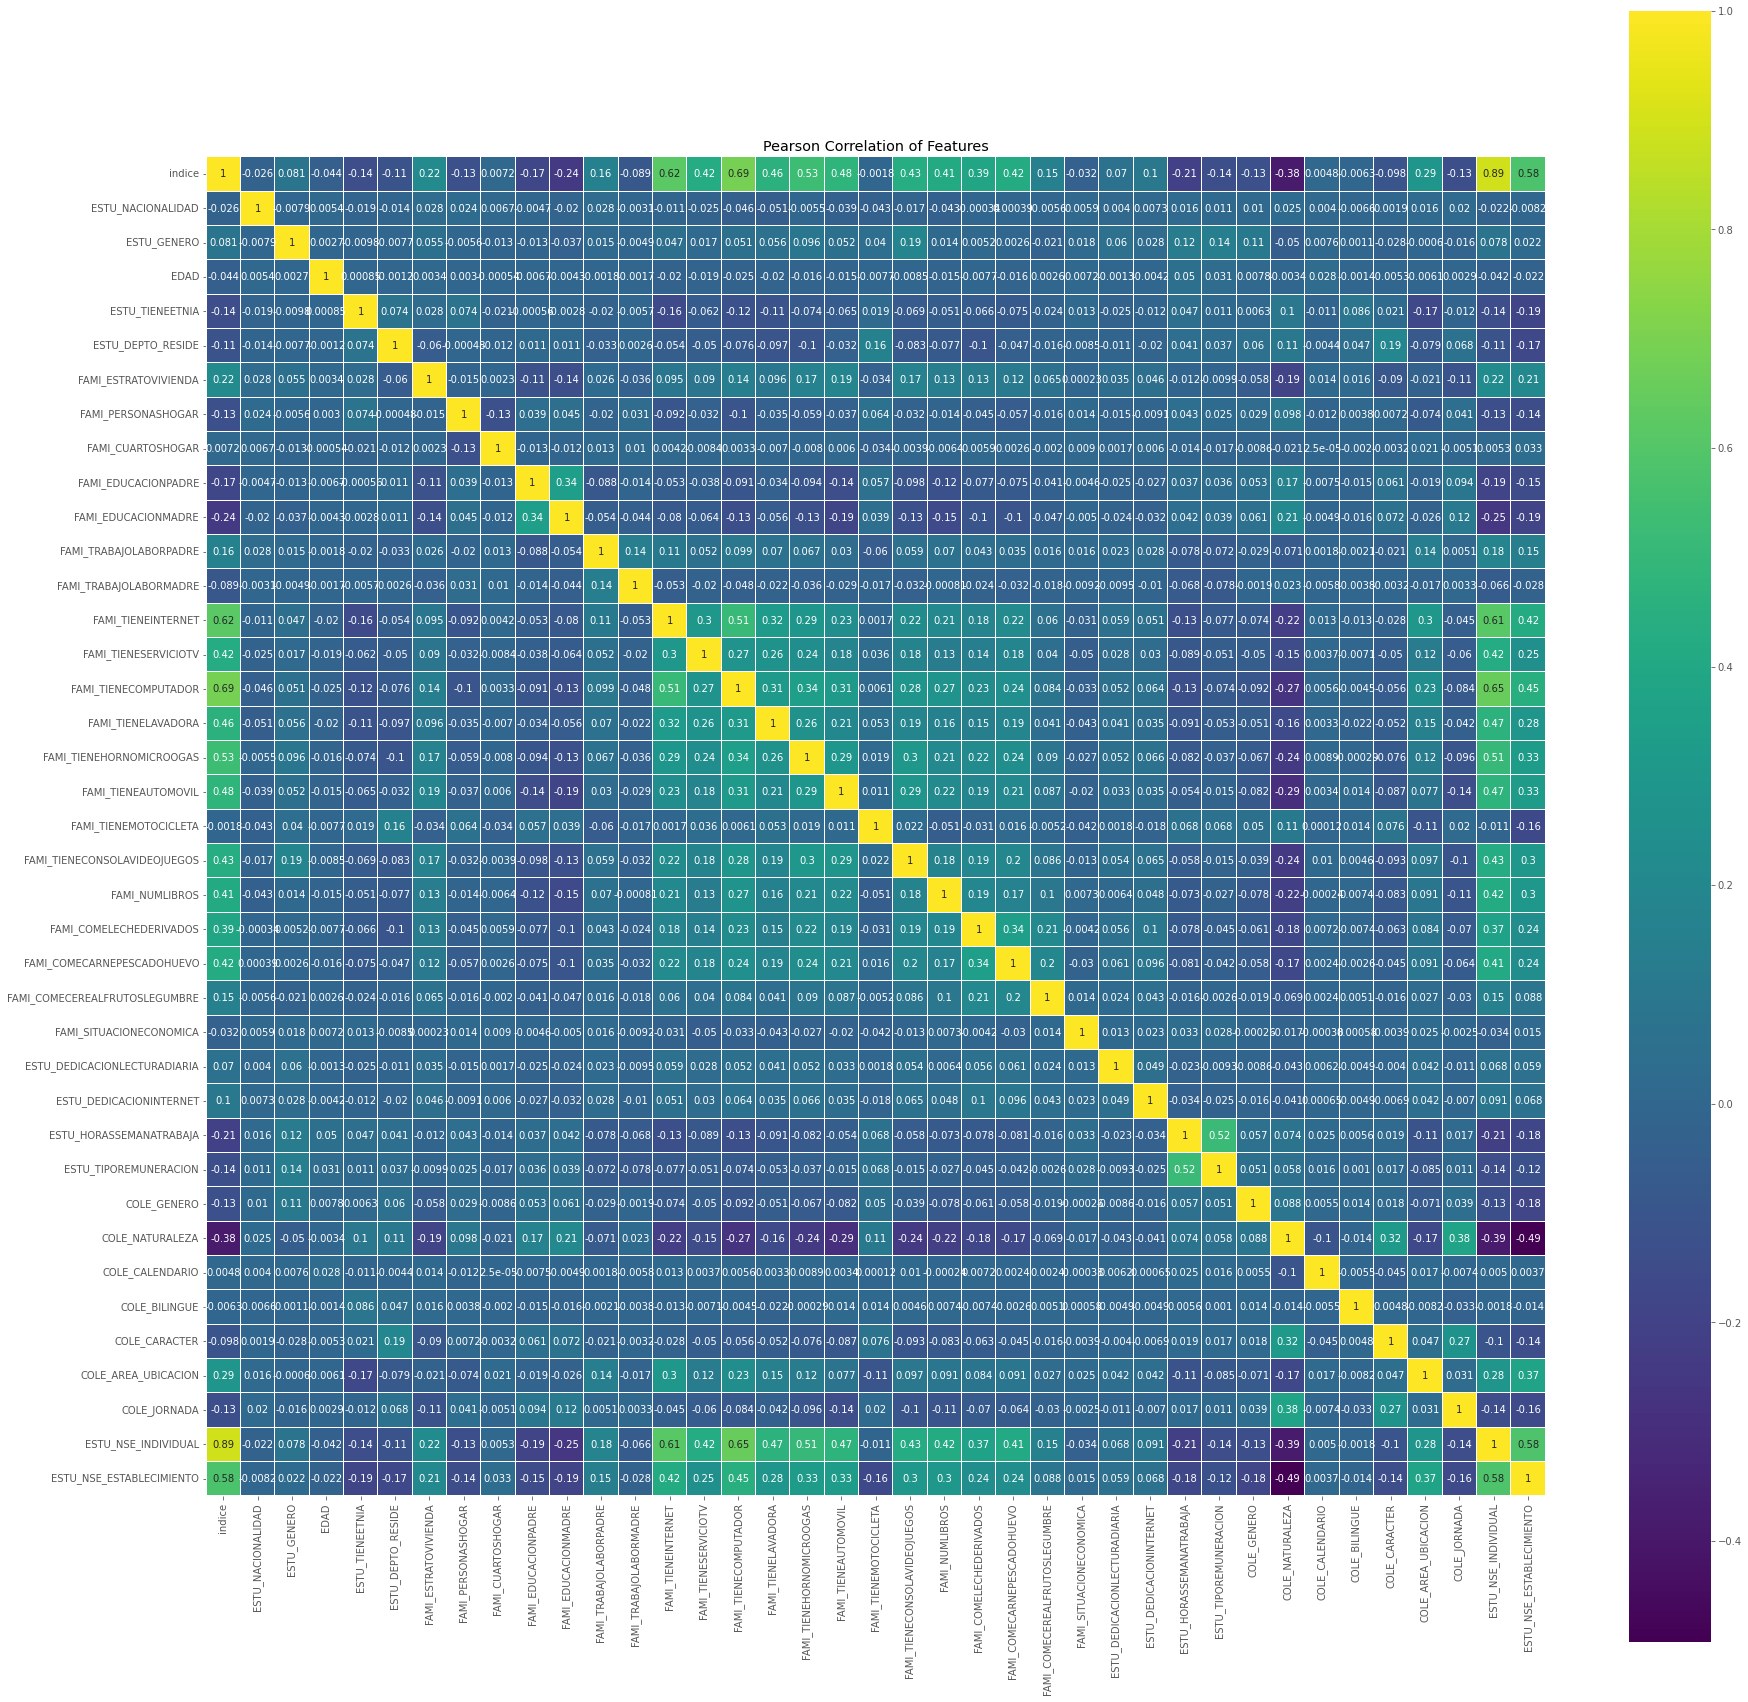

In [63]:
colormap = plt.cm.viridis
plt.figure(figsize=(30,30))
plt.title('Pearson Correlation of Features')
sb.heatmap(X.astype(float).corr(),
           vmax=1.0,
           cmap=colormap,
           annot=True,
           linewidths=0.1,
           linecolor='white',
           square=True)

Como podemos ver en la matriz de confusión el índice del nivel socioeconómico tiene alta relación con variables como si la familia tiene internet, computador, etc.

Nuestra variable objetivo será el puntaje Global

In [64]:
X=df
y=df_objetivo['PUNT_GLOBAL']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
print(X.shape)

(441184, 39)


Se usaá el algoritmo selectKBest para elegir las 10 mejores variables.

In [65]:
best=SelectKBest(k=10)
X_new = best.fit_transform(X_train, y_train)
print(X_new.shape)
selected = best.get_support(indices=True)
print(X_train.columns[selected])

(308828, 10)
Index(['indice', 'FAMI_TIENEINTERNET', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENEAUTOMOVIL', 'FAMI_NUMLIBROS', 'ESTU_HORASSEMANATRABAJA',
       'COLE_NATURALEZA', 'COLE_AREA_UBICACION', 'ESTU_NSE_INDIVIDUAL',
       'ESTU_NSE_ESTABLECIMIENTO'],
      dtype='object')


Metricas utilizadas para regresión: 



*   MSE: Se obtiene dividiendo la suma de los cuadrados de la diferencia entre el valor real y el valor predicho. 
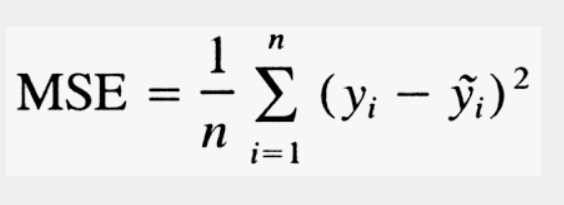
*   RMSE: Es la Raíz del MSE <br>
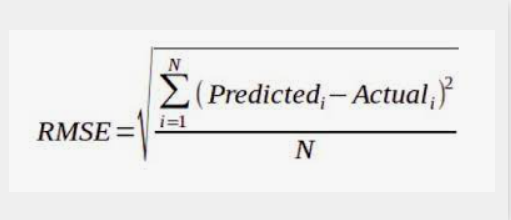
*   MAE: Error absoluto medio, es la media del valor absoluto de la diferencia entre el valor real y el valor predicho.
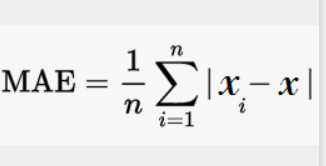



Se ensayará el modelo con regresion lineal, regresion ridge, regresión lasso, árbol de decisión, random forest, y una red neuronal simple que provee Sklearn

In [66]:
used_features =X_train.columns[selected]

In [67]:
from sklearn.metrics import mean_absolute_error

### Linear Regression

In [68]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression( )
reg.fit(
    X_train[used_features].values,
    y_train
    )  
y_pred = reg.predict(X_test[used_features].values)

In [69]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1865.2489883696119

In [70]:
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
rmse

43.188528434870435

In [71]:
mae= mean_absolute_error( y_test, y_pred)
mae

34.890510694993814

### Ridge Regression

In [72]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=1 )
reg.fit(
    X_train[used_features].values,
    y_train
    )  
y_pred = reg.predict(X_test[used_features].values)

In [73]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1865.2489999337454

In [74]:
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
rmse

43.18852856875012

In [75]:
mae= mean_absolute_error( y_test, y_pred)
mae

34.89051242071176

### Lasso Regression

In [76]:
from sklearn.linear_model import Lasso
reg = Lasso(alpha=0.11 )
reg.fit(
    X_train[used_features].values,
    y_train
    )  
y_pred = reg.predict(X_test[used_features].values)

In [77]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1864.9942171611024

In [78]:
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
rmse

43.185578810073885

In [79]:
mae= mean_absolute_error( y_test, y_pred)
mae

34.89472107400473

### Decision Tree Regression

In [80]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor( )
reg.fit(
    X_train[used_features].values,
    y_train
    )  
y_pred = reg.predict(X_test[used_features].values)

In [81]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1841.9455230105439

In [82]:
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
rmse

42.91789280720273

In [83]:
mae= mean_absolute_error( y_test, y_pred)
mae

34.560402809940285

### Neural network Regression

In [84]:
from sklearn.neural_network import MLPRegressor
reg = MLPRegressor( )
reg.fit(
    X_train[used_features].values,
    y_train
    )  
y_pred = reg.predict(X_test[used_features].values)

In [85]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1811.1831924985217

In [86]:
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
rmse

42.557997985085265

In [87]:
mae= mean_absolute_error( y_test, y_pred)
mae

34.3255071041186

### Random Forest

In [88]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators = 20, random_state = 0)

reg.fit(
    X_train[used_features].values,
    y_train
    )  
y_pred = reg.predict(X_test[used_features].values)


In [89]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1833.304960713527

In [90]:
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
rmse

42.81711060678344

In [91]:
mae= mean_absolute_error( y_test, y_pred)
mae

34.50529668647443

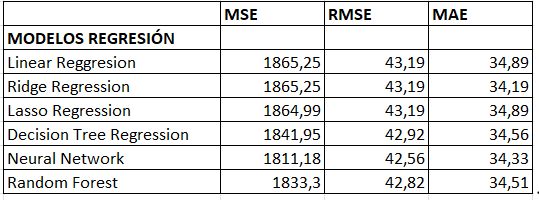

Podemos ver que para todos los algoritmos el MAE ( que es la métrica que más intuitiva para entenderla) está cerca a 35. Tenemos un error promedio de 35 en la predicción del puntaje del estudiante.

Ahora realizaremos un modelo de clasificación, se harán 2 experimentos. Uno para 4 rangos, otro para 2 rangos, a continuación se discretizará la variable del percentil del puntaje global.

## Modelo clasificación

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
df_objetivo

,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL
0,32,2,1,32,7,1,35,8,1,27,3,1,32.0,6.0,A-,158,2.0
1,48,36,2,24,1,1,38,15,1,32,11,1,40.0,30.0,A-,179,8.0
2,47,34,2,56,71,3,52,65,2,39,29,1,40.0,29.0,A-,239,47.0
3,56,64,3,46,38,2,44,36,2,41,35,2,43.0,38.0,A-,232,42.0
4,58,68,3,54,65,3,55,76,2,51,64,2,49.0,55.0,A1,270,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532972,53,53,3,46,37,2,43,35,2,49,59,2,46.0,45.0,A-,238,47.0
532973,35,5,1,28,3,1,34,7,1,27,4,1,35.0,15.0,A-,157,2.0
532974,31,2,1,30,5,1,41,25,2,26,2,1,55.0,72.0,A1,169,5.0
532975,37,7,2,35,10,1,33,6,1,30,7,1,36.0,17.0,A-,170,5.0


In [ ]:
print(df_objetivo.PERCENTIL_GLOBAL.describe()); print("")
df_objetivo.PUNT_GLOBAL.describe()

count    441184.000000
mean         51.848621
std          28.704095
min           1.000000
25%          27.000000
50%          52.000000
75%          77.000000
max         100.000000
Name: PERCENTIL_GLOBAL, dtype: float64



count    441184.000000
mean        249.601307
std          50.308114
min         106.000000
25%         212.000000
50%         246.000000
75%         284.000000
max         494.000000
Name: PUNT_GLOBAL, dtype: float64

In [ ]:
rango_rendimiento= df_objetivo['PERCENTIL_GLOBAL']

df_objetivo.loc[rango_rendimiento <= 27, 'rango_rendimiento'] = 1
df_objetivo.loc[(rango_rendimiento > 27) & (rango_rendimiento <= 52), 'rango_rendimiento']=2
df_objetivo.loc[(rango_rendimiento > 52) & (rango_rendimiento <= 77), 'rango_rendimiento']=3
df_objetivo.loc[rango_rendimiento > 77, 'rango_rendimiento']=4



df_objetivo = pd.concat([df_objetivo['rango_rendimiento'],df_objetivo.drop('rango_rendimiento',axis=1)], axis=1)
df_objetivo

,rango_rendimiento,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL
0,1.0,32,2,1,32,7,1,35,8,1,27,3,1,32.0,6.0,A-,158,2.0
1,1.0,48,36,2,24,1,1,38,15,1,32,11,1,40.0,30.0,A-,179,8.0
2,2.0,47,34,2,56,71,3,52,65,2,39,29,1,40.0,29.0,A-,239,47.0
3,2.0,56,64,3,46,38,2,44,36,2,41,35,2,43.0,38.0,A-,232,42.0
4,3.0,58,68,3,54,65,3,55,76,2,51,64,2,49.0,55.0,A1,270,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532972,2.0,53,53,3,46,37,2,43,35,2,49,59,2,46.0,45.0,A-,238,47.0
532973,1.0,35,5,1,28,3,1,34,7,1,27,4,1,35.0,15.0,A-,157,2.0
532974,1.0,31,2,1,30,5,1,41,25,2,26,2,1,55.0,72.0,A1,169,5.0
532975,1.0,37,7,2,35,10,1,33,6,1,30,7,1,36.0,17.0,A-,170,5.0


In [ ]:
df_objetivo.rango_rendimiento.isnull().sum()

0

In [ ]:
bueno_malo= df_objetivo['PERCENTIL_GLOBAL']

df_objetivo.loc[bueno_malo <= 27, 'bueno_malo'] = 0
df_objetivo.loc[(bueno_malo > 27) & (bueno_malo <= 52), 'bueno_malo']=0
df_objetivo.loc[(bueno_malo > 52) & (bueno_malo <= 77), 'bueno_malo']=1
df_objetivo.loc[bueno_malo > 77, 'bueno_malo']=1



df_objetivo = pd.concat([df_objetivo['bueno_malo'],df_objetivo.drop('bueno_malo',axis=1)], axis=1)
df_objetivo

,bueno_malo,rango_rendimiento,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL
0,0.0,1.0,32,2,1,32,7,1,35,8,1,27,3,1,32.0,6.0,A-,158,2.0
1,0.0,1.0,48,36,2,24,1,1,38,15,1,32,11,1,40.0,30.0,A-,179,8.0
2,0.0,2.0,47,34,2,56,71,3,52,65,2,39,29,1,40.0,29.0,A-,239,47.0
3,0.0,2.0,56,64,3,46,38,2,44,36,2,41,35,2,43.0,38.0,A-,232,42.0
4,1.0,3.0,58,68,3,54,65,3,55,76,2,51,64,2,49.0,55.0,A1,270,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532972,0.0,2.0,53,53,3,46,37,2,43,35,2,49,59,2,46.0,45.0,A-,238,47.0
532973,0.0,1.0,35,5,1,28,3,1,34,7,1,27,4,1,35.0,15.0,A-,157,2.0
532974,0.0,1.0,31,2,1,30,5,1,41,25,2,26,2,1,55.0,72.0,A1,169,5.0
532975,0.0,1.0,37,7,2,35,10,1,33,6,1,30,7,1,36.0,17.0,A-,170,5.0


In [ ]:
df_objetivo.bueno_malo.isnull().sum()

0

In [ ]:
df_objetivo.bueno_malo.value_counts()

0.0    221628
1.0    219556
Name: bueno_malo, dtype: int64

Las métricas utilizadas son las ya conocidas, precision, recall, acuraccy, F1 Score, matriz de confusión y la curva ROC. Se ensayarán varios algoritmos: Regresión logística, árboles de decisión, Random forest y un método de ensamble llamado XGBClassifier

### 4 rangos

In [ ]:
X=df
y=df_objetivo['rango_rendimiento']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
print(X.shape)

(441184, 39)


In [ ]:
clf = LogisticRegression(multi_class="ovr")

clf.fit(
    X_train,
    y_train
    )  
y_pred = clf.predict(X_test)

 
print('Exactitud en el Entrenamiento: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Exactitud en la Validación (test): {:.2f}'
     .format(clf.score(X_test, y_test)))

print("")
print(f'Reporte de clasificación:')
print(classification_report(y_test, y_pred))

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(" Confusion matrix: ")
print(cm)

print("")

print(" F1 SCORE: ")
print(f1_score(y_test, y_pred, average='macro'))

print("")
print(" Accuracy Score: ")
print(accuracy_score(y_test, y_pred))
print("")
pred_prob = clf.predict_proba(X_test)
print(" ROC_AUC_SCORE: ")
print(roc_auc_score(y_test, pred_prob , multi_class='ovr'))

## Para clasificacion binaria
# fper, tper, thresholds = roc_curve(y_test, pred_prob)
# def plot_roc_curve(fper, tper):
#     plt.plot(fper, tper, color='red', label='ROC')
#     plt.plot([0, 1], [0, 1], color='green', linestyle='--')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver Operating Characteristic Curve')
#     plt.legend()
#     plt.show()

# plot_roc_curve(fper, tper)

Exactitud en el Entrenamiento: 0.42
Exactitud en la Validación (test): 0.42

Reporte de clasificación:
              precision    recall  f1-score   support

         1.0       0.46      0.62      0.53     22186
         2.0       0.32      0.18      0.23     21946
         3.0       0.33      0.26      0.29     22619
         4.0       0.48      0.63      0.55     21486

    accuracy                           0.42     88237
   macro avg       0.40      0.42      0.40     88237
weighted avg       0.40      0.42      0.40     88237

 Confusion matrix: 
[[13760  3231  3101  2094]
 [ 8873  3864  4863  4346]
 [ 5442  3223  5924  8030]
 [ 1983  1610  4311 13582]]

 F1 SCORE: 
0.3983773631616138

 Accuracy Score: 
0.4207985312283963

 ROC_AUC_SCORE: 
0.6929383568323138


In [ ]:
clf = DecisionTreeClassifier()

clf.fit(
    X_train,
    y_train
    )  
y_pred = clf.predict(X_test)

 
print('Exactitud en el Entrenamiento: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Exactitud en la Validación (test): {:.2f}'
     .format(clf.score(X_test, y_test)))

print("")
print(f'Reporte de clasificación:')
print(classification_report(y_test, y_pred))

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(" Confusion matrix: ")
print(cm)

print("")

print(" F1 SCORE: ")
print(f1_score(y_test, y_pred, average='macro'))

print("")
print(" Accuracy Score: ")
print(accuracy_score(y_test, y_pred))
print("")
pred_prob = clf.predict_proba(X_test)
print(" ROC_AUC_SCORE: ")
print(roc_auc_score(y_test, pred_prob , multi_class='ovr'))

## Para clasificacion binaria
# fper, tper, thresholds = roc_curve(y_test, pred_prob)
# def plot_roc_curve(fper, tper):
#     plt.plot(fper, tper, color='red', label='ROC')
#     plt.plot([0, 1], [0, 1], color='green', linestyle='--')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver Operating Characteristic Curve')
#     plt.legend()
#     plt.show()

# plot_roc_curve(fper, tper)

Exactitud en el Entrenamiento: 1.00
Exactitud en la Validación (test): 0.35

Reporte de clasificación:
              precision    recall  f1-score   support

         1.0       0.40      0.40      0.40     22186
         2.0       0.28      0.28      0.28     21946
         3.0       0.29      0.29      0.29     22619
         4.0       0.43      0.42      0.43     21486

    accuracy                           0.35     88237
   macro avg       0.35      0.35      0.35     88237
weighted avg       0.35      0.35      0.35     88237

 Confusion matrix: 
[[8805 6383 4652 2346]
 [6247 6185 5730 3784]
 [4511 5721 6669 5718]
 [2438 3985 5960 9103]]

 F1 SCORE: 
0.3498978228264604

 Accuracy Score: 
0.34862925983430987

 ROC_AUC_SCORE: 
0.5660202795306948


In [ ]:
clf = RandomForestClassifier(n_estimators=20)

clf.fit(
    X_train,
    y_train
    )  
y_pred = clf.predict(X_test)

 
print('Exactitud en el Entrenamiento: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Exactitud en la Validación (test): {:.2f}'
     .format(clf.score(X_test, y_test)))

print("")
print(f'Reporte de clasificación:')
print(classification_report(y_test, y_pred))

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(" Confusion matrix: ")
print(cm)

print("")

print(" F1 SCORE: ")
print(f1_score(y_test, y_pred, average='macro'))

print("")
print(" Accuracy Score: ")
print(accuracy_score(y_test, y_pred))
print("")
pred_prob = clf.predict_proba(X_test)
print(" ROC_AUC_SCORE: ")
print(roc_auc_score(y_test, pred_prob , multi_class='ovr'))

## Para clasificacion binaria
# fper, tper, thresholds = roc_curve(y_test, pred_prob)
# def plot_roc_curve(fper, tper):
#     plt.plot(fper, tper, color='red', label='ROC')
#     plt.plot([0, 1], [0, 1], color='green', linestyle='--')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver Operating Characteristic Curve')
#     plt.legend()
#     plt.show()

# plot_roc_curve(fper, tper)

Exactitud en el Entrenamiento: 1.00
Exactitud en la Validación (test): 0.41

Reporte de clasificación:
              precision    recall  f1-score   support

         1.0       0.46      0.57      0.51     22186
         2.0       0.30      0.27      0.29     21946
         3.0       0.32      0.28      0.30     22619
         4.0       0.53      0.52      0.52     21486

    accuracy                           0.41     88237
   macro avg       0.40      0.41      0.41     88237
weighted avg       0.40      0.41      0.40     88237

 Confusion matrix: 
[[12655  5267  3071  1193]
 [ 8106  6035  4978  2827]
 [ 4810  5614  6421  5774]
 [ 1833  3077  5490 11086]]

 F1 SCORE: 
0.4057830931525667

 Accuracy Score: 
0.4102247356551107

 ROC_AUC_SCORE: 
0.6802034359177646


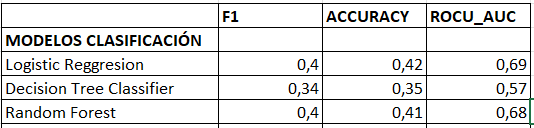

### 2 rangos


In [ ]:
X=df
y=df_objetivo['bueno_malo']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
print(X.shape)

(441184, 39)


Exactitud en el Entrenamiento: 0.70
Exactitud en la Validación (test): 0.70

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.70      0.71      0.70     44132
         1.0       0.70      0.69      0.70     44105

    accuracy                           0.70     88237
   macro avg       0.70      0.70      0.70     88237
weighted avg       0.70      0.70      0.70     88237

 Confusion matrix: 
[[31235 12897]
 [13634 30471]]

 F1 SCORE: 
0.6992986029914978

 Accuracy Score: 
0.6993211464578352

 ROC_AUC_SCORE: 
0.6993185624871426


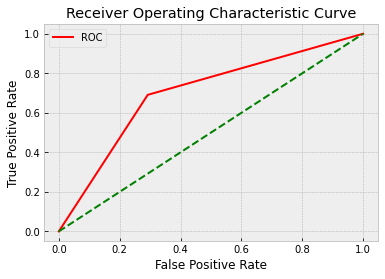

In [ ]:
clf = LogisticRegression(multi_class="ovr")

clf.fit(
    X_train,
    y_train
    )  
y_pred = clf.predict(X_test)

 
print('Exactitud en el Entrenamiento: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Exactitud en la Validación (test): {:.2f}'
     .format(clf.score(X_test, y_test)))

print("")
print(f'Reporte de clasificación:')
print(classification_report(y_test, y_pred))

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(" Confusion matrix: ")
print(cm)

print("")

print(" F1 SCORE: ")
print(f1_score(y_test, y_pred, average='macro'))

print("")
print(" Accuracy Score: ")
print(accuracy_score(y_test, y_pred))
print("")
#pred_prob = clf.predict_proba(X_test)
print(" ROC_AUC_SCORE: ")
print(roc_auc_score(y_test, y_pred ))

## Para clasificacion binaria
fper, tper, thresholds = roc_curve(y_test, y_pred)
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fper, tper)

Exactitud en el Entrenamiento: 1.00
Exactitud en la Validación (test): 0.62

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.62      0.63      0.62     44132
         1.0       0.62      0.62      0.62     44105

    accuracy                           0.62     88237
   macro avg       0.62      0.62      0.62     88237
weighted avg       0.62      0.62      0.62     88237

 Confusion matrix: 
[[27660 16472]
 [16805 27300]]

 F1 SCORE: 
0.6228616801335618

 Accuracy Score: 
0.6228679578861476

 ROC_AUC_SCORE: 
0.6228667677749182


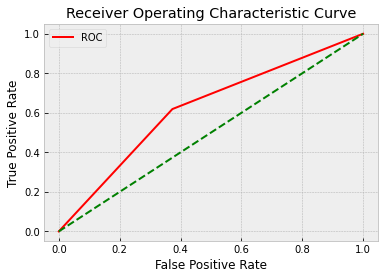

In [ ]:
clf = DecisionTreeClassifier()

clf.fit(
    X_train,
    y_train
    )  
y_pred = clf.predict(X_test)

 
print('Exactitud en el Entrenamiento: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Exactitud en la Validación (test): {:.2f}'
     .format(clf.score(X_test, y_test)))

print("")
print(f'Reporte de clasificación:')
print(classification_report(y_test, y_pred))

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(" Confusion matrix: ")
print(cm)

print("")

print(" F1 SCORE: ")
print(f1_score(y_test, y_pred, average='macro'))

print("")
print(" Accuracy Score: ")
print(accuracy_score(y_test, y_pred))
print("")
pred_prob = clf.predict_proba(X_test)
print(" ROC_AUC_SCORE: ")
print(roc_auc_score(y_test, y_pred ))

## Para clasificacion binaria
fper, tper, thresholds = roc_curve(y_test, y_pred)
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fper, tper)

Exactitud en el Entrenamiento: 1.00
Exactitud en la Validación (test): 0.70

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.68      0.76      0.72     44132
         1.0       0.73      0.65      0.69     44105

    accuracy                           0.70     88237
   macro avg       0.70      0.70      0.70     88237
weighted avg       0.70      0.70      0.70     88237

 Confusion matrix: 
[[33348 10784]
 [15491 28614]]

 F1 SCORE: 
0.7013628187312726

 Accuracy Score: 
0.7022224236998085

 ROC_AUC_SCORE: 
0.7022060725718261


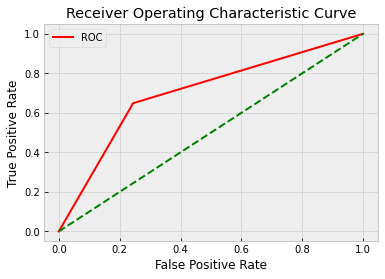

In [ ]:
clf = RandomForestClassifier(n_estimators=20)

clf.fit(
    X_train,
    y_train
    )  
y_pred = clf.predict(X_test)

 
print('Exactitud en el Entrenamiento: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Exactitud en la Validación (test): {:.2f}'
     .format(clf.score(X_test, y_test)))

print("")
print(f'Reporte de clasificación:')
print(classification_report(y_test, y_pred))

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(" Confusion matrix: ")
print(cm)

print("")

print(" F1 SCORE: ")
print(f1_score(y_test, y_pred, average='macro'))

print("")
print(" Accuracy Score: ")
print(accuracy_score(y_test, y_pred))
print("")
pred_prob = clf.predict_proba(X_test)
print(" ROC_AUC_SCORE: ")
print(roc_auc_score(y_test, y_pred ))

# Para clasificacion binaria
fper, tper, thresholds = roc_curve(y_test, y_pred)
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fper, tper)

#### XGB Classifier

In [ ]:
import xgboost as xgb
model_xgb = xgb.XGBClassifier(colsample_bytree=0.7, subsample=0.7, objective='binary:logistic', 
                              eval_metric='auc', min_child_weight=1, 
                              base_score = np.mean(y_train))
model_xgb = model_xgb.fit(X_train, np.ravel(y_train, order='C'))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
parameteres = {'max_depth': [2,4,5], 'n_estimators': [80,100], 'colsample_bytree': [0.7], 'subsample': [0.7], 
               'objective':['binary:logistic'], 'eval_metric':['auc'], 'min_child_weight':[1], 'n_jobs': [-1]}

grid = GridSearchCV(model_xgb, param_grid=parameteres, cv=10)
kf_hiper = KFold(n_splits=10)
model_xgb = grid.fit(X_train, np.ravel(y_train, order='C')).best_estimator_
y_pred_x = model_xgb.predict(X_test)

In [ ]:
model_xgb

XGBClassifier(base_score=0.49710296446775293, colsample_bytree=0.7,
              eval_metric='auc', max_depth=5, n_jobs=-1, subsample=0.7)

 Confusion matrix: 
[[32973 11159]
 [12589 31516]]

              precision    recall  f1-score   support

         0.0       0.72      0.75      0.74     44132
         1.0       0.74      0.71      0.73     44105

    accuracy                           0.73     88237
   macro avg       0.73      0.73      0.73     88237
weighted avg       0.73      0.73      0.73     88237

 F1 SCORE: 
0.7307878005931544

 Accuracy Score: 
0.7308612033500685

 ROC_AUC_SCORE: 
0.7308562191012477


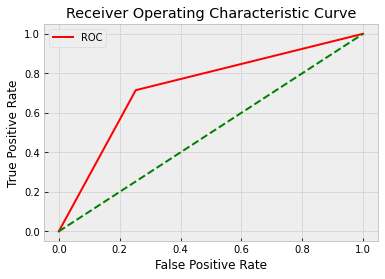

In [ ]:
cm = confusion_matrix(y_test, y_pred_x)
print(" Confusion matrix: ")
print(cm)

print("")
print(classification_report(y_test, y_pred_x))
print(" F1 SCORE: ")
print(f1_score(y_test, y_pred_x, average='macro'))

print("")
print(" Accuracy Score: ")
print(accuracy_score(y_test, y_pred_x))
print("")

print(" ROC_AUC_SCORE: ")
print(roc_auc_score(y_test, y_pred_x ))

# Para clasificacion binaria
fper, tper, thresholds = roc_curve(y_test, y_pred_x)
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fper, tper)

Podemos ver que el resultado del modelo de clasificación binaria es mucho mejor que el multiclases

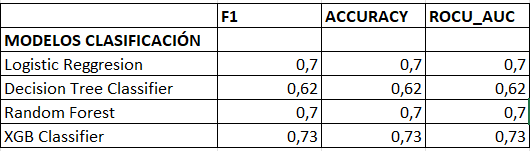

# Selección manual de variables

## Selección

Ahora seleccionaremos las variables según veamos la distribución de los datos. Leemos el dataframe que había sido guardado previamente y dividimos el dataframe de  variables objetivo con el dataframe de características. 

In [ ]:
df_total=pd.read_csv('/content/drive/MyDrive/Tecno-Inclusion/ICFES/df_total.csv') 
df_total

,ESTU_NACIONALIDAD,ESTU_GENERO,EDAD,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_AREA_UBICACION,COLE_JORNADA,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL
0,COLOMBIA,F,17,No,CALDAS,Estrato 1,3 a 4,Cuatro,Secundaria (Bachillerato) completa,Primaria completa,Es dueño de un negocio pequeño (tiene pocos em...,Es dueño de un negocio pequeño (tiene pocos em...,No,No,Si,Si,No,No,Si,Si,26 A 100 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,48.765076,2.0,2.0,32,2,1,32,7,1,35,8,1,27,3,1,32.0,6.0,A-,158,2.0
1,COLOMBIA,M,16,No,CALDAS,Estrato 2,5 a 6,Tres,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Es operario de máquinas o conduce vehículos (t...,"Trabaja en el hogar, no trabaja o estudia",No,Si,No,Si,Si,No,Si,No,26 A 100 LIBROS,1 o 2 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,No leo por entretenimiento,No Navega Internet,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,47.657176,2.0,2.0,48,36,2,24,1,1,38,15,1,32,11,1,40.0,30.0,A-,179,8.0
2,COLOMBIA,F,17,No,CALDAS,Estrato 2,7 a 8,Cuatro,Primaria incompleta,Primaria incompleta,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia",No,No,No,No,No,No,No,No,0 A 10 LIBROS,3 a 5 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,37.502857,1.0,1.0,47,34,2,56,71,3,52,65,2,39,29,1,40.0,29.0,A-,239,47.0
3,COLOMBIA,F,16,No,RISARALDA,Sin Estrato,7 a 8,Cuatro,Primaria incompleta,Primaria completa,"Es agricultor, pesquero o jornalero","Trabaja en el hogar, no trabaja o estudia",No,No,No,Si,Si,Si,No,No,11 A 25 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Más de 2 horas,Entre 1 y 3 horas,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,44.092403,2.0,1.0,56,64,3,46,38,2,44,36,2,41,35,2,43.0,38.0,A-,232,42.0
4,COLOMBIA,F,16,No,CALDAS,Estrato 2,7 a 8,Cuatro,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Trabaja por cuenta propia (por ejemplo plomero...,Trabaja por cuenta propia (por ejemplo plomero...,Si,Si,Si,Si,No,No,Si,No,0 A 10 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,30 minutos o menos,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,UNICA,51.597759,3.0,2.0,58,68,3,54,65,3,55,76,2,51,64,2,49.0,55.0,A1,270,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441179,COLOMBIA,F,16,No,CORDOBA,Estrato 1,1 a 2,Uno,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No aplica,"Trabaja en el hogar, no trabaja o estudia",No,No,No,Si,No,No,No,No,0 A 10 LIBROS,1 o 2 veces por

In [ ]:
df_objetivo=df_total[[
              'PUNT_LECTURA_CRITICA','PERCENTIL_LECTURA_CRITICA', 'DESEMP_LECTURA_CRITICA', 
              'PUNT_MATEMATICAS', 'PERCENTIL_MATEMATICAS', 'DESEMP_MATEMATICAS',
              'PUNT_C_NATURALES', 'PERCENTIL_C_NATURALES', 'DESEMP_C_NATURALES', 
              'PUNT_SOCIALES_CIUDADANAS','PERCENTIL_SOCIALES_CIUDADANAS','DESEMP_SOCIALES_CIUDADANAS',
              'PUNT_INGLES','PERCENTIL_INGLES','DESEMP_INGLES','PUNT_GLOBAL','PERCENTIL_GLOBAL'
              ]]

In [ ]:
df= df_total.drop([
              'PUNT_LECTURA_CRITICA','PERCENTIL_LECTURA_CRITICA', 'DESEMP_LECTURA_CRITICA', 
              'PUNT_MATEMATICAS', 'PERCENTIL_MATEMATICAS', 'DESEMP_MATEMATICAS',
              'PUNT_C_NATURALES', 'PERCENTIL_C_NATURALES', 'DESEMP_C_NATURALES', 
              'PUNT_SOCIALES_CIUDADANAS','PERCENTIL_SOCIALES_CIUDADANAS','DESEMP_SOCIALES_CIUDADANAS',
              'PUNT_INGLES','PERCENTIL_INGLES','DESEMP_INGLES','PUNT_GLOBAL','PERCENTIL_GLOBAL'
              ], axis=1)
df


,ESTU_NACIONALIDAD,ESTU_GENERO,EDAD,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_AREA_UBICACION,COLE_JORNADA,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO
0,COLOMBIA,F,17,No,CALDAS,Estrato 1,3 a 4,Cuatro,Secundaria (Bachillerato) completa,Primaria completa,Es dueño de un negocio pequeño (tiene pocos em...,Es dueño de un negocio pequeño (tiene pocos em...,No,No,Si,Si,No,No,Si,Si,26 A 100 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,48.765076,2.0,2.0
1,COLOMBIA,M,16,No,CALDAS,Estrato 2,5 a 6,Tres,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Es operario de máquinas o conduce vehículos (t...,"Trabaja en el hogar, no trabaja o estudia",No,Si,No,Si,Si,No,Si,No,26 A 100 LIBROS,1 o 2 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,No leo por entretenimiento,No Navega Internet,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,47.657176,2.0,2.0
2,COLOMBIA,F,17,No,CALDAS,Estrato 2,7 a 8,Cuatro,Primaria incompleta,Primaria incompleta,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia",No,No,No,No,No,No,No,No,0 A 10 LIBROS,3 a 5 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,37.502857,1.0,1.0
3,COLOMBIA,F,16,No,RISARALDA,Sin Estrato,7 a 8,Cuatro,Primaria incompleta,Primaria completa,"Es agricultor, pesquero o jornalero","Trabaja en el hogar, no trabaja o estudia",No,No,No,Si,Si,Si,No,No,11 A 25 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Más de 2 horas,Entre 1 y 3 horas,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,44.092403,2.0,1.0
4,COLOMBIA,F,16,No,CALDAS,Estrato 2,7 a 8,Cuatro,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Trabaja por cuenta propia (por ejemplo plomero...,Trabaja por cuenta propia (por ejemplo plomero...,Si,Si,Si,Si,No,No,Si,No,0 A 10 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,30 minutos o menos,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,UNICA,51.597759,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441179,COLOMBIA,F,16,No,CORDOBA,Estrato 1,1 a 2,Uno,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No aplica,"Trabaja en el hogar, no trabaja o estudia",No,No,No,Si,No,No,No,No,0 A 10 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Peor,Entre 1 y 2 horas,Entre 1 y 3 horas,Entre 11 y 20 horas,No,MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,41.155781,2.0,2.0
441180,COLOMBIA,M,15,No,CHOCO,Sin Estrato,5 a 6,Cinco,Secundaria (Bachillerato) completa,Educación profesional completa,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia",No,Si,Si,No,Si,Si,No,Si,11 A 25 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,No leo por entretenimiento,Más de 3 horas,Menos de 10 horas,"Si, en efectivo y especie",MIXTO,NO OFICIAL,A,N,ACADÉMICO,URBANO,MAÑANA,51.462136,3.0,3.0
441181,COLOMBIA,M,20

In [ ]:
df.head()

,ESTU_NACIONALIDAD,ESTU_GENERO,EDAD,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_AREA_UBICACION,COLE_JORNADA,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO
0,COLOMBIA,F,17,No,CALDAS,Estrato 1,3 a 4,Cuatro,Secundaria (Bachillerato) completa,Primaria completa,Es dueño de un negocio pequeño (tiene pocos em...,Es dueño de un negocio pequeño (tiene pocos em...,No,No,Si,Si,No,No,Si,Si,26 A 100 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,48.765076,2.0,2.0
1,COLOMBIA,M,16,No,CALDAS,Estrato 2,5 a 6,Tres,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Es operario de máquinas o conduce vehículos (t...,"Trabaja en el hogar, no trabaja o estudia",No,Si,No,Si,Si,No,Si,No,26 A 100 LIBROS,1 o 2 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,No leo por entretenimiento,No Navega Internet,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,47.657176,2.0,2.0
2,COLOMBIA,F,17,No,CALDAS,Estrato 2,7 a 8,Cuatro,Primaria incompleta,Primaria incompleta,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia",No,No,No,No,No,No,No,No,0 A 10 LIBROS,3 a 5 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,37.502857,1.0,1.0
3,COLOMBIA,F,16,No,RISARALDA,Sin Estrato,7 a 8,Cuatro,Primaria incompleta,Primaria completa,"Es agricultor, pesquero o jornalero","Trabaja en el hogar, no trabaja o estudia",No,No,No,Si,Si,Si,No,No,11 A 25 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Más de 2 horas,Entre 1 y 3 horas,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,44.092403,2.0,1.0
4,COLOMBIA,F,16,No,CALDAS,Estrato 2,7 a 8,Cuatro,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Trabaja por cuenta propia (por ejemplo plomero...,Trabaja por cuenta propia (por ejemplo plomero...,Si,Si,Si,Si,No,No,Si,No,0 A 10 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,30 minutos o menos,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,UNICA,51.597759,3.0,2.0


Haremos una selección manual de variables, con la información que tenemos

variables que podemos resumir:
*   FAMI_PERSONASHOGAR - FAMI_CUARTOSHOGAR
*   FAMI_EDUCACIONPADRE - FAMI_EDUCACIONMADRE
*   FAMI_TRABAJOLABORPADRE - FAMI_TRABAJOLABORMADRE
*   FAMI_TIENEINTERNET - FAMI_TIENECOMPUTADOR - ESTU_DEDICACIONINTERNET
*   FAMI_TIENESERVICIOTV - FAMI_TIENECOMPUTADOR - FAMI_TIENELAVADORA - FAMI_TIENEHORNOMICROOGAS - FAMI_TIENECONSOLAVIDEOJUEGOS
*   FAMI_TIENEAUTOMOVIL	- FAMI_TIENEMOTOCICLETA
*   FAMI_NUMLIBROS - ESTU_DEDICACIONLECTURADIARIA
*   FAMI_COMELECHEDERIVADOS - FAMI_COMECARNEPESCADOHUEVO - FAMI_COMECEREALFRUTOSLEGUMBRE
*   ESTU_HORASSEMANATRABAJA	 - ESTU_TIPOREMUNERACION
*   COLE_GENERO	- COLE_NATURALEZA	- COLE_CALENDARIO - COLE_BILINGUE	COLE_CARACTER -	COLE_AREA_UBICACION -	COLE_JORNADA
*   ESTU_INSE_INDIVIDUAL -ESTU_NSE_INDIVIDUAL






Se intentarán reducir estas 30 características lo máximo posible


In [ ]:
#FAMI_PERSONASHOGAR - FAMI_CUARTOSHOGAR
print(df.FAMI_PERSONASHOGAR.value_counts()); print(" ")
print(df.FAMI_CUARTOSHOGAR.value_counts())

3 a 4      225888
5 a 6      133373
1 a 2       37667
7 a 8       32560
9 o más     11696
Name: FAMI_PERSONASHOGAR, dtype: int64
 
Tres          177094
Dos           163538
Cuatro         56158
Uno            21578
Cinco          15296
Seis o mas      7520
Name: FAMI_CUARTOSHOGAR, dtype: int64


In [ ]:
personas_hogar= df['FAMI_PERSONASHOGAR']

df.loc[personas_hogar == '1 a 2', 'personas_hogar'] = 1.5
df.loc[personas_hogar == '3 a 4', 'personas_hogar'] = 3.5
df.loc[personas_hogar == '5 a 6', 'personas_hogar'] = 5.5
df.loc[personas_hogar == '7 a 8', 'personas_hogar'] = 7.5
df.loc[personas_hogar == '9 o más', 'personas_hogar'] = 9.5

del df['FAMI_PERSONASHOGAR']
df = pd.concat([df['personas_hogar'],df.drop('personas_hogar',axis=1)], axis=1)


In [ ]:
cuartos_hogar= df['FAMI_CUARTOSHOGAR']

df.loc[cuartos_hogar == 'Uno', 'cuartos_hogar'] = 1
df.loc[cuartos_hogar == 'Dos', 'cuartos_hogar'] = 2
df.loc[cuartos_hogar == 'Tres', 'cuartos_hogar'] = 3
df.loc[cuartos_hogar == 'Cuatro', 'cuartos_hogar'] = 4
df.loc[cuartos_hogar == 'Cinco', 'cuartos_hogar'] = 5
df.loc[cuartos_hogar == 'Seis o mas', 'cuartos_hogar'] = 6

del df['FAMI_CUARTOSHOGAR']
df = pd.concat([df['cuartos_hogar'],df.drop('cuartos_hogar',axis=1)], axis=1)
df

,cuartos_hogar,personas_hogar,ESTU_NACIONALIDAD,ESTU_GENERO,EDAD,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_AREA_UBICACION,COLE_JORNADA,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO
0,4.0,3.5,COLOMBIA,F,17,No,CALDAS,Estrato 1,Secundaria (Bachillerato) completa,Primaria completa,Es dueño de un negocio pequeño (tiene pocos em...,Es dueño de un negocio pequeño (tiene pocos em...,No,No,Si,Si,No,No,Si,Si,26 A 100 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,48.765076,2.0,2.0
1,3.0,5.5,COLOMBIA,M,16,No,CALDAS,Estrato 2,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Es operario de máquinas o conduce vehículos (t...,"Trabaja en el hogar, no trabaja o estudia",No,Si,No,Si,Si,No,Si,No,26 A 100 LIBROS,1 o 2 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,No leo por entretenimiento,No Navega Internet,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,47.657176,2.0,2.0
2,4.0,7.5,COLOMBIA,F,17,No,CALDAS,Estrato 2,Primaria incompleta,Primaria incompleta,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia",No,No,No,No,No,No,No,No,0 A 10 LIBROS,3 a 5 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,37.502857,1.0,1.0
3,4.0,7.5,COLOMBIA,F,16,No,RISARALDA,Sin Estrato,Primaria incompleta,Primaria completa,"Es agricultor, pesquero o jornalero","Trabaja en el hogar, no trabaja o estudia",No,No,No,Si,Si,Si,No,No,11 A 25 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Más de 2 horas,Entre 1 y 3 horas,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,44.092403,2.0,1.0
4,4.0,7.5,COLOMBIA,F,16,No,CALDAS,Estrato 2,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Trabaja por cuenta propia (por ejemplo plomero...,Trabaja por cuenta propia (por ejemplo plomero...,Si,Si,Si,Si,No,No,Si,No,0 A 10 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,30 minutos o menos,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,UNICA,51.597759,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441179,1.0,1.5,COLOMBIA,F,16,No,CORDOBA,Estrato 1,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No aplica,"Trabaja en el hogar, no trabaja o estudia",No,No,No,Si,No,No,No,No,0 A 10 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Peor,Entre 1 y 2 horas,Entre 1 y 3 horas,Entre 11 y 20 horas,No,MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,41.155781,2.0,2.0
441180,5.0,5.5,COLOMBIA,M,15,No,CHOCO,Sin Estrato,Secundaria (Bachillerato) completa,Educación profesional completa,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia",No,Si,Si,No,Si,Si,No,Si,11 A 25 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,No leo por entretenimiento,Más de 3 horas,Menos de 10 horas,"Si, en efectivo y especie",MIXTO,NO OFICIAL,A,N,ACADÉMICO,URBANO,MAÑANA,51.462136,3.0,3.0
441181,4.0,5.5,COLOMBIA,M,20,No,BOYACA,Estrato 2,Primaria

In [ ]:
df['cuartosVSpersona']= df.cuartos_hogar - df.personas_hogar
df

,cuartos_hogar,personas_hogar,ESTU_NACIONALIDAD,ESTU_GENERO,EDAD,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_AREA_UBICACION,COLE_JORNADA,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,cuartosVSpersona
0,4.0,3.5,COLOMBIA,F,17,No,CALDAS,Estrato 1,Secundaria (Bachillerato) completa,Primaria completa,Es dueño de un negocio pequeño (tiene pocos em...,Es dueño de un negocio pequeño (tiene pocos em...,No,No,Si,Si,No,No,Si,Si,26 A 100 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,48.765076,2.0,2.0,0.5
1,3.0,5.5,COLOMBIA,M,16,No,CALDAS,Estrato 2,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Es operario de máquinas o conduce vehículos (t...,"Trabaja en el hogar, no trabaja o estudia",No,Si,No,Si,Si,No,Si,No,26 A 100 LIBROS,1 o 2 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,No leo por entretenimiento,No Navega Internet,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,47.657176,2.0,2.0,-2.5
2,4.0,7.5,COLOMBIA,F,17,No,CALDAS,Estrato 2,Primaria incompleta,Primaria incompleta,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia",No,No,No,No,No,No,No,No,0 A 10 LIBROS,3 a 5 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,37.502857,1.0,1.0,-3.5
3,4.0,7.5,COLOMBIA,F,16,No,RISARALDA,Sin Estrato,Primaria incompleta,Primaria completa,"Es agricultor, pesquero o jornalero","Trabaja en el hogar, no trabaja o estudia",No,No,No,Si,Si,Si,No,No,11 A 25 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Más de 2 horas,Entre 1 y 3 horas,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,44.092403,2.0,1.0,-3.5
4,4.0,7.5,COLOMBIA,F,16,No,CALDAS,Estrato 2,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Trabaja por cuenta propia (por ejemplo plomero...,Trabaja por cuenta propia (por ejemplo plomero...,Si,Si,Si,Si,No,No,Si,No,0 A 10 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,30 minutos o menos,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,UNICA,51.597759,3.0,2.0,-3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441179,1.0,1.5,COLOMBIA,F,16,No,CORDOBA,Estrato 1,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No aplica,"Trabaja en el hogar, no trabaja o estudia",No,No,No,Si,No,No,No,No,0 A 10 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Peor,Entre 1 y 2 horas,Entre 1 y 3 horas,Entre 11 y 20 horas,No,MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,41.155781,2.0,2.0,-0.5
441180,5.0,5.5,COLOMBIA,M,15,No,CHOCO,Sin Estrato,Secundaria (Bachillerato) completa,Educación profesional completa,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia",No,Si,Si,No,Si,Si,No,Si,11 A 25 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,No leo por entretenimiento,Más de 3 horas,Menos de 10 horas,"Si, en efectivo y especie",MIXTO,NO OFICIAL,A,N,ACADÉMICO,URBANO,MAÑANA,51.462136,3.0,3.0,-0.5
44

In [ ]:
df.cuartosVSpersona.value_counts()

-1.5    127362
-0.5    113293
-2.5     74584
-3.5     45162
 0.5     44470
-4.5     16577
-5.5      7933
 1.5      5790
-6.5      3307
-7.5      1238
 2.5       978
-8.5       311
 3.5       106
 4.5        73
Name: cuartosVSpersona, dtype: int64

In [ ]:
cuartos_por_persona= df['cuartosVSpersona']

df.loc[cuartos_por_persona <= -2.5, 'cuartos_por_persona']=0
df.loc[(cuartos_por_persona > -2.5) & (cuartos_por_persona <= -0.5), 'cuartos_por_persona']=1
df.loc[(cuartos_por_persona > -0.5) & (cuartos_por_persona <= 1.5), 'cuartos_por_persona']=2
df.loc[cuartos_por_persona > 1.5, 'cuartos_por_persona']=3

del df['cuartosVSpersona']
df = pd.concat([df['cuartos_por_persona'],df.drop('cuartos_por_persona',axis=1)], axis=1)
df

,cuartos_por_persona,cuartos_hogar,personas_hogar,ESTU_NACIONALIDAD,ESTU_GENERO,EDAD,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_AREA_UBICACION,COLE_JORNADA,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO
0,2.0,4.0,3.5,COLOMBIA,F,17,No,CALDAS,Estrato 1,Secundaria (Bachillerato) completa,Primaria completa,Es dueño de un negocio pequeño (tiene pocos em...,Es dueño de un negocio pequeño (tiene pocos em...,No,No,Si,Si,No,No,Si,Si,26 A 100 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,48.765076,2.0,2.0
1,0.0,3.0,5.5,COLOMBIA,M,16,No,CALDAS,Estrato 2,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Es operario de máquinas o conduce vehículos (t...,"Trabaja en el hogar, no trabaja o estudia",No,Si,No,Si,Si,No,Si,No,26 A 100 LIBROS,1 o 2 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,No leo por entretenimiento,No Navega Internet,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,47.657176,2.0,2.0
2,0.0,4.0,7.5,COLOMBIA,F,17,No,CALDAS,Estrato 2,Primaria incompleta,Primaria incompleta,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia",No,No,No,No,No,No,No,No,0 A 10 LIBROS,3 a 5 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,37.502857,1.0,1.0
3,0.0,4.0,7.5,COLOMBIA,F,16,No,RISARALDA,Sin Estrato,Primaria incompleta,Primaria completa,"Es agricultor, pesquero o jornalero","Trabaja en el hogar, no trabaja o estudia",No,No,No,Si,Si,Si,No,No,11 A 25 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Más de 2 horas,Entre 1 y 3 horas,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,44.092403,2.0,1.0
4,0.0,4.0,7.5,COLOMBIA,F,16,No,CALDAS,Estrato 2,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Trabaja por cuenta propia (por ejemplo plomero...,Trabaja por cuenta propia (por ejemplo plomero...,Si,Si,Si,Si,No,No,Si,No,0 A 10 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,30 minutos o menos,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,UNICA,51.597759,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441179,1.0,1.0,1.5,COLOMBIA,F,16,No,CORDOBA,Estrato 1,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No aplica,"Trabaja en el hogar, no trabaja o estudia",No,No,No,Si,No,No,No,No,0 A 10 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Peor,Entre 1 y 2 horas,Entre 1 y 3 horas,Entre 11 y 20 horas,No,MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,41.155781,2.0,2.0
441180,1.0,5.0,5.5,COLOMBIA,M,15,No,CHOCO,Sin Estrato,Secundaria (Bachillerato) completa,Educación profesional completa,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia",No,Si,Si,No,Si,Si,No,Si,11 A 25 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,No leo por entretenimiento,Más de 3 horas,Menos de 10 horas,"Si, en efectivo y especie",MIXTO,NO OFICIAL,A,N,ACADÉMICO,URBANO,MAÑANA,51.462136,3.0,3.0
44118

In [ ]:
df.cuartos_por_persona.value_counts()

1.0    240655
0.0    149112
2.0     50260
3.0      1157
Name: cuartos_por_persona, dtype: int64

In [ ]:
df= df.drop(['cuartos_hogar', 'personas_hogar'], axis=1)
df

,cuartos_por_persona,ESTU_NACIONALIDAD,ESTU_GENERO,EDAD,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_AREA_UBICACION,COLE_JORNADA,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO
0,2.0,COLOMBIA,F,17,No,CALDAS,Estrato 1,Secundaria (Bachillerato) completa,Primaria completa,Es dueño de un negocio pequeño (tiene pocos em...,Es dueño de un negocio pequeño (tiene pocos em...,No,No,Si,Si,No,No,Si,Si,26 A 100 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,48.765076,2.0,2.0
1,0.0,COLOMBIA,M,16,No,CALDAS,Estrato 2,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Es operario de máquinas o conduce vehículos (t...,"Trabaja en el hogar, no trabaja o estudia",No,Si,No,Si,Si,No,Si,No,26 A 100 LIBROS,1 o 2 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,No leo por entretenimiento,No Navega Internet,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,47.657176,2.0,2.0
2,0.0,COLOMBIA,F,17,No,CALDAS,Estrato 2,Primaria incompleta,Primaria incompleta,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia",No,No,No,No,No,No,No,No,0 A 10 LIBROS,3 a 5 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,37.502857,1.0,1.0
3,0.0,COLOMBIA,F,16,No,RISARALDA,Sin Estrato,Primaria incompleta,Primaria completa,"Es agricultor, pesquero o jornalero","Trabaja en el hogar, no trabaja o estudia",No,No,No,Si,Si,Si,No,No,11 A 25 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Más de 2 horas,Entre 1 y 3 horas,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,44.092403,2.0,1.0
4,0.0,COLOMBIA,F,16,No,CALDAS,Estrato 2,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Trabaja por cuenta propia (por ejemplo plomero...,Trabaja por cuenta propia (por ejemplo plomero...,Si,Si,Si,Si,No,No,Si,No,0 A 10 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,30 minutos o menos,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,UNICA,51.597759,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441179,1.0,COLOMBIA,F,16,No,CORDOBA,Estrato 1,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No aplica,"Trabaja en el hogar, no trabaja o estudia",No,No,No,Si,No,No,No,No,0 A 10 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Peor,Entre 1 y 2 horas,Entre 1 y 3 horas,Entre 11 y 20 horas,No,MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,41.155781,2.0,2.0
441180,1.0,COLOMBIA,M,15,No,CHOCO,Sin Estrato,Secundaria (Bachillerato) completa,Educación profesional completa,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia",No,Si,Si,No,Si,Si,No,Si,11 A 25 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,No leo por entretenimiento,Más de 3 horas,Menos de 10 horas,"Si, en efectivo y especie",MIXTO,NO OFICIAL,A,N,ACADÉMICO,URBANO,MAÑANA,51.462136,3.0,3.0
441181,1.0,COLOMBIA,M,20,No,BOYACA,Estrato 2,Primaria completa,Educación profesional completa,Es v

In [ ]:
#FAMI_EDUCACIONPADRE - FAMI_EDUCACIONMADRE
print(df.FAMI_EDUCACIONPADRE.value_counts()); print(" ")
print(df.FAMI_EDUCACIONMADRE.value_counts())

Secundaria (Bachillerato) completa      111136
Primaria incompleta                      74851
Secundaria (Bachillerato) incompleta     63345
Educación profesional completa           44494
Primaria completa                        39605
Técnica o tecnológica completa           30457
No sabe                                  29804
Ninguno                                  13628
Técnica o tecnológica incompleta         10117
Educación profesional incompleta          9477
Postgrado                                 8354
No Aplica                                 5916
Name: FAMI_EDUCACIONPADRE, dtype: int64
 
Secundaria (Bachillerato) completa      125998
Secundaria (Bachillerato) incompleta     61120
Primaria incompleta                      55947
Educación profesional completa           55935
Técnica o tecnológica completa           46889
Primaria completa                        38341
Técnica o tecnológica incompleta         15242
Educación profesional incompleta         12406
Postgrado         

In [ ]:
educacion_padre= df['FAMI_EDUCACIONPADRE']

df.loc[educacion_padre == 'Ninguno', 'educacion_padre'] = 0
df.loc[educacion_padre == 'No Aplica', 'educacion_padre'] = 0
df.loc[educacion_padre == 'No sabe', 'educacion_padre'] = 0
df.loc[educacion_padre == 'Primaria incompleta', 'educacion_padre'] = 1
df.loc[educacion_padre == 'Primaria completa', 'educacion_padre'] = 1
df.loc[educacion_padre == 'Secundaria (Bachillerato) incompleta', 'educacion_padre'] = 2
df.loc[educacion_padre == 'Secundaria (Bachillerato) completa', 'educacion_padre'] = 2
df.loc[educacion_padre == 'Técnica o tecnológica incompleta', 'educacion_padre'] = 3
df.loc[educacion_padre == 'Técnica o tecnológica completa', 'educacion_padre'] = 3
df.loc[educacion_padre == 'Educación profesional incompleta', 'educacion_padre'] = 4
df.loc[educacion_padre == 'Educación profesional completa', 'educacion_padre'] = 4
df.loc[educacion_padre == 'Postgrado', 'educacion_padre'] = 4

del df['FAMI_EDUCACIONPADRE']
df = pd.concat([df['educacion_padre'],df.drop('educacion_padre',axis=1)], axis=1)


In [ ]:
educacion_madre= df['FAMI_EDUCACIONMADRE']

df.loc[educacion_madre == 'Ninguno', 'educacion_madre'] = 0
df.loc[educacion_madre == 'No Aplica', 'educacion_madre'] = 0
df.loc[educacion_madre == 'No sabe', 'educacion_madre'] = 0
df.loc[educacion_madre == 'Primaria incompleta', 'educacion_madre'] = 1
df.loc[educacion_madre == 'Primaria completa', 'educacion_madre'] = 1
df.loc[educacion_madre == 'Secundaria (Bachillerato) incompleta', 'educacion_madre'] = 2
df.loc[educacion_madre == 'Secundaria (Bachillerato) completa', 'educacion_madre'] = 2
df.loc[educacion_madre == 'Técnica o tecnológica incompleta', 'educacion_madre'] = 3
df.loc[educacion_madre == 'Técnica o tecnológica completa', 'educacion_madre'] = 3
df.loc[educacion_madre == 'Educación profesional incompleta', 'educacion_madre'] = 4
df.loc[educacion_madre == 'Educación profesional completa', 'educacion_madre'] = 4
df.loc[educacion_madre == 'Postgrado', 'educacion_madre'] = 4

del df['FAMI_EDUCACIONMADRE']
df = pd.concat([df['educacion_madre'],df.drop('educacion_madre',axis=1)], axis=1)
df

,educacion_madre,educacion_padre,cuartos_por_persona,ESTU_NACIONALIDAD,ESTU_GENERO,EDAD,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_AREA_UBICACION,COLE_JORNADA,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO
0,1.0,2.0,2.0,COLOMBIA,F,17,No,CALDAS,Estrato 1,Es dueño de un negocio pequeño (tiene pocos em...,Es dueño de un negocio pequeño (tiene pocos em...,No,No,Si,Si,No,No,Si,Si,26 A 100 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,48.765076,2.0,2.0
1,2.0,2.0,0.0,COLOMBIA,M,16,No,CALDAS,Estrato 2,Es operario de máquinas o conduce vehículos (t...,"Trabaja en el hogar, no trabaja o estudia",No,Si,No,Si,Si,No,Si,No,26 A 100 LIBROS,1 o 2 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,No leo por entretenimiento,No Navega Internet,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,47.657176,2.0,2.0
2,1.0,1.0,0.0,COLOMBIA,F,17,No,CALDAS,Estrato 2,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia",No,No,No,No,No,No,No,No,0 A 10 LIBROS,3 a 5 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,37.502857,1.0,1.0
3,1.0,1.0,0.0,COLOMBIA,F,16,No,RISARALDA,Sin Estrato,"Es agricultor, pesquero o jornalero","Trabaja en el hogar, no trabaja o estudia",No,No,No,Si,Si,Si,No,No,11 A 25 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Más de 2 horas,Entre 1 y 3 horas,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,44.092403,2.0,1.0
4,2.0,2.0,0.0,COLOMBIA,F,16,No,CALDAS,Estrato 2,Trabaja por cuenta propia (por ejemplo plomero...,Trabaja por cuenta propia (por ejemplo plomero...,Si,Si,Si,Si,No,No,Si,No,0 A 10 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,30 minutos o menos,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,UNICA,51.597759,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441179,2.0,2.0,1.0,COLOMBIA,F,16,No,CORDOBA,Estrato 1,No aplica,"Trabaja en el hogar, no trabaja o estudia",No,No,No,Si,No,No,No,No,0 A 10 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Peor,Entre 1 y 2 horas,Entre 1 y 3 horas,Entre 11 y 20 horas,No,MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,41.155781,2.0,2.0
441180,4.0,2.0,1.0,COLOMBIA,M,15,No,CHOCO,Sin Estrato,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia",No,Si,Si,No,Si,Si,No,Si,11 A 25 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,No leo por entretenimiento,Más de 3 horas,Menos de 10 horas,"Si, en efectivo y especie",MIXTO,NO OFICIAL,A,N,ACADÉMICO,URBANO,MAÑANA,51.462136,3.0,3.0
441181,4.0,1.0,1.0,COLOMBIA,M,20,No,BOYACA,Estrato 2,Es vendedor o trabaja en atención al público,Es dueño de un negocio pequeño (tiene pocos em...,Si,Si,No,No,No,No,No,No,0 A 10 LIBROS,Todos o casi todos los días,Todos o casi todos los días,Nunca o rara vez comemos eso,Mejor,No leo por entretenimiento,Más de 3 horas,0,"Si, en efectivo",MIXTO,NO OFICIAL,A,N,ACADÉMICO,URBANO,SABATINA,49.592397,2.0,2.0
441182,1.0,0.0,1.0,COLOMBIA,M,21,Si,CHOCO,Estrato 4,"

In [ ]:
df['educacion_padres']= df.educacion_madre + df.educacion_padre
df= df.drop(['educacion_madre', 'educacion_padre'], axis=1)
df

,cuartos_por_persona,ESTU_NACIONALIDAD,ESTU_GENERO,EDAD,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_AREA_UBICACION,COLE_JORNADA,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,educacion_padres
0,2.0,COLOMBIA,F,17,No,CALDAS,Estrato 1,Es dueño de un negocio pequeño (tiene pocos em...,Es dueño de un negocio pequeño (tiene pocos em...,No,No,Si,Si,No,No,Si,Si,26 A 100 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,48.765076,2.0,2.0,3.0
1,0.0,COLOMBIA,M,16,No,CALDAS,Estrato 2,Es operario de máquinas o conduce vehículos (t...,"Trabaja en el hogar, no trabaja o estudia",No,Si,No,Si,Si,No,Si,No,26 A 100 LIBROS,1 o 2 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,No leo por entretenimiento,No Navega Internet,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,47.657176,2.0,2.0,4.0
2,0.0,COLOMBIA,F,17,No,CALDAS,Estrato 2,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia",No,No,No,No,No,No,No,No,0 A 10 LIBROS,3 a 5 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,37.502857,1.0,1.0,2.0
3,0.0,COLOMBIA,F,16,No,RISARALDA,Sin Estrato,"Es agricultor, pesquero o jornalero","Trabaja en el hogar, no trabaja o estudia",No,No,No,Si,Si,Si,No,No,11 A 25 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Más de 2 horas,Entre 1 y 3 horas,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,44.092403,2.0,1.0,2.0
4,0.0,COLOMBIA,F,16,No,CALDAS,Estrato 2,Trabaja por cuenta propia (por ejemplo plomero...,Trabaja por cuenta propia (por ejemplo plomero...,Si,Si,Si,Si,No,No,Si,No,0 A 10 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,30 minutos o menos,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,UNICA,51.597759,3.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441179,1.0,COLOMBIA,F,16,No,CORDOBA,Estrato 1,No aplica,"Trabaja en el hogar, no trabaja o estudia",No,No,No,Si,No,No,No,No,0 A 10 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Peor,Entre 1 y 2 horas,Entre 1 y 3 horas,Entre 11 y 20 horas,No,MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,41.155781,2.0,2.0,4.0
441180,1.0,COLOMBIA,M,15,No,CHOCO,Sin Estrato,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia",No,Si,Si,No,Si,Si,No,Si,11 A 25 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,No leo por entretenimiento,Más de 3 horas,Menos de 10 horas,"Si, en efectivo y especie",MIXTO,NO OFICIAL,A,N,ACADÉMICO,URBANO,MAÑANA,51.462136,3.0,3.0,6.0
441181,1.0,COLOMBIA,M,20,No,BOYACA,Estrato 2,Es vendedor o trabaja en atención al público,Es dueño de un negocio pequeño (tiene pocos em...,Si,Si,No,No,No,No,No,No,0 A 10 LIBROS,Todos o casi todos los días,Todos o casi todos los días,Nunca o rara vez comemos eso,Mejor,No leo por entretenimiento,Más de 3 horas,0,"Si, en efectivo",MIXTO,NO OFICIAL,A,N,ACADÉMICO,URBANO,SABATINA,49.592397,2.0,2.0,5.0
441182,1.0,COLOMBIA,M,21,Si,CHOCO,Estrato 4,"Es agricultor, pesquero o jornalero","Es agricultor, pesque

In [ ]:
df['educacion_padres'].value_counts()

4.0    122024
2.0     78450
3.0     68956
6.0     48603
5.0     42141
8.0     38356
7.0     18440
1.0     13858
0.0     10356
Name: educacion_padres, dtype: int64

In [ ]:
df['educacion_padres'].describe()

count    441184.000000
mean          4.088936
std           1.954815
min           0.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           8.000000
Name: educacion_padres, dtype: float64

In [ ]:
educacion_de_padres= df['educacion_padres']

df.loc[educacion_de_padres <= 2.0, 'educacion_de_padres']=0
df.loc[(educacion_de_padres > 2.0) & (educacion_de_padres <= 4.0), 'educacion_de_padres']=1
df.loc[(educacion_de_padres > 4.0) & (educacion_de_padres <= 5.0), 'educacion_de_padres']=2
df.loc[educacion_de_padres > 5.0, 'educacion_de_padres']=3

del df['educacion_padres']
df = pd.concat([df['educacion_de_padres'],df.drop('educacion_de_padres',axis=1)], axis=1)
df.head(20)

,educacion_de_padres,cuartos_por_persona,ESTU_NACIONALIDAD,ESTU_GENERO,EDAD,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_AREA_UBICACION,COLE_JORNADA,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO
0,1.0,2.0,COLOMBIA,F,17,No,CALDAS,Estrato 1,Es dueño de un negocio pequeño (tiene pocos em...,Es dueño de un negocio pequeño (tiene pocos em...,No,No,Si,Si,No,No,Si,Si,26 A 100 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,48.765076,2.0,2.0
1,1.0,0.0,COLOMBIA,M,16,No,CALDAS,Estrato 2,Es operario de máquinas o conduce vehículos (t...,"Trabaja en el hogar, no trabaja o estudia",No,Si,No,Si,Si,No,Si,No,26 A 100 LIBROS,1 o 2 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,No leo por entretenimiento,No Navega Internet,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,47.657176,2.0,2.0
2,0.0,0.0,COLOMBIA,F,17,No,CALDAS,Estrato 2,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia",No,No,No,No,No,No,No,No,0 A 10 LIBROS,3 a 5 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,37.502857,1.0,1.0
3,0.0,0.0,COLOMBIA,F,16,No,RISARALDA,Sin Estrato,"Es agricultor, pesquero o jornalero","Trabaja en el hogar, no trabaja o estudia",No,No,No,Si,Si,Si,No,No,11 A 25 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Más de 2 horas,Entre 1 y 3 horas,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,44.092403,2.0,1.0
4,1.0,0.0,COLOMBIA,F,16,No,CALDAS,Estrato 2,Trabaja por cuenta propia (por ejemplo plomero...,Trabaja por cuenta propia (por ejemplo plomero...,Si,Si,Si,Si,No,No,Si,No,0 A 10 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,30 minutos o menos,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,UNICA,51.597759,3.0,2.0
5,0.0,0.0,COLOMBIA,F,17,Si,CALDAS,Estrato 1,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia",No,Si,No,Si,No,No,No,No,0 A 10 LIBROS,Nunca o rara vez comemos eso,Todos o casi todos los días,3 a 5 veces por semana,Mejor,30 minutos o menos,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,COMPLETA,38.744318,1.0,2.0
6,0.0,1.0,COLOMBIA,F,17,No,CALDAS,Estrato 2,"Es agricultor, pesquero o jornalero","Es agricultor, pesquero o jornalero",No,Si,Si,Si,No,Si,Si,Si,0 A 10 LIBROS,Todos o casi todos los días,Todos o casi todos los días,Todos o casi todos los días,Igual,Entre 1 y 2 horas,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,N,NO APLICA,RURAL,COMPLETA,48.188469,2.0,2.0
7,0.0,1.0,COLOMBIA,F,16,No,CALDAS,Estrato 2,"Es agricultor, pesquero o jornalero",Es vendedor o trabaja en atención al público,Si,No,No,No,No,No,Si,No,0 A 10 LIBROS,Todos o casi todos los días,3 a 5 veces por semana,Nunca o rara vez comemos eso,Igual,Entre 30 y 60 minutos,Más de 3 horas,0,No,MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,URBANO,UNICA,40.734150,1.0,2.0
8,1.0,1.0,COLOMBIA,F,16,No,CALDAS,Estrato 2,"Es agricultor, pesquero o jornalero","Es agricultor, pesquero o jornalero",No,Si,No,Si,No,No,No,No,0 A 10 LIBROS,1 o 2 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,No leo por entretenimiento,Más de 3 horas,Menos de

In [ ]:
df['educacion_de_padres'].value_counts()

1.0    190980
3.0    105399
0.0    102664
2.0     42141
Name: educacion_de_padres, dtype: int64

variables que podemos resumir:
*   FAMI_PERSONASHOGAR - FAMI_CUARTOSHOGAR ✓

*   FAMI_EDUCACIONPADRE - FAMI_EDUCACIONMADRE ✓
*   FAMI_TRABAJOLABORPADRE - FAMI_TRABAJOLABORMADRE
*   FAMI_TIENEINTERNET - FAMI_TIENECOMPUTADOR - ESTU_DEDICACIONINTERNET
*   FAMI_TIENESERVICIOTV - FAMI_TIENECOMPUTADOR - FAMI_TIENELAVADORA - FAMI_TIENEHORNOMICROOGAS - FAMI_TIENECONSOLAVIDEOJUEGOS
*   FAMI_TIENEAUTOMOVIL	- FAMI_TIENEMOTOCICLETA
*   FAMI_NUMLIBROS - ESTU_DEDICACIONLECTURADIARIA
*   FAMI_COMELECHEDERIVADOS - FAMI_COMECARNEPESCADOHUEVO - FAMI_COMECEREALFRUTOSLEGUMBRE
*   ESTU_HORASSEMANATRABAJA	 - ESTU_TIPOREMUNERACION
*   COLE_GENERO	- COLE_NATURALEZA	- COLE_CALENDARIO - COLE_BILINGUE	COLE_CARACTER -	COLE_AREA_UBICACION -	COLE_JORNADA
*   ESTU_INSE_INDIVIDUAL -ESTU_NSE_INDIVIDUAL






In [ ]:
#FAMI_TRABAJOLABORPADRE - FAMI_TRABAJOLABORMADRE
print(df.FAMI_TRABAJOLABORPADRE.value_counts()); print(" ")
print(df.FAMI_TRABAJOLABORMADRE.value_counts())

Es agricultor, pesquero o jornalero                                                                     59200
Trabaja por cuenta propia (por ejemplo plomero, electricista)                                           55040
Es operario de máquinas o conduce vehículos (taxita, chofer)                                            46568
No aplica                                                                                               39832
No sabe                                                                                                 37835
Trabaja como profesional (por ejemplo médico, abogado, ingeniero)                                       37298
Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc    36716
Trabaja como personal de limpieza, mantenimiento, seguridad o construcción                              31127
Trabaja en el hogar, no trabaja o estudia                                                               29060
Es vendedo

In [ ]:
df.head(20)

,educacion_de_padres,cuartos_por_persona,ESTU_NACIONALIDAD,ESTU_GENERO,EDAD,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_AREA_UBICACION,COLE_JORNADA,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO
0,1.0,2.0,COLOMBIA,F,17,No,CALDAS,Estrato 1,Es dueño de un negocio pequeño (tiene pocos em...,Es dueño de un negocio pequeño (tiene pocos em...,No,No,Si,Si,No,No,Si,Si,26 A 100 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,48.765076,2.0,2.0
1,1.0,0.0,COLOMBIA,M,16,No,CALDAS,Estrato 2,Es operario de máquinas o conduce vehículos (t...,"Trabaja en el hogar, no trabaja o estudia",No,Si,No,Si,Si,No,Si,No,26 A 100 LIBROS,1 o 2 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,No leo por entretenimiento,No Navega Internet,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,47.657176,2.0,2.0
2,0.0,0.0,COLOMBIA,F,17,No,CALDAS,Estrato 2,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia",No,No,No,No,No,No,No,No,0 A 10 LIBROS,3 a 5 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,37.502857,1.0,1.0
3,0.0,0.0,COLOMBIA,F,16,No,RISARALDA,Sin Estrato,"Es agricultor, pesquero o jornalero","Trabaja en el hogar, no trabaja o estudia",No,No,No,Si,Si,Si,No,No,11 A 25 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Más de 2 horas,Entre 1 y 3 horas,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,44.092403,2.0,1.0
4,1.0,0.0,COLOMBIA,F,16,No,CALDAS,Estrato 2,Trabaja por cuenta propia (por ejemplo plomero...,Trabaja por cuenta propia (por ejemplo plomero...,Si,Si,Si,Si,No,No,Si,No,0 A 10 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,30 minutos o menos,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,UNICA,51.597759,3.0,2.0
5,0.0,0.0,COLOMBIA,F,17,Si,CALDAS,Estrato 1,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia",No,Si,No,Si,No,No,No,No,0 A 10 LIBROS,Nunca o rara vez comemos eso,Todos o casi todos los días,3 a 5 veces por semana,Mejor,30 minutos o menos,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,COMPLETA,38.744318,1.0,2.0
6,0.0,1.0,COLOMBIA,F,17,No,CALDAS,Estrato 2,"Es agricultor, pesquero o jornalero","Es agricultor, pesquero o jornalero",No,Si,Si,Si,No,Si,Si,Si,0 A 10 LIBROS,Todos o casi todos los días,Todos o casi todos los días,Todos o casi todos los días,Igual,Entre 1 y 2 horas,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,N,NO APLICA,RURAL,COMPLETA,48.188469,2.0,2.0
7,0.0,1.0,COLOMBIA,F,16,No,CALDAS,Estrato 2,"Es agricultor, pesquero o jornalero",Es vendedor o trabaja en atención al público,Si,No,No,No,No,No,Si,No,0 A 10 LIBROS,Todos o casi todos los días,3 a 5 veces por semana,Nunca o rara vez comemos eso,Igual,Entre 30 y 60 minutos,Más de 3 horas,0,No,MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,URBANO,UNICA,40.734150,1.0,2.0
8,1.0,1.0,COLOMBIA,F,16,No,CALDAS,Estrato 2,"Es agricultor, pesquero o jornalero","Es agricultor, pesquero o jornalero",No,Si,No,Si,No,No,No,No,0 A 10 LIBROS,1 o 2 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,No leo por entretenimiento,Más de 3 horas,Menos de

In [ ]:
trabajo_padre= df['FAMI_TRABAJOLABORPADRE']

df.loc[trabajo_padre == 'Trabaja en el hogar, no trabaja o estudia', 'trabajo_padre'] = 0
df.loc[trabajo_padre == 'No aplica', 'trabajo_padre'] = 0
df.loc[trabajo_padre == 'No sabe', 'trabajo_padre'] = 0
df.loc[trabajo_padre == 'Trabaja como personal de limpieza, mantenimiento, seguridad o construcción', 'trabajo_padre'] = 1
df.loc[trabajo_padre == 'Es agricultor, pesquero o jornalero', 'trabajo_padre'] = 1
df.loc[trabajo_padre == 'Trabaja por cuenta propia (por ejemplo plomero, electricista)', 'trabajo_padre'] = 2
df.loc[trabajo_padre == 'Tiene un trabajo de tipo auxiliar administrativo (por ejemplo, secretario o asistente)', 'trabajo_padre'] = 2
df.loc[trabajo_padre == 'Es operario de máquinas o conduce vehículos (taxita, chofer)', 'trabajo_padre'] = 2
df.loc[trabajo_padre == 'Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc', 'trabajo_padre'] = 3
df.loc[trabajo_padre == 'Es vendedor o trabaja en atención al público', 'trabajo_padre'] = 3
df.loc[trabajo_padre == 'Es dueño de un negocio grande, tiene un cargo de nivel directivo o gerencial', 'trabajo_padre'] = 4
df.loc[trabajo_padre == 'Trabaja como profesional (por ejemplo médico, abogado, ingeniero)', 'trabajo_padre'] = 4
df.loc[trabajo_padre == 'Pensionado', 'trabajo_padre'] = 4

del df['FAMI_TRABAJOLABORPADRE']
df = pd.concat([df['trabajo_padre'],df.drop('trabajo_padre',axis=1)], axis=1)

In [ ]:
df.head(20)

,trabajo_padre,educacion_de_padres,cuartos_por_persona,ESTU_NACIONALIDAD,ESTU_GENERO,EDAD,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_AREA_UBICACION,COLE_JORNADA,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO
0,3.0,1.0,2.0,COLOMBIA,F,17,No,CALDAS,Estrato 1,Es dueño de un negocio pequeño (tiene pocos em...,No,No,Si,Si,No,No,Si,Si,26 A 100 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,48.765076,2.0,2.0
1,2.0,1.0,0.0,COLOMBIA,M,16,No,CALDAS,Estrato 2,"Trabaja en el hogar, no trabaja o estudia",No,Si,No,Si,Si,No,Si,No,26 A 100 LIBROS,1 o 2 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,No leo por entretenimiento,No Navega Internet,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,47.657176,2.0,2.0
2,0.0,0.0,0.0,COLOMBIA,F,17,No,CALDAS,Estrato 2,"Trabaja en el hogar, no trabaja o estudia",No,No,No,No,No,No,No,No,0 A 10 LIBROS,3 a 5 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,37.502857,1.0,1.0
3,1.0,0.0,0.0,COLOMBIA,F,16,No,RISARALDA,Sin Estrato,"Trabaja en el hogar, no trabaja o estudia",No,No,No,Si,Si,Si,No,No,11 A 25 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Más de 2 horas,Entre 1 y 3 horas,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,44.092403,2.0,1.0
4,2.0,1.0,0.0,COLOMBIA,F,16,No,CALDAS,Estrato 2,Trabaja por cuenta propia (por ejemplo plomero...,Si,Si,Si,Si,No,No,Si,No,0 A 10 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,30 minutos o menos,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,UNICA,51.597759,3.0,2.0
5,0.0,0.0,0.0,COLOMBIA,F,17,Si,CALDAS,Estrato 1,"Trabaja en el hogar, no trabaja o estudia",No,Si,No,Si,No,No,No,No,0 A 10 LIBROS,Nunca o rara vez comemos eso,Todos o casi todos los días,3 a 5 veces por semana,Mejor,30 minutos o menos,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,COMPLETA,38.744318,1.0,2.0
6,1.0,0.0,1.0,COLOMBIA,F,17,No,CALDAS,Estrato 2,"Es agricultor, pesquero o jornalero",No,Si,Si,Si,No,Si,Si,Si,0 A 10 LIBROS,Todos o casi todos los días,Todos o casi todos los días,Todos o casi todos los días,Igual,Entre 1 y 2 horas,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,N,NO APLICA,RURAL,COMPLETA,48.188469,2.0,2.0
7,1.0,0.0,1.0,COLOMBIA,F,16,No,CALDAS,Estrato 2,Es vendedor o trabaja en atención al público,Si,No,No,No,No,No,Si,No,0 A 10 LIBROS,Todos o casi todos los días,3 a 5 veces por semana,Nunca o rara vez comemos eso,Igual,Entre 30 y 60 minutos,Más de 3 horas,0,No,MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,URBANO,UNICA,40.734150,1.0,2.0
8,1.0,1.0,1.0,COLOMBIA,F,16,No,CALDAS,Estrato 2,"Es agricultor, pesquero o jornalero",No,Si,No,Si,No,No,No,No,0 A 10 LIBROS,1 o 2 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,No leo por entretenimiento,Más de 3 horas,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,UNICA,38.103134,1.0,2.0
9,1.0,1.0,0.0,COLOMBIA,M,20,No,CALDAS,Estrato 1,"Trabaja como personal de limpieza, mantenimien...",Si,Si,Si,Si,Si,Si,Si,Si,0 A 10 LIBROS,1 o 2 veces por semana,3 a 5 veces por semana,1 o 2 veces por semana,Mejor,No leo por entretenimiento,Entre 30 y 60 minutos,Menos de 10 hor

In [ ]:
trabajo_madre= df['FAMI_TRABAJOLABORMADRE']

df.loc[trabajo_madre == 'Trabaja en el hogar, no trabaja o estudia', 'trabajo_madre'] = 0
df.loc[trabajo_madre == 'No aplica', 'trabajo_madre'] = 0
df.loc[trabajo_madre == 'No sabe', 'trabajo_madre'] = 0
df.loc[trabajo_madre == 'Trabaja como personal de limpieza, mantenimiento, seguridad o construcción', 'trabajo_madre'] = 1
df.loc[trabajo_madre == 'Es agricultor, pesquero o jornalero', 'trabajo_madre'] = 1
df.loc[trabajo_madre == 'Trabaja por cuenta propia (por ejemplo plomero, electricista)', 'trabajo_madre'] = 2
df.loc[trabajo_madre == 'Tiene un trabajo de tipo auxiliar administrativo (por ejemplo, secretario o asistente)' , 'trabajo_madre'] = 2
df.loc[trabajo_madre == 'Es operario de máquinas o conduce vehículos (taxita, chofer)', 'trabajo_madre'] = 2
df.loc[trabajo_madre == 'Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc', 'trabajo_madre'] = 3
df.loc[trabajo_madre == 'Es vendedor o trabaja en atención al público', 'trabajo_madre'] = 3
df.loc[trabajo_madre == 'Es dueño de un negocio grande, tiene un cargo de nivel directivo o gerencial', 'trabajo_madre'] = 4
df.loc[trabajo_madre == 'Trabaja como profesional (por ejemplo médico, abogado, ingeniero)', 'trabajo_madre'] = 4
df.loc[trabajo_madre == 'Pensionado', 'trabajo_madre'] = 4

del df['FAMI_TRABAJOLABORMADRE']
df = pd.concat([df['trabajo_madre'],df.drop('trabajo_madre',axis=1)], axis=1)
df.head(20)

,trabajo_madre,trabajo_padre,educacion_de_padres,cuartos_por_persona,ESTU_NACIONALIDAD,ESTU_GENERO,EDAD,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_AREA_UBICACION,COLE_JORNADA,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO
0,3.0,3.0,1.0,2.0,COLOMBIA,F,17,No,CALDAS,Estrato 1,No,No,Si,Si,No,No,Si,Si,26 A 100 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,48.765076,2.0,2.0
1,0.0,2.0,1.0,0.0,COLOMBIA,M,16,No,CALDAS,Estrato 2,No,Si,No,Si,Si,No,Si,No,26 A 100 LIBROS,1 o 2 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,No leo por entretenimiento,No Navega Internet,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,47.657176,2.0,2.0
2,0.0,0.0,0.0,0.0,COLOMBIA,F,17,No,CALDAS,Estrato 2,No,No,No,No,No,No,No,No,0 A 10 LIBROS,3 a 5 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,37.502857,1.0,1.0
3,0.0,1.0,0.0,0.0,COLOMBIA,F,16,No,RISARALDA,Sin Estrato,No,No,No,Si,Si,Si,No,No,11 A 25 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Más de 2 horas,Entre 1 y 3 horas,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,44.092403,2.0,1.0
4,2.0,2.0,1.0,0.0,COLOMBIA,F,16,No,CALDAS,Estrato 2,Si,Si,Si,Si,No,No,Si,No,0 A 10 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,30 minutos o menos,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,UNICA,51.597759,3.0,2.0
5,0.0,0.0,0.0,0.0,COLOMBIA,F,17,Si,CALDAS,Estrato 1,No,Si,No,Si,No,No,No,No,0 A 10 LIBROS,Nunca o rara vez comemos eso,Todos o casi todos los días,3 a 5 veces por semana,Mejor,30 minutos o menos,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,COMPLETA,38.744318,1.0,2.0
6,1.0,1.0,0.0,1.0,COLOMBIA,F,17,No,CALDAS,Estrato 2,No,Si,Si,Si,No,Si,Si,Si,0 A 10 LIBROS,Todos o casi todos los días,Todos o casi todos los días,Todos o casi todos los días,Igual,Entre 1 y 2 horas,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,N,NO APLICA,RURAL,COMPLETA,48.188469,2.0,2.0
7,3.0,1.0,0.0,1.0,COLOMBIA,F,16,No,CALDAS,Estrato 2,Si,No,No,No,No,No,Si,No,0 A 10 LIBROS,Todos o casi todos los días,3 a 5 veces por semana,Nunca o rara vez comemos eso,Igual,Entre 30 y 60 minutos,Más de 3 horas,0,No,MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,URBANO,UNICA,40.734150,1.0,2.0
8,1.0,1.0,1.0,1.0,COLOMBIA,F,16,No,CALDAS,Estrato 2,No,Si,No,Si,No,No,No,No,0 A 10 LIBROS,1 o 2 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,No leo por entretenimiento,Más de 3 horas,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,UNICA,38.103134,1.0,2.0
9,1.0,1.0,1.0,0.0,COLOMBIA,M,20,No,CALDAS,Estrato 1,Si,Si,Si,Si,Si,Si,Si,Si,0 A 10 LIBROS,1 o 2 veces por semana,3 a 5 veces por semana,1 o 2 veces por semana,Mejor,No leo por entretenimiento,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,URBANO,NOCHE,49.580240,2.0,2.0


variables que podemos resumir:
*   FAMI_PERSONASHOGAR - FAMI_CUARTOSHOGAR ✓
*   FAMI_EDUCACIONPADRE - FAMI_EDUCACIONMADRE ✓
*   FAMI_TRABAJOLABORPADRE - FAMI_TRABAJOLABORMADRE ✓
*   FAMI_TIENEINTERNET - FAMI_TIENECOMPUTADOR - ESTU_DEDICACIONINTERNET
*   FAMI_TIENESERVICIOTV - FAMI_TIENECOMPUTADOR - FAMI_TIENELAVADORA - FAMI_TIENEHORNOMICROOGAS - FAMI_TIENECONSOLAVIDEOJUEGOS
*   FAMI_TIENEAUTOMOVIL	- FAMI_TIENEMOTOCICLETA
*   FAMI_NUMLIBROS - ESTU_DEDICACIONLECTURADIARIA
*   FAMI_COMELECHEDERIVADOS - FAMI_COMECARNEPESCADOHUEVO - FAMI_COMECEREALFRUTOSLEGUMBRE
*   ESTU_HORASSEMANATRABAJA	 - ESTU_TIPOREMUNERACION
*   COLE_GENERO	- COLE_NATURALEZA	- COLE_CALENDARIO - COLE_BILINGUE	COLE_CARACTER -	COLE_AREA_UBICACION -	COLE_JORNADA
*   ESTU_INSE_INDIVIDUAL -ESTU_NSE_INDIVIDUAL






In [ ]:
#FAMI_TIENEINTERNET - FAMI_TIENECOMPUTADOR - ESTU_DEDICACIONINTERNET
print(df.FAMI_TIENEINTERNET.value_counts()); print(" ")
print(df.FAMI_TIENECOMPUTADOR.value_counts()); print(" ")
print(df.ESTU_DEDICACIONINTERNET.value_counts())

Si    328864
No    112320
Name: FAMI_TIENEINTERNET, dtype: int64
 
Si    261206
No    179978
Name: FAMI_TIENECOMPUTADOR, dtype: int64
 
Entre 1 y 3 horas        142156
Más de 3 horas           117958
Entre 30 y 60 minutos    103184
30 minutos o menos        58348
No Navega Internet        19538
Name: ESTU_DEDICACIONINTERNET, dtype: int64


In [ ]:
dedicacion_internet= df['ESTU_DEDICACIONINTERNET']

df.loc[dedicacion_internet == 'No Navega Internet', 'dedicacion_internet'] = 0
df.loc[dedicacion_internet == '30 minutos o menos', 'dedicacion_internet'] = 0
df.loc[dedicacion_internet == 'Entre 30 y 60 minutos', 'dedicacion_internet'] = 0
df.loc[dedicacion_internet == 'Entre 1 y 3 horas', 'dedicacion_internet'] = 1
df.loc[dedicacion_internet == 'Más de 3 horas', 'dedicacion_internet'] = 1

del df['ESTU_DEDICACIONINTERNET']
df = pd.concat([df['dedicacion_internet'],df.drop('dedicacion_internet',axis=1)], axis=1)


In [ ]:
computador= df['FAMI_TIENECOMPUTADOR']

df.loc[computador == 'Si', 'computador'] = 1
df.loc[computador == 'No', 'computador'] = 0

del df['FAMI_TIENECOMPUTADOR']
df = pd.concat([df['computador'],df.drop('computador',axis=1)], axis=1)

In [ ]:
internet= df['FAMI_TIENEINTERNET']

df.loc[internet == 'Si', 'internet'] = 1
df.loc[internet == 'No', 'internet'] = 0

del df['FAMI_TIENEINTERNET']
df = pd.concat([df['internet'],df.drop('internet',axis=1)], axis=1)

In [ ]:
print(df.shape)
df.head()

(441184, 37)


,internet,computador,dedicacion_internet,trabajo_madre,trabajo_padre,educacion_de_padres,cuartos_por_persona,ESTU_NACIONALIDAD,ESTU_GENERO,EDAD,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_TIENESERVICIOTV,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_AREA_UBICACION,COLE_JORNADA,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO
0,0.0,1.0,1.0,3.0,3.0,1.0,2.0,COLOMBIA,F,17,No,CALDAS,Estrato 1,No,Si,No,No,Si,Si,26 A 100 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,0,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,48.765076,2.0,2.0
1,0.0,0.0,0.0,0.0,2.0,1.0,0.0,COLOMBIA,M,16,No,CALDAS,Estrato 2,Si,Si,Si,No,Si,No,26 A 100 LIBROS,1 o 2 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,No leo por entretenimiento,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,47.657176,2.0,2.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,COLOMBIA,F,17,No,CALDAS,Estrato 2,No,No,No,No,No,No,0 A 10 LIBROS,3 a 5 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,0,No,MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,37.502857,1.0,1.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,COLOMBIA,F,16,No,RISARALDA,Sin Estrato,No,Si,Si,Si,No,No,11 A 25 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Más de 2 horas,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,44.092403,2.0,1.0
4,1.0,1.0,1.0,2.0,2.0,1.0,0.0,COLOMBIA,F,16,No,CALDAS,Estrato 2,Si,Si,No,No,Si,No,0 A 10 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,30 minutos o menos,0,No,MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,UNICA,51.597759,3.0,2.0


In [ ]:
df['acceso_internet'] = df.internet + df.computador + df.dedicacion_internet
df= df.drop(['internet', 'dedicacion_internet'], axis=1)
print(df.shape)
df.head()

(441184, 36)


,computador,trabajo_madre,trabajo_padre,educacion_de_padres,cuartos_por_persona,ESTU_NACIONALIDAD,ESTU_GENERO,EDAD,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_TIENESERVICIOTV,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_AREA_UBICACION,COLE_JORNADA,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,acceso_internet
0,1.0,3.0,3.0,1.0,2.0,COLOMBIA,F,17,No,CALDAS,Estrato 1,No,Si,No,No,Si,Si,26 A 100 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,0,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,48.765076,2.0,2.0,2.0
1,0.0,0.0,2.0,1.0,0.0,COLOMBIA,M,16,No,CALDAS,Estrato 2,Si,Si,Si,No,Si,No,26 A 100 LIBROS,1 o 2 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,No leo por entretenimiento,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,47.657176,2.0,2.0,0.0
2,0.0,0.0,0.0,0.0,0.0,COLOMBIA,F,17,No,CALDAS,Estrato 2,No,No,No,No,No,No,0 A 10 LIBROS,3 a 5 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,0,No,MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,37.502857,1.0,1.0,1.0
3,0.0,0.0,1.0,0.0,0.0,COLOMBIA,F,16,No,RISARALDA,Sin Estrato,No,Si,Si,Si,No,No,11 A 25 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Más de 2 horas,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,44.092403,2.0,1.0,1.0
4,1.0,2.0,2.0,1.0,0.0,COLOMBIA,F,16,No,CALDAS,Estrato 2,Si,Si,No,No,Si,No,0 A 10 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,30 minutos o menos,0,No,MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,UNICA,51.597759,3.0,2.0,3.0


In [ ]:
df.acceso_internet.value_counts()

3.0    172614
2.0    128574
1.0     75194
0.0     64802
Name: acceso_internet, dtype: int64

variables que podemos resumir:
*   FAMI_PERSONASHOGAR - FAMI_CUARTOSHOGAR ✓
*   FAMI_EDUCACIONPADRE - FAMI_EDUCACIONMADRE ✓
*   FAMI_TRABAJOLABORPADRE - FAMI_TRABAJOLABORMADRE ✓
*   FAMI_TIENEINTERNET - FAMI_TIENECOMPUTADOR - ESTU_DEDICACIONINTERNET ✓
*   FAMI_TIENESERVICIOTV - FAMI_TIENECOMPUTADOR - FAMI_TIENELAVADORA - FAMI_TIENEHORNOMICROOGAS - FAMI_TIENECONSOLAVIDEOJUEGOS
*   FAMI_TIENEAUTOMOVIL	- FAMI_TIENEMOTOCICLETA
*   FAMI_NUMLIBROS - ESTU_DEDICACIONLECTURADIARIA
*   FAMI_COMELECHEDERIVADOS - FAMI_COMECARNEPESCADOHUEVO - FAMI_COMECEREALFRUTOSLEGUMBRE
*   ESTU_HORASSEMANATRABAJA	 - ESTU_TIPOREMUNERACION
*   COLE_GENERO	- COLE_NATURALEZA	- COLE_CALENDARIO - COLE_BILINGUE	COLE_CARACTER -	COLE_AREA_UBICACION -	COLE_JORNADA
*   ESTU_INSE_INDIVIDUAL -ESTU_NSE_INDIVIDUAL


In [ ]:
#FAMI_TIENESERVICIOTV - FAMI_TIENECOMPUTADOR - FAMI_TIENELAVADORA - FAMI_TIENEHORNOMICROOGAS - FAMI_TIENECONSOLAVIDEOJUEGOS
print(df.FAMI_TIENESERVICIOTV.value_counts()); print(" ")
print(df.computador.value_counts()); print(" ")
print(df.FAMI_TIENELAVADORA.value_counts()); print(" ")
print(df.FAMI_TIENEHORNOMICROOGAS.value_counts()); print(" ")
print(df.FAMI_TIENECONSOLAVIDEOJUEGOS.value_counts())

Si    328427
No    112757
Name: FAMI_TIENESERVICIOTV, dtype: int64
 
1.0    261206
0.0    179978
Name: computador, dtype: int64
 
Si    346045
No     95139
Name: FAMI_TIENELAVADORA, dtype: int64
 
No    240865
Si    200319
Name: FAMI_TIENEHORNOMICROOGAS, dtype: int64
 
No    353900
Si     87284
Name: FAMI_TIENECONSOLAVIDEOJUEGOS, dtype: int64


In [ ]:
lavadora= df['FAMI_TIENELAVADORA']

df.loc[lavadora == 'Si', 'lavadora'] = 1
df.loc[lavadora == 'No', 'lavadora'] = 0

del df['FAMI_TIENELAVADORA']
df = pd.concat([df['lavadora'],df.drop('lavadora',axis=1)], axis=1)

In [ ]:
televisor= df['FAMI_TIENESERVICIOTV']

df.loc[televisor == 'Si', 'televisor'] = 1
df.loc[televisor == 'No', 'televisor'] = 0

del df['FAMI_TIENESERVICIOTV']
df = pd.concat([df['televisor'],df.drop('televisor',axis=1)], axis=1)

In [ ]:
microondas= df['FAMI_TIENEHORNOMICROOGAS']

df.loc[microondas == 'Si', 'microondas'] = 1
df.loc[microondas == 'No', 'microondas'] = 0

del df['FAMI_TIENEHORNOMICROOGAS']
df = pd.concat([df['microondas'],df.drop('microondas',axis=1)], axis=1)

In [ ]:
consola= df['FAMI_TIENECONSOLAVIDEOJUEGOS']

df.loc[consola == 'Si', 'consola'] = 1
df.loc[consola == 'No', 'consola'] = 0

del df['FAMI_TIENECONSOLAVIDEOJUEGOS']
df = pd.concat([df['consola'],df.drop('consola',axis=1)], axis=1)

In [ ]:
df.head()

,consola,microondas,televisor,lavadora,computador,trabajo_madre,trabajo_padre,educacion_de_padres,cuartos_por_persona,ESTU_NACIONALIDAD,ESTU_GENERO,EDAD,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_AREA_UBICACION,COLE_JORNADA,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,acceso_internet
0,1.0,0.0,0.0,1.0,1.0,3.0,3.0,1.0,2.0,COLOMBIA,F,17,No,CALDAS,Estrato 1,No,Si,26 A 100 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,0,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,48.765076,2.0,2.0,2.0
1,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,COLOMBIA,M,16,No,CALDAS,Estrato 2,No,Si,26 A 100 LIBROS,1 o 2 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,No leo por entretenimiento,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,47.657176,2.0,2.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,COLOMBIA,F,17,No,CALDAS,Estrato 2,No,No,0 A 10 LIBROS,3 a 5 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,0,No,MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,37.502857,1.0,1.0,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,COLOMBIA,F,16,No,RISARALDA,Sin Estrato,Si,No,11 A 25 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Más de 2 horas,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,44.092403,2.0,1.0,1.0
4,0.0,0.0,1.0,1.0,1.0,2.0,2.0,1.0,0.0,COLOMBIA,F,16,No,CALDAS,Estrato 2,No,Si,0 A 10 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,30 minutos o menos,0,No,MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,UNICA,51.597759,3.0,2.0,3.0


In [ ]:
df['electronicos'] = df.computador + df.lavadora + df.televisor + df.microondas + df.consola
df= df.drop(['computador', 'lavadora','televisor', 'microondas','consola'], axis=1)
print(df.shape)
df.head()

(441184, 32)


,trabajo_madre,trabajo_padre,educacion_de_padres,cuartos_por_persona,ESTU_NACIONALIDAD,ESTU_GENERO,EDAD,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_AREA_UBICACION,COLE_JORNADA,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,acceso_internet,electronicos
0,3.0,3.0,1.0,2.0,COLOMBIA,F,17,No,CALDAS,Estrato 1,No,Si,26 A 100 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,0,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,48.765076,2.0,2.0,2.0,3.0
1,0.0,2.0,1.0,0.0,COLOMBIA,M,16,No,CALDAS,Estrato 2,No,Si,26 A 100 LIBROS,1 o 2 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,No leo por entretenimiento,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,47.657176,2.0,2.0,0.0,3.0
2,0.0,0.0,0.0,0.0,COLOMBIA,F,17,No,CALDAS,Estrato 2,No,No,0 A 10 LIBROS,3 a 5 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,0,No,MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,37.502857,1.0,1.0,1.0,0.0
3,0.0,1.0,0.0,0.0,COLOMBIA,F,16,No,RISARALDA,Sin Estrato,Si,No,11 A 25 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Más de 2 horas,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,44.092403,2.0,1.0,1.0,2.0
4,2.0,2.0,1.0,0.0,COLOMBIA,F,16,No,CALDAS,Estrato 2,No,Si,0 A 10 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,30 minutos o menos,0,No,MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,UNICA,51.597759,3.0,2.0,3.0,3.0


In [ ]:
df.electronicos.value_counts()

3.0    102112
4.0     98352
2.0     92505
1.0     62617
5.0     55182
0.0     30416
Name: electronicos, dtype: int64

variables que podemos resumir:
*   FAMI_PERSONASHOGAR - FAMI_CUARTOSHOGAR ✓
*   FAMI_EDUCACIONPADRE - FAMI_EDUCACIONMADRE ✓
*   FAMI_TRABAJOLABORPADRE - FAMI_TRABAJOLABORMADRE ✓
*   FAMI_TIENEINTERNET - FAMI_TIENECOMPUTADOR - ESTU_DEDICACIONINTERNET ✓
*   FAMI_TIENESERVICIOTV - FAMI_TIENECOMPUTADOR - FAMI_TIENELAVADORA - FAMI_TIENEHORNOMICROOGAS - FAMI_TIENECONSOLAVIDEOJUEGOS ✓
*   FAMI_TIENEAUTOMOVIL	- FAMI_TIENEMOTOCICLETA
*   FAMI_NUMLIBROS - ESTU_DEDICACIONLECTURADIARIA
*   FAMI_COMELECHEDERIVADOS - FAMI_COMECARNEPESCADOHUEVO - FAMI_COMECEREALFRUTOSLEGUMBRE
*   ESTU_HORASSEMANATRABAJA	 - ESTU_TIPOREMUNERACION
*   COLE_GENERO	- COLE_NATURALEZA	- COLE_CALENDARIO - COLE_BILINGUE	COLE_CARACTER -	COLE_AREA_UBICACION -	COLE_JORNADA
*   ESTU_INSE_INDIVIDUAL -ESTU_NSE_INDIVIDUAL


In [ ]:
#FAMI_TIENEAUTOMOVIL - FAMI_TIENEMOTOCICLETA
print(df.FAMI_TIENEAUTOMOVIL.value_counts()); print(" ")
print(df.FAMI_TIENEMOTOCICLETA.value_counts())

No    327797
Si    113387
Name: FAMI_TIENEAUTOMOVIL, dtype: int64
 
No    250799
Si    190385
Name: FAMI_TIENEMOTOCICLETA, dtype: int64


In [ ]:
automovil= df['FAMI_TIENEAUTOMOVIL']

df.loc[automovil == 'Si', 'automovil'] = 1
df.loc[automovil == 'No', 'automovil'] = 0

del df['FAMI_TIENEAUTOMOVIL']
df = pd.concat([df['automovil'],df.drop('automovil',axis=1)], axis=1)

In [ ]:
moto= df['FAMI_TIENEMOTOCICLETA']

df.loc[moto == 'Si', 'moto'] = 1
df.loc[moto == 'No', 'moto'] = 0

del df['FAMI_TIENEMOTOCICLETA']
df = pd.concat([df['moto'],df.drop('moto',axis=1)], axis=1)

In [ ]:
df['transporte'] = df.moto + df.automovil 

In [ ]:
df= df.drop(['moto', 'automovil'], axis=1)

In [ ]:
df.transporte.value_counts()

1.0    203800
0.0    187398
2.0     49986
Name: transporte, dtype: int64

In [ ]:
transporte_privado= df['transporte']

df.loc[transporte_privado >= 1.0, 'transporte_privado'] = 1
df.loc[transporte_privado == 0.0, 'transporte_privado'] = 0

del df['transporte']
df = pd.concat([df['transporte_privado'],df.drop('transporte_privado',axis=1)], axis=1)
print(df.shape)
df.head()

(441184, 31)


,transporte_privado,trabajo_madre,trabajo_padre,educacion_de_padres,cuartos_por_persona,ESTU_NACIONALIDAD,ESTU_GENERO,EDAD,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_AREA_UBICACION,COLE_JORNADA,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,acceso_internet,electronicos
0,1.0,3.0,3.0,1.0,2.0,COLOMBIA,F,17,No,CALDAS,Estrato 1,26 A 100 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,0,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,48.765076,2.0,2.0,2.0,3.0
1,1.0,0.0,2.0,1.0,0.0,COLOMBIA,M,16,No,CALDAS,Estrato 2,26 A 100 LIBROS,1 o 2 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,No leo por entretenimiento,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,47.657176,2.0,2.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0,COLOMBIA,F,17,No,CALDAS,Estrato 2,0 A 10 LIBROS,3 a 5 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,0,No,MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,37.502857,1.0,1.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,COLOMBIA,F,16,No,RISARALDA,Sin Estrato,11 A 25 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Más de 2 horas,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,44.092403,2.0,1.0,1.0,2.0
4,1.0,2.0,2.0,1.0,0.0,COLOMBIA,F,16,No,CALDAS,Estrato 2,0 A 10 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,30 minutos o menos,0,No,MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,UNICA,51.597759,3.0,2.0,3.0,3.0


In [ ]:
df.transporte_privado.value_counts()

1.0    253786
0.0    187398
Name: transporte_privado, dtype: int64

variables que podemos resumir:
*   FAMI_PERSONASHOGAR - FAMI_CUARTOSHOGAR ✓
*   FAMI_EDUCACIONPADRE - FAMI_EDUCACIONMADRE ✓
*   FAMI_TRABAJOLABORPADRE - FAMI_TRABAJOLABORMADRE ✓
*   FAMI_TIENEINTERNET - FAMI_TIENECOMPUTADOR - ESTU_DEDICACIONINTERNET ✓
*   FAMI_TIENESERVICIOTV - FAMI_TIENECOMPUTADOR - FAMI_TIENELAVADORA - FAMI_TIENEHORNOMICROOGAS - FAMI_TIENECONSOLAVIDEOJUEGOS ✓
*   FAMI_TIENEAUTOMOVIL	- FAMI_TIENEMOTOCICLETA ✓
*   FAMI_NUMLIBROS - ESTU_DEDICACIONLECTURADIARIA
*   FAMI_COMELECHEDERIVADOS - FAMI_COMECARNEPESCADOHUEVO - FAMI_COMECEREALFRUTOSLEGUMBRE
*   ESTU_HORASSEMANATRABAJA	 - ESTU_TIPOREMUNERACION
*   COLE_GENERO	- COLE_NATURALEZA	- COLE_CALENDARIO - COLE_BILINGUE	COLE_CARACTER -	COLE_AREA_UBICACION -	COLE_JORNADA
*   ESTU_INSE_INDIVIDUAL -ESTU_NSE_INDIVIDUAL

In [ ]:
#FAMI_NUMLIBROS - ESTU_DEDICACIONLECTURADIARIA
print(df.FAMI_NUMLIBROS.value_counts()); print("")
print(df.ESTU_DEDICACIONLECTURADIARIA.value_counts())

0 A 10 LIBROS        197877
11 A 25 LIBROS       136787
26 A 100 LIBROS       84018
MÁS DE 100 LIBROS     22502
Name: FAMI_NUMLIBROS, dtype: int64

30 minutos o menos            170191
Entre 30 y 60 minutos         116676
No leo por entretenimiento     91233
Entre 1 y 2 horas              43309
Más de 2 horas                 19775
Name: ESTU_DEDICACIONLECTURADIARIA, dtype: int64


In [ ]:
dedicacion_lectura= df['ESTU_DEDICACIONLECTURADIARIA']

df.loc[dedicacion_lectura == 'No leo por entretenimiento', 'dedicacion_lectura'] = 0
df.loc[dedicacion_lectura == '30 minutos o menos', 'dedicacion_lectura'] = 0
df.loc[dedicacion_lectura == 'Entre 30 y 60 minutos', 'dedicacion_lectura'] = 1
df.loc[dedicacion_lectura == 'Entre 1 y 2 horas', 'dedicacion_lectura'] = 1
df.loc[dedicacion_lectura == 'Más de 2 horas', 'dedicacion_lectura'] = 1

del df['ESTU_DEDICACIONLECTURADIARIA']
df = pd.concat([df['dedicacion_lectura'],df.drop('dedicacion_lectura',axis=1)], axis=1)

In [ ]:
num_libros= df['FAMI_NUMLIBROS']

df.loc[num_libros == '0 A 10 LIBROS', 'num_libros'] = 0
df.loc[num_libros == '11 A 25 LIBROS', 'num_libros'] = 1
df.loc[num_libros == '26 A 100 LIBROS', 'num_libros'] = 1
df.loc[num_libros == 'MÁS DE 100 LIBROS', 'num_libros'] = 1

del df['FAMI_NUMLIBROS']
df = pd.concat([df['num_libros'],df.drop('num_libros',axis=1)], axis=1)

In [ ]:
print(df.num_libros.value_counts()); print("")
print(df.dedicacion_lectura.value_counts())

1.0    243307
0.0    197877
Name: num_libros, dtype: int64

0.0    261424
1.0    179760
Name: dedicacion_lectura, dtype: int64


In [ ]:
df['lectura'] = df.num_libros + df.dedicacion_lectura 
df= df.drop(['num_libros', 'dedicacion_lectura'], axis=1)
print(df.shape)
df.head()

(441184, 30)


,transporte_privado,trabajo_madre,trabajo_padre,educacion_de_padres,cuartos_por_persona,ESTU_NACIONALIDAD,ESTU_GENERO,EDAD,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_AREA_UBICACION,COLE_JORNADA,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,acceso_internet,electronicos,lectura
0,1.0,3.0,3.0,1.0,2.0,COLOMBIA,F,17,No,CALDAS,Estrato 1,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,0,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,48.765076,2.0,2.0,2.0,3.0,2.0
1,1.0,0.0,2.0,1.0,0.0,COLOMBIA,M,16,No,CALDAS,Estrato 2,1 o 2 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,47.657176,2.0,2.0,0.0,3.0,1.0
2,0.0,0.0,0.0,0.0,0.0,COLOMBIA,F,17,No,CALDAS,Estrato 2,3 a 5 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,0,No,MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,37.502857,1.0,1.0,1.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,COLOMBIA,F,16,No,RISARALDA,Sin Estrato,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,44.092403,2.0,1.0,1.0,2.0,2.0
4,1.0,2.0,2.0,1.0,0.0,COLOMBIA,F,16,No,CALDAS,Estrato 2,3 a 5 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,0,No,MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,UNICA,51.597759,3.0,2.0,3.0,3.0,0.0


In [ ]:
df.lectura.value_counts()

1.0    189111
0.0    135095
2.0    116978
Name: lectura, dtype: int64

variables que podemos resumir:
*   FAMI_PERSONASHOGAR - FAMI_CUARTOSHOGAR ✓
*   FAMI_EDUCACIONPADRE - FAMI_EDUCACIONMADRE ✓
*   FAMI_TRABAJOLABORPADRE - FAMI_TRABAJOLABORMADRE ✓
*   FAMI_TIENEINTERNET - FAMI_TIENECOMPUTADOR - ESTU_DEDICACIONINTERNET ✓
*   FAMI_TIENESERVICIOTV - FAMI_TIENECOMPUTADOR - FAMI_TIENELAVADORA - FAMI_TIENEHORNOMICROOGAS - FAMI_TIENECONSOLAVIDEOJUEGOS ✓
*   FAMI_TIENEAUTOMOVIL	- FAMI_TIENEMOTOCICLETA ✓
*   FAMI_NUMLIBROS - ESTU_DEDICACIONLECTURADIARIA ✓
*   FAMI_COMELECHEDERIVADOS - FAMI_COMECARNEPESCADOHUEVO - FAMI_COMECEREALFRUTOSLEGUMBRE
*   ESTU_HORASSEMANATRABAJA	 - ESTU_TIPOREMUNERACION
*   COLE_GENERO	- COLE_NATURALEZA	- COLE_CALENDARIO - COLE_BILINGUE	COLE_CARACTER -	COLE_AREA_UBICACION -	COLE_JORNADA
*   ESTU_INSE_INDIVIDUAL -ESTU_NSE_INDIVIDUAL

In [ ]:
# FAMI_COMELECHEDERIVADOS - FAMI_COMECARNEPESCADOHUEVO - FAMI_COMECEREALFRUTOSLEGUMBRE
print(df.FAMI_COMELECHEDERIVADOS.value_counts()); print("")
print(df.FAMI_COMECARNEPESCADOHUEVO.value_counts()); print("")
print(df.FAMI_COMECEREALFRUTOSLEGUMBRE.value_counts())

1 o 2 veces por semana          150796
Todos o casi todos los días     132385
3 a 5 veces por semana          120178
Nunca o rara vez comemos eso     37825
Name: FAMI_COMELECHEDERIVADOS, dtype: int64

Todos o casi todos los días     173415
3 a 5 veces por semana          135797
1 o 2 veces por semana          109937
Nunca o rara vez comemos eso     22035
Name: FAMI_COMECARNEPESCADOHUEVO, dtype: int64

1 o 2 veces por semana          165916
3 a 5 veces por semana          137454
Todos o casi todos los días      77337
Nunca o rara vez comemos eso     60477
Name: FAMI_COMECEREALFRUTOSLEGUMBRE, dtype: int64


In [ ]:
legumbre= df['FAMI_COMECEREALFRUTOSLEGUMBRE']

df.loc[legumbre == 'Nunca o rara vez comemos eso', 'legumbre'] = 0
df.loc[legumbre == '1 o 2 veces por semana', 'legumbre'] = 0
df.loc[legumbre == '3 a 5 veces por semana', 'legumbre'] = 1
df.loc[legumbre == 'Todos o casi todos los días', 'legumbre'] = 1

del df['FAMI_COMECEREALFRUTOSLEGUMBRE']
df = pd.concat([df['legumbre'],df.drop('legumbre',axis=1)], axis=1)

In [ ]:
carnes= df['FAMI_COMECARNEPESCADOHUEVO']

df.loc[carnes == 'Nunca o rara vez comemos eso', 'carnes'] = 0
df.loc[carnes == '1 o 2 veces por semana', 'carnes'] = 0
df.loc[carnes == '3 a 5 veces por semana', 'carnes'] = 1
df.loc[carnes == 'Todos o casi todos los días', 'carnes'] = 1

del df['FAMI_COMECARNEPESCADOHUEVO']
df = pd.concat([df['carnes'],df.drop('carnes',axis=1)], axis=1)

In [ ]:
leche= df['FAMI_COMELECHEDERIVADOS']

df.loc[leche == 'Nunca o rara vez comemos eso', 'leche'] = 0
df.loc[leche == '1 o 2 veces por semana', 'leche'] = 0
df.loc[leche == '3 a 5 veces por semana', 'leche'] = 1
df.loc[leche == 'Todos o casi todos los días', 'leche'] = 1

del df['FAMI_COMELECHEDERIVADOS']
df = pd.concat([df['leche'],df.drop('leche',axis=1)], axis=1)

In [ ]:
print(df.leche.value_counts()); print("")
print(df.carnes.value_counts()); print("")
print(df.legumbre.value_counts())

1.0    252563
0.0    188621
Name: leche, dtype: int64

1.0    309212
0.0    131972
Name: carnes, dtype: int64

0.0    226393
1.0    214791
Name: legumbre, dtype: int64


In [ ]:
df['comida'] = df.leche + df.legumbre + df.carnes
df= df.drop(['leche', 'legumbre', 'carnes'], axis=1)
print(df.shape)
df.head()

(441184, 28)


,transporte_privado,trabajo_madre,trabajo_padre,educacion_de_padres,cuartos_por_persona,ESTU_NACIONALIDAD,ESTU_GENERO,EDAD,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_SITUACIONECONOMICA,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_AREA_UBICACION,COLE_JORNADA,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,acceso_internet,electronicos,lectura,comida
0,1.0,3.0,3.0,1.0,2.0,COLOMBIA,F,17,No,CALDAS,Estrato 1,Igual,0,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,48.765076,2.0,2.0,2.0,3.0,2.0,0.0
1,1.0,0.0,2.0,1.0,0.0,COLOMBIA,M,16,No,CALDAS,Estrato 2,Igual,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,47.657176,2.0,2.0,0.0,3.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,COLOMBIA,F,17,No,CALDAS,Estrato 2,Igual,0,No,MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,37.502857,1.0,1.0,1.0,0.0,1.0,2.0
3,1.0,0.0,1.0,0.0,0.0,COLOMBIA,F,16,No,RISARALDA,Sin Estrato,Igual,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,44.092403,2.0,1.0,1.0,2.0,2.0,3.0
4,1.0,2.0,2.0,1.0,0.0,COLOMBIA,F,16,No,CALDAS,Estrato 2,Igual,0,No,MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,UNICA,51.597759,3.0,2.0,3.0,3.0,0.0,1.0


In [ ]:
df.comida.value_counts()

3.0    134163
2.0    132147
1.0    109783
0.0     65091
Name: comida, dtype: int64

In [ ]:
comida_balanceada= df['comida']

df.loc[comida_balanceada <= 1.0 , 'comida_balanceada'] = 0
df.loc[comida_balanceada > 1.0 , 'comida_balanceada'] = 1


del df['comida']
df = pd.concat([df['comida_balanceada'],df.drop('comida_balanceada',axis=1)], axis=1)

In [ ]:
df.comida_balanceada.value_counts()

1.0    266310
0.0    174874
Name: comida_balanceada, dtype: int64

variables que podemos resumir:
*   FAMI_PERSONASHOGAR - FAMI_CUARTOSHOGAR ✓
*   FAMI_EDUCACIONPADRE - FAMI_EDUCACIONMADRE ✓
*   FAMI_TRABAJOLABORPADRE - FAMI_TRABAJOLABORMADRE ✓
*   FAMI_TIENEINTERNET - FAMI_TIENECOMPUTADOR - ESTU_DEDICACIONINTERNET ✓
*   FAMI_TIENESERVICIOTV - FAMI_TIENECOMPUTADOR - FAMI_TIENELAVADORA - FAMI_TIENEHORNOMICROOGAS - FAMI_TIENECONSOLAVIDEOJUEGOS ✓
*   FAMI_TIENEAUTOMOVIL	- FAMI_TIENEMOTOCICLETA ✓
*   FAMI_NUMLIBROS - ESTU_DEDICACIONLECTURADIARIA ✓
*   FAMI_COMELECHEDERIVADOS - FAMI_COMECARNEPESCADOHUEVO - FAMI_COMECEREALFRUTOSLEGUMBRE ✓
*   ESTU_HORASSEMANATRABAJA	 - ESTU_TIPOREMUNERACION
*   COLE_GENERO	- COLE_NATURALEZA	- COLE_CALENDARIO - COLE_BILINGUE	COLE_CARACTER -	COLE_AREA_UBICACION -	COLE_JORNADA
*   ESTU_INSE_INDIVIDUAL -ESTU_NSE_INDIVIDUAL

In [ ]:
# ESTU_HORASSEMANATRABAJA - ESTU_TIPOREMUNERACION
print(df.ESTU_HORASSEMANATRABAJA.value_counts()); print("")
print(df.ESTU_TIPOREMUNERACION.value_counts())

0                      274902
Menos de 10 horas       94665
Entre 11 y 20 horas     40721
Más de 30 horas         16005
Entre 21 y 30 horas     14891
Name: ESTU_HORASSEMANATRABAJA, dtype: int64

No                           307411
Si, en efectivo              120025
Si, en especie                 7369
Si, en efectivo y especie      6379
Name: ESTU_TIPOREMUNERACION, dtype: int64


In [ ]:
trabajo_semana= df['ESTU_HORASSEMANATRABAJA']

df.loc[trabajo_semana == '0', 'trabajo_semana'] = 0
df.loc[trabajo_semana == 'Menos de 10 horas', 'trabajo_semana'] = 1
df.loc[trabajo_semana == 'Entre 11 y 20 horas', 'trabajo_semana'] = 1
df.loc[trabajo_semana == 'Entre 21 y 30 horas', 'trabajo_semana'] = 1
df.loc[trabajo_semana == 'Más de 30 horas', 'trabajo_semana'] = 1


del df['ESTU_HORASSEMANATRABAJA']
df = pd.concat([df['trabajo_semana'],df.drop('trabajo_semana',axis=1)], axis=1)

Se decide eliminar la variable tipo de remuneración, ya que es más importante en este caso saber cuántas horas trabaja semanalmente

In [ ]:
df= df.drop(['ESTU_TIPOREMUNERACION'], axis=1)
print(df.shape)
df.head()

(441184, 27)


,trabajo_semana,comida_balanceada,transporte_privado,trabajo_madre,trabajo_padre,educacion_de_padres,cuartos_por_persona,ESTU_NACIONALIDAD,ESTU_GENERO,EDAD,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_SITUACIONECONOMICA,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_AREA_UBICACION,COLE_JORNADA,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,acceso_internet,electronicos,lectura
0,0.0,0.0,1.0,3.0,3.0,1.0,2.0,COLOMBIA,F,17,No,CALDAS,Estrato 1,Igual,MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,48.765076,2.0,2.0,2.0,3.0,2.0
1,1.0,0.0,1.0,0.0,2.0,1.0,0.0,COLOMBIA,M,16,No,CALDAS,Estrato 2,Igual,MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,MAÑANA,47.657176,2.0,2.0,0.0,3.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,COLOMBIA,F,17,No,CALDAS,Estrato 2,Igual,MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,37.502857,1.0,1.0,1.0,0.0,1.0
3,1.0,1.0,1.0,0.0,1.0,0.0,0.0,COLOMBIA,F,16,No,RISARALDA,Sin Estrato,Igual,MIXTO,OFICIAL,A,N,TÉCNICO,RURAL,MAÑANA,44.092403,2.0,1.0,1.0,2.0,2.0
4,0.0,0.0,1.0,2.0,2.0,1.0,0.0,COLOMBIA,F,16,No,CALDAS,Estrato 2,Igual,MIXTO,OFICIAL,A,N,ACADÉMICO,RURAL,UNICA,51.597759,3.0,2.0,3.0,3.0,0.0


In [ ]:
df.trabajo_semana.value_counts()

0.0    274902
1.0    166282
Name: trabajo_semana, dtype: int64

variables que podemos resumir:
*   FAMI_PERSONASHOGAR - FAMI_CUARTOSHOGAR ✓
*   FAMI_EDUCACIONPADRE - FAMI_EDUCACIONMADRE ✓
*   FAMI_TRABAJOLABORPADRE - FAMI_TRABAJOLABORMADRE ✓
*   FAMI_TIENEINTERNET - FAMI_TIENECOMPUTADOR - ESTU_DEDICACIONINTERNET ✓
*   FAMI_TIENESERVICIOTV - FAMI_TIENECOMPUTADOR - FAMI_TIENELAVADORA - FAMI_TIENEHORNOMICROOGAS - FAMI_TIENECONSOLAVIDEOJUEGOS ✓
*   FAMI_TIENEAUTOMOVIL	- FAMI_TIENEMOTOCICLETA ✓
*   FAMI_NUMLIBROS - ESTU_DEDICACIONLECTURADIARIA ✓
*   FAMI_COMELECHEDERIVADOS - FAMI_COMECARNEPESCADOHUEVO - FAMI_COMECEREALFRUTOSLEGUMBRE ✓
*   ESTU_HORASSEMANATRABAJA	 - ESTU_TIPOREMUNERACION ✓
*   COLE_GENERO	- COLE_NATURALEZA	- COLE_CALENDARIO - COLE_BILINGUE	COLE_CARACTER -	COLE_AREA_UBICACION -	COLE_JORNADA
*   ESTU_INSE_INDIVIDUAL -ESTU_NSE_INDIVIDUAL

In [ ]:
# COLE_GENERO - COLE_NATURALEZA - COLE_CALENDARIO - COLE_BILINGUE -COLE_CARACTER - COLE_AREA_UBICACION - COLE_JORNADA
print(df.COLE_GENERO.value_counts()); print("")
print(df.COLE_NATURALEZA.value_counts()); print("")
print(df.COLE_CALENDARIO.value_counts()); print("")
print(df.COLE_BILINGUE.value_counts()); print("")


MIXTO        426136
FEMENINO      11408
MASCULINO      3640
Name: COLE_GENERO, dtype: int64

OFICIAL       344736
NO OFICIAL     96448
Name: COLE_NATURALEZA, dtype: int64

A       439795
OTRO       934
B          455
Name: COLE_CALENDARIO, dtype: int64

N    436615
S      4569
Name: COLE_BILINGUE, dtype: int64



Se decide eliminar las variables COLE_CALENDARIO, COLE_GENERO y COLE_BILINGUE ya que se considera no aportan mucho al modelo

In [ ]:
df= df.drop(['COLE_CALENDARIO','COLE_BILINGUE', 'COLE_GENERO'], axis=1)

In [ ]:
print(df.COLE_CARACTER.value_counts()); print("")
print(df.COLE_AREA_UBICACION.value_counts()); print("")
print(df.COLE_JORNADA.value_counts())

ACADÉMICO            233283
TÉCNICO/ACADÉMICO    151969
TÉCNICO               49424
NO APLICA              6508
Name: COLE_CARACTER, dtype: int64

URBANO    370198
RURAL      70986
Name: COLE_AREA_UBICACION, dtype: int64

MAÑANA      175496
UNICA       121327
COMPLETA     70231
TARDE        41800
SABATINA     16784
NOCHE        15546
Name: COLE_JORNADA, dtype: int64


Del análisis exploratorio tenemos que los resultados de las jornadas Mañana, única, y  tarde son muy parecidos. Que la jornada completa el rendimiento es  superior y que las jornadas sabatina y noche el rendimiento es  inferior. Como las tres primeras opciones abarcan más del 75% de los datos, y los datos restantes son rendimientos  contrarios, se decide eliminar esta variable.
El caracter del colegio no varía mucho en los resultados, por lo que se puede eliminar esta variable.
La area_ubicación sí presenta ventaja para los colegios urbanos vs los rurales, y la naturaleza también marca tendencia

In [ ]:
df= df.drop(['COLE_CARACTER', 'COLE_JORNADA'], axis=1)

In [ ]:
naturaleza= df['COLE_NATURALEZA']

df.loc[naturaleza == 'OFICIAL', 'naturaleza'] = 0
df.loc[naturaleza == 'NO OFICIAL', 'naturaleza'] = 1

del df['COLE_NATURALEZA']
df = pd.concat([df['naturaleza'],df.drop('naturaleza',axis=1)], axis=1)

In [ ]:
ubicacion= df['COLE_AREA_UBICACION']

df.loc[ubicacion == 'URBANO', 'ubicacion'] = 1
df.loc[ubicacion == 'RURAL', 'ubicacion'] = 0

del df['COLE_AREA_UBICACION']
df = pd.concat([df['ubicacion'],df.drop('ubicacion',axis=1)], axis=1)

In [ ]:
print(df.shape)
df.head()

(441184, 22)


,ubicacion,naturaleza,trabajo_semana,comida_balanceada,transporte_privado,trabajo_madre,trabajo_padre,educacion_de_padres,cuartos_por_persona,ESTU_NACIONALIDAD,ESTU_GENERO,EDAD,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_SITUACIONECONOMICA,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,acceso_internet,electronicos,lectura
0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,2.0,COLOMBIA,F,17,No,CALDAS,Estrato 1,Igual,48.765076,2.0,2.0,2.0,3.0,2.0
1,0.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,COLOMBIA,M,16,No,CALDAS,Estrato 2,Igual,47.657176,2.0,2.0,0.0,3.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,COLOMBIA,F,17,No,CALDAS,Estrato 2,Igual,37.502857,1.0,1.0,1.0,0.0,1.0
3,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,COLOMBIA,F,16,No,RISARALDA,Sin Estrato,Igual,44.092403,2.0,1.0,1.0,2.0,2.0
4,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,0.0,COLOMBIA,F,16,No,CALDAS,Estrato 2,Igual,51.597759,3.0,2.0,3.0,3.0,0.0


variables que podemos resumir:
*   FAMI_PERSONASHOGAR - FAMI_CUARTOSHOGAR ✓
*   FAMI_EDUCACIONPADRE - FAMI_EDUCACIONMADRE ✓
*   FAMI_TRABAJOLABORPADRE - FAMI_TRABAJOLABORMADRE ✓
*   FAMI_TIENEINTERNET - FAMI_TIENECOMPUTADOR - ESTU_DEDICACIONINTERNET ✓
*   FAMI_TIENESERVICIOTV - FAMI_TIENECOMPUTADOR - FAMI_TIENELAVADORA - FAMI_TIENEHORNOMICROOGAS - FAMI_TIENECONSOLAVIDEOJUEGOS ✓
*   FAMI_TIENEAUTOMOVIL	- FAMI_TIENEMOTOCICLETA ✓
*   FAMI_NUMLIBROS - ESTU_DEDICACIONLECTURADIARIA ✓
*   FAMI_COMELECHEDERIVADOS - FAMI_COMECARNEPESCADOHUEVO - FAMI_COMECEREALFRUTOSLEGUMBRE ✓
*   ESTU_HORASSEMANATRABAJA	 - ESTU_TIPOREMUNERACION ✓
*   COLE_GENERO	- COLE_NATURALEZA	- COLE_CALENDARIO - COLE_BILINGUE	COLE_CARACTER -	COLE_AREA_UBICACION -	COLE_JORNADA ✓
*   ESTU_INSE_INDIVIDUAL -ESTU_NSE_INDIVIDUAL

In [ ]:
#ESTU_INSE_INDIVIDUAL -ESTU_NSE_INDIVIDUAL
print(df.ESTU_INSE_INDIVIDUAL.describe()); print("")
print(df.ESTU_NSE_INDIVIDUAL.value_counts())

count    441184.000000
mean         50.993828
std           9.415166
min          12.717100
25%          44.543849
50%          50.787210
75%          56.945455
max          84.836366
Name: ESTU_INSE_INDIVIDUAL, dtype: float64

3.0    174713
2.0    163845
1.0     64320
4.0     38306
Name: ESTU_NSE_INDIVIDUAL, dtype: int64


Como hemos visto en el análisis exploratorio, el NSE, afecta notablemente el rendimiento del estudiante en la prueba, a mayor NSE mejor posible resultado. Utilizaremos solo esta variable, ya que está en rangos en orden podremos agrupar el NSE 1 y 2 en una clase y 3 y 4 en una tercera, para que la clase quede balanceada.

In [ ]:
df= df.drop(['ESTU_INSE_INDIVIDUAL'], axis=1)

In [ ]:
nse= df['ESTU_NSE_INDIVIDUAL']

df.loc[nse <= 2.0 , 'nse'] = 0
df.loc[nse > 2.0, 'nse'] = 1

del df['ESTU_NSE_INDIVIDUAL']
df = pd.concat([df['nse'],df.drop('nse',axis=1)], axis=1)

In [ ]:
df

,nse,ubicacion,naturaleza,trabajo_semana,comida_balanceada,transporte_privado,trabajo_madre,trabajo_padre,educacion_de_padres,cuartos_por_persona,ESTU_NACIONALIDAD,ESTU_GENERO,EDAD,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_SITUACIONECONOMICA,ESTU_NSE_ESTABLECIMIENTO,acceso_internet,electronicos,lectura
0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,2.0,COLOMBIA,F,17,No,CALDAS,Estrato 1,Igual,2.0,2.0,3.0,2.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,COLOMBIA,M,16,No,CALDAS,Estrato 2,Igual,2.0,0.0,3.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,COLOMBIA,F,17,No,CALDAS,Estrato 2,Igual,1.0,1.0,0.0,1.0
3,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,COLOMBIA,F,16,No,RISARALDA,Sin Estrato,Igual,1.0,1.0,2.0,2.0
4,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,0.0,COLOMBIA,F,16,No,CALDAS,Estrato 2,Igual,2.0,3.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441179,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,COLOMBIA,F,16,No,CORDOBA,Estrato 1,Peor,2.0,1.0,1.0,1.0
441180,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,1.0,COLOMBIA,M,15,No,CHOCO,Sin Estrato,Igual,3.0,2.0,4.0,1.0
441181,0.0,1.0,1.0,0.0,1.0,0.0,3.0,3.0,2.0,1.0,COLOMBIA,M,20,No,BOYACA,Estrato 2,Mejor,2.0,2.0,1.0,0.0
441182,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,COLOMBIA,M,21,Si,CHOCO,Estrato 4,Mejor,1.0,1.0,4.0,1.0


In [ ]:
df.nse.value_counts()

0.0    228165
1.0    213019
Name: nse, dtype: int64

In [ ]:
df.shape

(441184, 21)

In [ ]:
df.ESTU_NACIONALIDAD.value_counts()

COLOMBIA          436916
VENEZUELA           4092
ECUADOR               39
ESPAÑA                25
ESTADOS UNIDOS        16
PERÚ                  13
PANAMÁ                11
VANUATU                7
MÉXICO                 7
ARGENTINA              7
CUBA                   7
COSTA RICA             6
BRASIL                 6
CHINA                  5
ALEMANIA               4
EL SALVADOR            3
COREA DEL SUR          2
URUGUAY                2
NICARAGUA              2
FRANCIA                2
PUERTO RICO            2
REINO UNIDO            2
CHILE                  2
SUIZA                  1
UCRANIA                1
ITALIA                 1
CANADÁ                 1
HONDURAS               1
ARMENIA                1
Name: ESTU_NACIONALIDAD, dtype: int64

Vemos que la nacionalidad colombiana representa el 99% de la población, por lo que esta variable puede ser eliminada del modelo

In [ ]:
df= df.drop(['ESTU_NACIONALIDAD'], axis=1)
print(df.shape)
df.head()

(441184, 20)


,nse,ubicacion,naturaleza,trabajo_semana,comida_balanceada,transporte_privado,trabajo_madre,trabajo_padre,educacion_de_padres,cuartos_por_persona,ESTU_GENERO,EDAD,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_SITUACIONECONOMICA,ESTU_NSE_ESTABLECIMIENTO,acceso_internet,electronicos,lectura
0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,2.0,F,17,No,CALDAS,Estrato 1,Igual,2.0,2.0,3.0,2.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,M,16,No,CALDAS,Estrato 2,Igual,2.0,0.0,3.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,F,17,No,CALDAS,Estrato 2,Igual,1.0,1.0,0.0,1.0
3,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,F,16,No,RISARALDA,Sin Estrato,Igual,1.0,1.0,2.0,2.0
4,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,0.0,F,16,No,CALDAS,Estrato 2,Igual,2.0,3.0,3.0,0.0


In [ ]:
df.FAMI_SITUACIONECONOMICA.value_counts()

Igual    271792
Mejor     92155
Peor      77237
Name: FAMI_SITUACIONECONOMICA, dtype: int64

In [ ]:
situacion_economica= df['FAMI_SITUACIONECONOMICA']

df.loc[situacion_economica == 'Peor', 'situacion_economica'] = 0
df.loc[situacion_economica == 'Igual' , 'situacion_economica'] = 1
df.loc[situacion_economica == 'Mejor', 'situacion_economica'] = 2

del df['FAMI_SITUACIONECONOMICA']
df = pd.concat([df['situacion_economica'],df.drop('situacion_economica',axis=1)], axis=1)

In [ ]:
df.ESTU_DEPTO_RESIDE.value_counts()

BOGOTÁ             67746
ANTIOQUIA          59960
VALLE              31433
CUNDINAMARCA       29452
ATLANTICO          25249
SANTANDER          21391
BOLIVAR            21198
CORDOBA            17832
NORTE SANTANDER    14579
TOLIMA             14011
BOYACA             13503
NARIÑO             13278
MAGDALENA          13115
HUILA              11088
CESAR              10544
CAUCA              10048
META                9837
CALDAS              8967
SUCRE               8778
RISARALDA           8259
LA GUAJIRA          6113
QUINDIO             5082
CASANARE            4737
CHOCO               3547
PUTUMAYO            3097
CAQUETA             3093
ARAUCA              2599
GUAVIARE             776
SAN ANDRES           524
AMAZONAS             508
VICHADA              420
VAUPES               236
GUAINIA              144
EXTRANJERO            40
Name: ESTU_DEPTO_RESIDE, dtype: int64

En la siguiente iteración ignoraremos los departamentos, ya que sería una variable con muchas clases. De ser necesario lo dividiremos por regiones 

In [ ]:
df.ESTU_GENERO.value_counts()

F    242989
M    198195
Name: ESTU_GENERO, dtype: int64

In [ ]:
genero= df['ESTU_GENERO']

df.loc[genero == 'F', 'genero'] = 1
df.loc[genero == 'M' , 'genero'] = 0


del df['ESTU_GENERO']
df = pd.concat([df['genero'],df.drop('genero',axis=1)], axis=1)

In [ ]:
df.ESTU_TIENEETNIA.value_counts()

No    417066
Si     24118
Name: ESTU_TIENEETNIA, dtype: int64

In [ ]:
etnia= df['ESTU_TIENEETNIA']

df.loc[etnia == 'Si', 'etnia'] = 1
df.loc[etnia == 'No' , 'etnia'] = 0


del df['ESTU_TIENEETNIA']
df = pd.concat([df['etnia'],df.drop('etnia',axis=1)], axis=1)

In [ ]:
df.ESTU_NSE_ESTABLECIMIENTO.value_counts()

2.0    227036
3.0    173551
4.0     20469
1.0     20128
Name: ESTU_NSE_ESTABLECIMIENTO, dtype: int64

In [ ]:
nse_est= df['ESTU_NSE_ESTABLECIMIENTO']

df.loc[nse_est <= 2.0, 'nse_est'] = 0
df.loc[nse_est > 2.0 , 'nse_est'] = 1


del df['ESTU_NSE_ESTABLECIMIENTO']
df = pd.concat([df['nse_est'],df.drop('nse_est',axis=1)], axis=1)

In [ ]:
df.nse_est.value_counts()

0.0    247164
1.0    194020
Name: nse_est, dtype: int64

In [ ]:
df.FAMI_ESTRATOVIVIENDA.value_counts()

Estrato 2      164262
Estrato 1      127704
Estrato 3       98159
Estrato 4       23863
Sin Estrato     17374
Estrato 5        6796
Estrato 6        3026
Name: FAMI_ESTRATOVIVIENDA, dtype: int64

In [ ]:
estrato= df['FAMI_ESTRATOVIVIENDA']

df.loc[estrato == 'Sin Estrato', 'estrato'] = 0
df.loc[estrato == 'Estrato 1' , 'estrato'] = 0
df.loc[estrato == 'Estrato 2', 'estrato'] = 0
df.loc[estrato == 'Estrato 3' , 'estrato'] = 1
df.loc[estrato == 'Estrato 4', 'estrato'] = 1
df.loc[estrato == 'Estrato 5' , 'estrato'] = 1
df.loc[estrato == 'Estrato 6' , 'estrato'] = 1


del df['FAMI_ESTRATOVIVIENDA']
df = pd.concat([df['estrato'],df.drop('estrato',axis=1)], axis=1)

In [ ]:
df.estrato.value_counts()

0.0    309340
1.0    131844
Name: estrato, dtype: int64

Según el análisis de datos los estudiantes con tarjeta de identidad obtuvieron, aunque no muy notablemente, un mejor rendimiento en la prueba

In [ ]:
edad= df['EDAD']

df.loc[edad <= 17, 'edad'] = 0
df.loc[edad > 17 , 'edad'] = 1


del df['EDAD']
df = pd.concat([df['edad'],df.drop('edad',axis=1)], axis=1)

In [ ]:
df.edad.value_counts()

0.0    353921
1.0     87263
Name: edad, dtype: int64

In [ ]:
print(df.shape)
df.head()

(441184, 20)


,edad,estrato,nse_est,etnia,genero,situacion_economica,nse,ubicacion,naturaleza,trabajo_semana,comida_balanceada,transporte_privado,trabajo_madre,trabajo_padre,educacion_de_padres,cuartos_por_persona,ESTU_DEPTO_RESIDE,acceso_internet,electronicos,lectura
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,2.0,CALDAS,2.0,3.0,2.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,CALDAS,0.0,3.0,1.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,CALDAS,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,RISARALDA,1.0,2.0,2.0
4,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,0.0,CALDAS,3.0,3.0,0.0


## Modelos Regresión


Analizaremos la matriz de correlación de estos nuevos datos, creados a partir de los datos originales.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from sklearn.metrics import f1_score
import io


In [ ]:
X= df.drop(['ESTU_DEPTO_RESIDE'], axis=1)

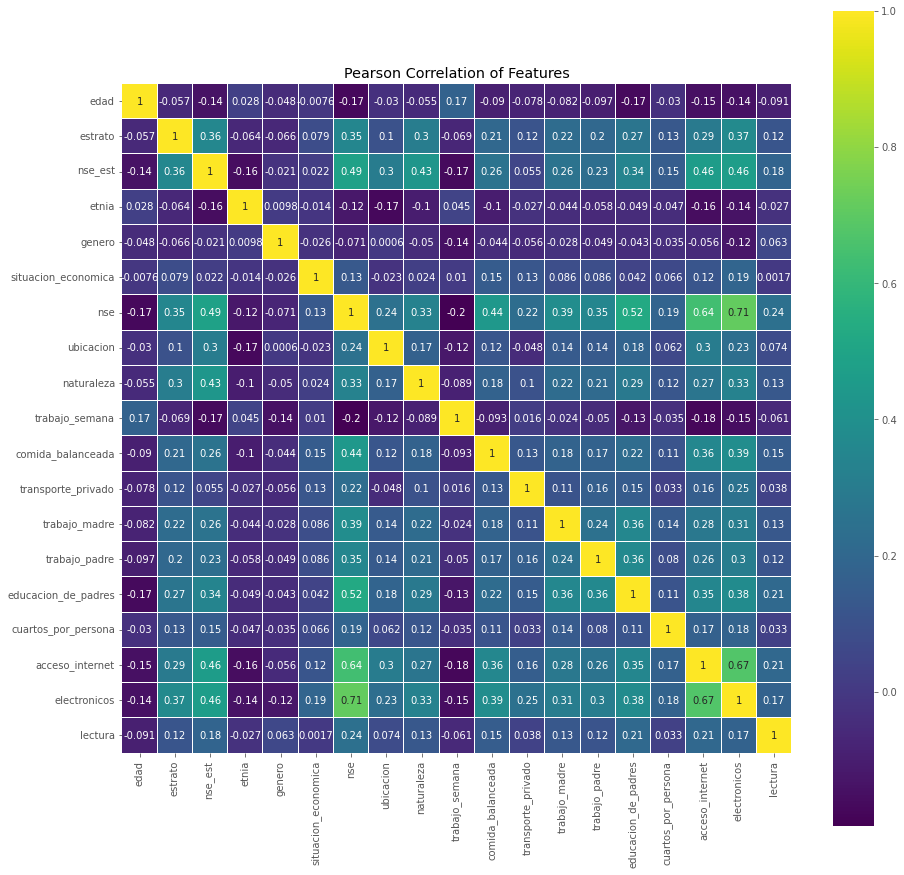

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of Features')
sb.heatmap(X.astype(float).corr(),
           vmax=1.0,
           cmap=colormap,
           annot=True,
           linewidths=0.1,
           linecolor='white',
           square=True)

Podemos ver que existen variables que se correlacionan inversamente

In [ ]:
X= df.drop(['ESTU_DEPTO_RESIDE'], axis=1)
y=df_objetivo['PUNT_GLOBAL']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
print(X.shape)

(441184, 19)


In [ ]:
best=SelectKBest(k=19)
X_new = best.fit_transform(X_train, y_train)
print(X_new.shape)
selected = best.get_support(indices=True)
print(X_train.columns[selected])

(308828, 19)
Index(['edad', 'estrato', 'nse_est', 'etnia', 'genero', 'situacion_economica',
       'nse', 'ubicacion', 'naturaleza', 'trabajo_semana', 'comida_balanceada',
       'transporte_privado', 'trabajo_madre', 'trabajo_padre',
       'educacion_de_padres', 'cuartos_por_persona', 'acceso_internet',
       'electronicos', 'lectura'],
      dtype='object')


In [ ]:
used_features =X_train.columns[selected]

In [ ]:
from sklearn.metrics import mean_absolute_error

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression( )
reg.fit(
    X_train[used_features].values,
    y_train
    )  
y_pred = reg.predict(X_test[used_features].values)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1724.6923535083715

In [ ]:
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
rmse

41.52941552090965

In [ ]:
mae= mean_absolute_error( y_test, y_pred)
mae

33.42782807569435

### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=1 )
reg.fit(
    X_train[used_features].values,
    y_train
    )  
y_pred = reg.predict(X_test[used_features].values)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1724.692489250133

In [ ]:
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
rmse

41.52941715519413

In [ ]:
mae= mean_absolute_error( y_test, y_pred)
mae

33.42783518293607

### Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
reg = Lasso(alpha=0.11 )
reg.fit(
    X_train[used_features].values,
    y_train
    )  
y_pred = reg.predict(X_test[used_features].values)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1725.680528545521

In [ ]:
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
rmse

41.54131110768557

In [ ]:
mae= mean_absolute_error(y_test, y_pred)
mae

33.45481631827114

### Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor( )
reg.fit(
    X_train[used_features].values,
    y_train
    )  
y_pred = reg.predict(X_test[used_features].values)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

3146.3015438685684

In [ ]:
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
rmse

56.09190265865982

In [ ]:
mae= mean_absolute_error( y_test, y_pred)
mae

44.535815933745546

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators = 20, random_state = 0)

reg.fit(
    X_train[used_features].values,
    y_train
    )  
y_pred = reg.predict(X_test[used_features].values)


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1998.705196066596

In [ ]:
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
rmse

44.706880858169875

In [ ]:
mae= mean_absolute_error( y_test, y_pred)
mae

35.743508556993085

### Neural network Regression

In [ ]:
from sklearn.neural_network import MLPRegressor
reg = MLPRegressor( )
reg.fit(
    X_train[used_features].values,
    y_train
    )  
y_pred = reg.predict(X_test[used_features].values)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1636.4253022796584

In [ ]:
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
rmse

40.45275395173558

In [ ]:
mae= mean_absolute_error( y_test, y_pred)
mae

32.53068914906157

La regresión lineal y la red neuronal tuvieron un MAE de 33 y 32 respectivamente, mientras el árbol de decisión tuvo un MAE muy alto. Los resultados vs la selección automática no son muy diferentes

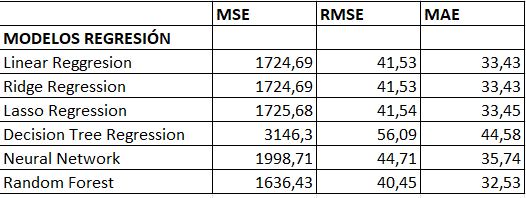

## Modelo clasificación

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
df_objetivo

,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL
0,32,2,1,32,7,1,35,8,1,27,3,1,32.0,6.0,A-,158,2.0
1,48,36,2,24,1,1,38,15,1,32,11,1,40.0,30.0,A-,179,8.0
2,47,34,2,56,71,3,52,65,2,39,29,1,40.0,29.0,A-,239,47.0
3,56,64,3,46,38,2,44,36,2,41,35,2,43.0,38.0,A-,232,42.0
4,58,68,3,54,65,3,55,76,2,51,64,2,49.0,55.0,A1,270,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441179,53,53,3,46,37,2,43,35,2,49,59,2,46.0,45.0,A-,238,47.0
441180,35,5,1,28,3,1,34,7,1,27,4,1,35.0,15.0,A-,157,2.0
441181,31,2,1,30,5,1,41,25,2,26,2,1,55.0,72.0,A1,169,5.0
441182,37,7,2,35,10,1,33,6,1,30,7,1,36.0,17.0,A-,170,5.0


In [ ]:
print(df_objetivo.PERCENTIL_GLOBAL.describe()); print("")
df_objetivo.PUNT_GLOBAL.describe()

count    441184.000000
mean         51.848621
std          28.704095
min           1.000000
25%          27.000000
50%          52.000000
75%          77.000000
max         100.000000
Name: PERCENTIL_GLOBAL, dtype: float64



count    441184.000000
mean        249.601307
std          50.308114
min         106.000000
25%         212.000000
50%         246.000000
75%         284.000000
max         494.000000
Name: PUNT_GLOBAL, dtype: float64

In [ ]:
rango_rendimiento= df_objetivo['PERCENTIL_GLOBAL']

df_objetivo.loc[rango_rendimiento <= 27, 'rango_rendimiento'] = 1
df_objetivo.loc[(rango_rendimiento > 27) & (rango_rendimiento <= 52), 'rango_rendimiento']=2
df_objetivo.loc[(rango_rendimiento > 52) & (rango_rendimiento <= 77), 'rango_rendimiento']=3
df_objetivo.loc[rango_rendimiento > 77, 'rango_rendimiento']=4



df_objetivo = pd.concat([df_objetivo['rango_rendimiento'],df_objetivo.drop('rango_rendimiento',axis=1)], axis=1)
df_objetivo

,rango_rendimiento,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL
0,1.0,32,2,1,32,7,1,35,8,1,27,3,1,32.0,6.0,A-,158,2.0
1,1.0,48,36,2,24,1,1,38,15,1,32,11,1,40.0,30.0,A-,179,8.0
2,2.0,47,34,2,56,71,3,52,65,2,39,29,1,40.0,29.0,A-,239,47.0
3,2.0,56,64,3,46,38,2,44,36,2,41,35,2,43.0,38.0,A-,232,42.0
4,3.0,58,68,3,54,65,3,55,76,2,51,64,2,49.0,55.0,A1,270,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441179,2.0,53,53,3,46,37,2,43,35,2,49,59,2,46.0,45.0,A-,238,47.0
441180,1.0,35,5,1,28,3,1,34,7,1,27,4,1,35.0,15.0,A-,157,2.0
441181,1.0,31,2,1,30,5,1,41,25,2,26,2,1,55.0,72.0,A1,169,5.0
441182,1.0,37,7,2,35,10,1,33,6,1,30,7,1,36.0,17.0,A-,170,5.0


In [ ]:
df_objetivo.rango_rendimiento.isnull().sum()

0

In [ ]:
bueno_malo= df_objetivo['PERCENTIL_GLOBAL']

df_objetivo.loc[bueno_malo <= 27, 'bueno_malo'] = 0
df_objetivo.loc[(bueno_malo > 27) & (bueno_malo <= 52), 'bueno_malo']=0
df_objetivo.loc[(bueno_malo > 52) & (bueno_malo <= 77), 'bueno_malo']=1
df_objetivo.loc[bueno_malo > 77, 'bueno_malo']=1



df_objetivo = pd.concat([df_objetivo['bueno_malo'],df_objetivo.drop('bueno_malo',axis=1)], axis=1)
df_objetivo

,bueno_malo,rango_rendimiento,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL
0,0.0,1.0,32,2,1,32,7,1,35,8,1,27,3,1,32.0,6.0,A-,158,2.0
1,0.0,1.0,48,36,2,24,1,1,38,15,1,32,11,1,40.0,30.0,A-,179,8.0
2,0.0,2.0,47,34,2,56,71,3,52,65,2,39,29,1,40.0,29.0,A-,239,47.0
3,0.0,2.0,56,64,3,46,38,2,44,36,2,41,35,2,43.0,38.0,A-,232,42.0
4,1.0,3.0,58,68,3,54,65,3,55,76,2,51,64,2,49.0,55.0,A1,270,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441179,0.0,2.0,53,53,3,46,37,2,43,35,2,49,59,2,46.0,45.0,A-,238,47.0
441180,0.0,1.0,35,5,1,28,3,1,34,7,1,27,4,1,35.0,15.0,A-,157,2.0
441181,0.0,1.0,31,2,1,30,5,1,41,25,2,26,2,1,55.0,72.0,A1,169,5.0
441182,0.0,1.0,37,7,2,35,10,1,33,6,1,30,7,1,36.0,17.0,A-,170,5.0


In [ ]:
df_objetivo.bueno_malo.isnull().sum()

0

In [ ]:
df_objetivo.bueno_malo.value_counts()

0.0    221628
1.0    219556
Name: bueno_malo, dtype: int64

### 4 rangos

In [ ]:
X=df.drop(['ESTU_DEPTO_RESIDE'], axis=1)
y=df_objetivo['rango_rendimiento']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
print(X.shape)

(441184, 19)


In [ ]:
clf = LogisticRegression(multi_class="ovr")

clf.fit(
    X_train,
    y_train
    )  
y_pred = clf.predict(X_test)

 
print('Exactitud en el Entrenamiento: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Exactitud en la Validación (test): {:.2f}'
     .format(clf.score(X_test, y_test)))

print("")
print(f'Reporte de clasificación:')
print(classification_report(y_test, y_pred))

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(" Confusion matrix: ")
print(cm)

print("")

print(" F1 SCORE: ")
print(f1_score(y_test, y_pred, average='macro'))

print("")
print(" Accuracy Score: ")
print(accuracy_score(y_test, y_pred))
print("")
pred_prob = clf.predict_proba(X_test)
print(" ROC_AUC_SCORE: ")
print(roc_auc_score(y_test, pred_prob , multi_class='ovr'))

## Para clasificacion binaria
# fper, tper, thresholds = roc_curve(y_test, pred_prob)
# def plot_roc_curve(fper, tper):
#     plt.plot(fper, tper, color='red', label='ROC')
#     plt.plot([0, 1], [0, 1], color='green', linestyle='--')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver Operating Characteristic Curve')
#     plt.legend()
#     plt.show()

# plot_roc_curve(fper, tper)

Exactitud en el Entrenamiento: 0.42
Exactitud en la Validación (test): 0.42

Reporte de clasificación:
              precision    recall  f1-score   support

         1.0       0.45      0.66      0.54     22186
         2.0       0.31      0.15      0.21     21946
         3.0       0.34      0.25      0.29     22619
         4.0       0.49      0.65      0.55     21486

    accuracy                           0.42     88237
   macro avg       0.40      0.43      0.40     88237
weighted avg       0.40      0.42      0.39     88237

 Confusion matrix: 
[[14596  2761  2679  2150]
 [ 9689  3344  4487  4426]
 [ 5834  2987  5658  8140]
 [ 2070  1546  3980 13890]]

 F1 SCORE: 
0.39593465348191625

 Accuracy Score: 
0.4248557861214683

 ROC_AUC_SCORE: 
0.6953086882243107


In [ ]:
clf = DecisionTreeClassifier()

clf.fit(
    X_train,
    y_train
    )  
y_pred = clf.predict(X_test)

 
print('Exactitud en el Entrenamiento: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Exactitud en la Validación (test): {:.2f}'
     .format(clf.score(X_test, y_test)))

print("")
print(f'Reporte de clasificación:')
print(classification_report(y_test, y_pred))

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(" Confusion matrix: ")
print(cm)

print("")

print(" F1 SCORE: ")
print(f1_score(y_test, y_pred, average='macro'))

print("")
print(" Accuracy Score: ")
print(accuracy_score(y_test, y_pred))
print("")
pred_prob = clf.predict_proba(X_test)
print(" ROC_AUC_SCORE: ")
print(roc_auc_score(y_test, pred_prob , multi_class='ovr'))

## Para clasificacion binaria
# fper, tper, thresholds = roc_curve(y_test, pred_prob)
# def plot_roc_curve(fper, tper):
#     plt.plot(fper, tper, color='red', label='ROC')
#     plt.plot([0, 1], [0, 1], color='green', linestyle='--')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver Operating Characteristic Curve')
#     plt.legend()
#     plt.show()

# plot_roc_curve(fper, tper)

Exactitud en el Entrenamiento: 0.88
Exactitud en la Validación (test): 0.34

Reporte de clasificación:
              precision    recall  f1-score   support

         1.0       0.38      0.42      0.40     22186
         2.0       0.27      0.28      0.28     21946
         3.0       0.29      0.27      0.28     22619
         4.0       0.44      0.41      0.42     21486

    accuracy                           0.34     88237
   macro avg       0.35      0.34      0.34     88237
weighted avg       0.34      0.34      0.34     88237

 Confusion matrix: 
[[9305 6282 4397 2202]
 [7069 6127 5237 3513]
 [5184 5752 6136 5547]
 [2889 4157 5646 8794]]

 F1 SCORE: 
0.3444946851399223

 Accuracy Score: 
0.34409601414372654

 ROC_AUC_SCORE: 
0.5660242427349822


In [ ]:
clf = RandomForestClassifier(n_estimators=20)

clf.fit(
    X_train,
    y_train
    )  
y_pred = clf.predict(X_test)

 
print('Exactitud en el Entrenamiento: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Exactitud en la Validación (test): {:.2f}'
     .format(clf.score(X_test, y_test)))

print("")
print(f'Reporte de clasificación:')
print(classification_report(y_test, y_pred))

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(" Confusion matrix: ")
print(cm)

print("")

print(" F1 SCORE: ")
print(f1_score(y_test, y_pred, average='macro'))

print("")
print(" Accuracy Score: ")
print(accuracy_score(y_test, y_pred))
print("")
pred_prob = clf.predict_proba(X_test)
print(" ROC_AUC_SCORE: ")
print(roc_auc_score(y_test, pred_prob , multi_class='ovr'))

## Para clasificacion binaria
# fper, tper, thresholds = roc_curve(y_test, pred_prob)
# def plot_roc_curve(fper, tper):
#     plt.plot(fper, tper, color='red', label='ROC')
#     plt.plot([0, 1], [0, 1], color='green', linestyle='--')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver Operating Characteristic Curve')
#     plt.legend()
#     plt.show()

# plot_roc_curve(fper, tper)

Exactitud en el Entrenamiento: 0.87
Exactitud en la Validación (test): 0.37

Reporte de clasificación:
              precision    recall  f1-score   support

         1.0       0.43      0.48      0.45     22186
         2.0       0.28      0.26      0.27     21946
         3.0       0.30      0.28      0.29     22619
         4.0       0.47      0.48      0.47     21486

    accuracy                           0.37     88237
   macro avg       0.37      0.37      0.37     88237
weighted avg       0.37      0.37      0.37     88237

 Confusion matrix: 
[[10584  5791  3899  1912]
 [ 7340  5731  5303  3572]
 [ 4728  5473  6251  6167]
 [ 2200  3440  5525 10321]]

 F1 SCORE: 
0.3705551774347684

 Accuracy Score: 
0.37271212756553374

 ROC_AUC_SCORE: 
0.6379234218720925


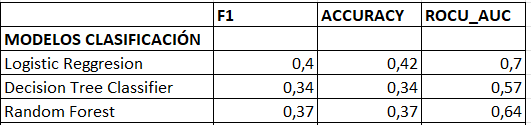

### 2 rangos


In [ ]:
X=df.drop(['ESTU_DEPTO_RESIDE'], axis=1)
y=df_objetivo['bueno_malo']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
print(X.shape)

(441184, 19)


Exactitud en el Entrenamiento: 0.70
Exactitud en la Validación (test): 0.70

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.70      0.71      0.71     44132
         1.0       0.71      0.70      0.70     44105

    accuracy                           0.70     88237
   macro avg       0.70      0.70      0.70     88237
weighted avg       0.70      0.70      0.70     88237

 Confusion matrix: 
[[31224 12908]
 [13213 30892]]

 F1 SCORE: 
0.7039635322689481

 Accuracy Score: 
0.703967723290683

 ROC_AUC_SCORE: 
0.703966637873273


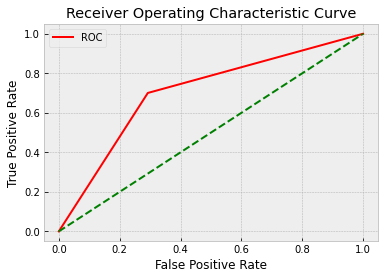

In [ ]:
clf = LogisticRegression(multi_class="ovr")

clf.fit(
    X_train,
    y_train
    )  
y_pred = clf.predict(X_test)

 
print('Exactitud en el Entrenamiento: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Exactitud en la Validación (test): {:.2f}'
     .format(clf.score(X_test, y_test)))

print("")
print(f'Reporte de clasificación:')
print(classification_report(y_test, y_pred))

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(" Confusion matrix: ")
print(cm)

print("")

print(" F1 SCORE: ")
print(f1_score(y_test, y_pred, average='macro'))

print("")
print(" Accuracy Score: ")
print(accuracy_score(y_test, y_pred))
print("")
pred_prob = clf.predict_proba(X_test)
print(" ROC_AUC_SCORE: ")
print(roc_auc_score(y_test, y_pred ))

## Para clasificacion binaria
fper, tper, thresholds = roc_curve(y_test, y_pred)
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fper, tper)

Exactitud en el Entrenamiento: 0.93
Exactitud en la Validación (test): 0.62

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.61      0.64      0.63     44132
         1.0       0.62      0.59      0.61     44105

    accuracy                           0.62     88237
   macro avg       0.62      0.62      0.62     88237
weighted avg       0.62      0.62      0.62     88237

 Confusion matrix: 
[[28212 15920]
 [17873 26232]]

 F1 SCORE: 
0.6168271303277919

 Accuracy Score: 
0.6170200709452951

 ROC_AUC_SCORE: 
0.6170132623432174


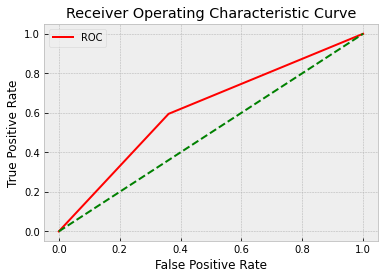

In [ ]:
clf = DecisionTreeClassifier()

clf.fit(
    X_train,
    y_train
    )  
y_pred = clf.predict(X_test)

 
print('Exactitud en el Entrenamiento: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Exactitud en la Validación (test): {:.2f}'
     .format(clf.score(X_test, y_test)))

print("")
print(f'Reporte de clasificación:')
print(classification_report(y_test, y_pred))

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(" Confusion matrix: ")
print(cm)

print("")

print(" F1 SCORE: ")
print(f1_score(y_test, y_pred, average='macro'))

print("")
print(" Accuracy Score: ")
print(accuracy_score(y_test, y_pred))
print("")
pred_prob = clf.predict_proba(X_test)
print(" ROC_AUC_SCORE: ")
print(roc_auc_score(y_test, y_pred ))

## Para clasificacion binaria
fper, tper, thresholds = roc_curve(y_test, y_pred)
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fper, tper)

Exactitud en el Entrenamiento: 0.93
Exactitud en la Validación (test): 0.67

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.66      0.69      0.67     44132
         1.0       0.67      0.64      0.66     44105

    accuracy                           0.67     88237
   macro avg       0.67      0.67      0.67     88237
weighted avg       0.67      0.67      0.67     88237

 Confusion matrix: 
[[30486 13646]
 [15880 28225]]

 F1 SCORE: 
0.6651586131133913

 Accuracy Score: 
0.6653784693495925

 ROC_AUC_SCORE: 
0.665370690805016


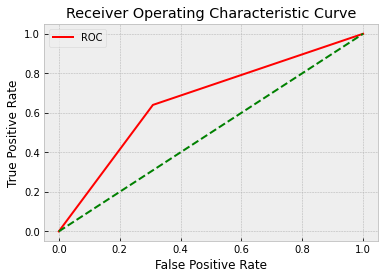

In [ ]:
clf = RandomForestClassifier(n_estimators=20)

clf.fit(
    X_train,
    y_train
    )  
y_pred = clf.predict(X_test)

 
print('Exactitud en el Entrenamiento: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Exactitud en la Validación (test): {:.2f}'
     .format(clf.score(X_test, y_test)))

print("")
print(f'Reporte de clasificación:')
print(classification_report(y_test, y_pred))

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(" Confusion matrix: ")
print(cm)

print("")

print(" F1 SCORE: ")
print(f1_score(y_test, y_pred, average='macro'))

print("")
print(" Accuracy Score: ")
print(accuracy_score(y_test, y_pred))
print("")
pred_prob = clf.predict_proba(X_test)
print(" ROC_AUC_SCORE: ")
print(roc_auc_score(y_test, y_pred ))

# Para clasificacion binaria
fper, tper, thresholds = roc_curve(y_test, y_pred)
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fper, tper)

#### XGB Classifier

In [ ]:
import xgboost as xgb
model_xgb = xgb.XGBClassifier(colsample_bytree=0.7, subsample=0.7, objective='binary:logistic', 
                              eval_metric='auc', min_child_weight=1, 
                              base_score = np.mean(y_train))
model_xgb = model_xgb.fit(X_train, np.ravel(y_train, order='C'))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
parameteres = {'max_depth': [2,4,5], 'n_estimators': [80,100], 'colsample_bytree': [0.7], 'subsample': [0.7], 
               'objective':['binary:logistic'], 'eval_metric':['auc'], 'min_child_weight':[1], 'n_jobs': [-1]}

grid = GridSearchCV(model_xgb, param_grid=parameteres, cv=10)
kf_hiper = KFold(n_splits=10)
model_xgb = grid.fit(X_train, np.ravel(y_train, order='C')).best_estimator_
y_pred_x = model_xgb.predict(X_test)

In [ ]:
model_xgb

XGBClassifier(base_score=0.49710296446775293, colsample_bytree=0.7,
              eval_metric='auc', max_depth=5, n_jobs=-1, subsample=0.7)

 Confusion matrix: 
[[32355 11777]
 [13896 30209]]

              precision    recall  f1-score   support

         0.0       0.70      0.73      0.72     44132
         1.0       0.72      0.68      0.70     44105

    accuracy                           0.71     88237
   macro avg       0.71      0.71      0.71     88237
weighted avg       0.71      0.71      0.71     88237

 F1 SCORE: 
0.7088727554228456

 Accuracy Score: 
0.7090449584641364

 ROC_AUC_SCORE: 
0.7090375828127741


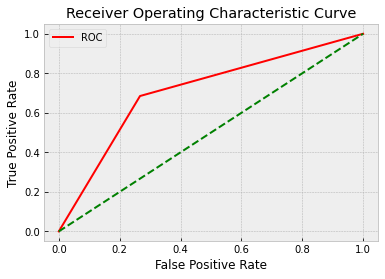

In [ ]:
cm = confusion_matrix(y_test, y_pred_x)
print(" Confusion matrix: ")
print(cm)

print("")
print(classification_report(y_test, y_pred_x))
print(" F1 SCORE: ")
print(f1_score(y_test, y_pred_x, average='macro'))

print("")
print(" Accuracy Score: ")
print(accuracy_score(y_test, y_pred_x))
print("")

print(" ROC_AUC_SCORE: ")
print(roc_auc_score(y_test, y_pred_x ))

# Para clasificacion binaria
fper, tper, thresholds = roc_curve(y_test, y_pred_x)
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fper, tper)

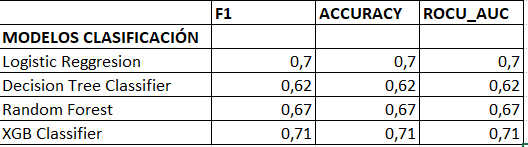

DE la misma manera que en la clasificación, la división binaria mostró mejores resultados. En este caso los resultados de la selección automática fueron ligeramente mejores. Para esta iteración de selección manual, el algoritmo que mejor rendimiento tuvo fue el XGB classifier, aunque la regresión logística tuvo un puntaje parecido gastando mucho menos tiempo. 